# Configurações iniciais

- Instalando e inicializando dependências
- Importando bibliotecas necessárias

In [4]:
# Instalando outras bibliotecas

!pip install scikit-learn==1.3.1
!pip install catboost
!pip install xgboost
!pip install graphviz

In [5]:
# Importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

# Classificadores
from sklearn.neighbors import KNeighborsClassifier                          # kNN
from sklearn.tree import DecisionTreeClassifier                             # Decision Tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier   # Random Forest
from sklearn.naive_bayes import GaussianNB                                  # Naive Bayes
from sklearn.linear_model import LogisticRegression                         # Logistic Regression
from sklearn.svm import SVC                                                 # SVM Classifier
from sklearn.neural_network import MLPClassifier                            # MLP Classifier
from xgboost import XGBClassifier                                           # XGBoost (Gradient Boosting)
from catboost import CatBoostClassifier                                     # Cat Boost (Gradient Boosting)
from sklearn.ensemble import AdaBoostClassifier                             # Ada Boost (Gradient Boosting)

# Modelo Assessor
from sklearn.svm import SVR

# Outros imports (pré-processamento, visualização, etc)
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.tree import export_graphviz # Conseguir visualizar as árvores
from sklearn.model_selection import GridSearchCV # Otimização de hiperparâmetros
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance

# Dataset

Features:

1. `Age`: age of the patient [*years*]
2. `Sex`: sex of the patient [*M: Male, F: Female*]
3. `ChestPainType`: chest pain type [*TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic*]
4. `RestingBP`: resting blood pressure [*mm Hg*]
5. `Cholesterol`: serum cholesterol [*mm/dl*]
6. `FastingBS`: fasting blood sugar [*1: if FastingBS > 120 mg/dl, 0: otherwise*]
7. `RestingECG`: resting electrocardiogram results [*Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria*]
8. `MaxHR`: maximum heart rate achieved [*Numeric value between 60 and 202*]
9. `ExerciseAngina`: exercise-induced angina [*Y: Yes, N: No*]
  - Angina é a dor no peito ocasionada por alguma situação que faz com que o coração trabalhe de forma mais intensa (como stress, atividade física, etc). No caso da feature no dataset utilizado neste notebook, considera-se a angina ocasionada por exercício físico.
10. `Oldpeak`: oldpeak = ST [*Numeric value measured in depression*]
11. `ST_Slope`: the slope of the peak exercise ST segment [*Up: upsloping, Flat: flat, Down: downsloping*]
  - É a direção do segmento ST durante exercício físico de pico (alta intensidade). O segmento ST é o trecho do eletrocardiograma que ocorre entre batimentos cardíacos irregulares, como demonstrado na figura a seguir.
  <img src="https://litfl.com/wp-content/uploads/2018/10/ST-segment-depression-upsloping-downsloping-horizontal.png" width="500">

`HeartDisease` (Y): output class [*1: heart disease, 0: Normal*]

In [6]:
# Configurando o Google Drive

from google.colab import drive
drive.mount('/content/gdrive') # Conectando este Notebook ao Google Drive

Mounted at /content/gdrive


In [7]:
# Indo até o diretório "Datasets" no Drive

%cd gdrive/MyDrive/Datasets

/content/gdrive/MyDrive/Datasets


In [8]:
# Lendo o arquivo .csv

df = pd.read_csv('heart.csv')
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

# Análise exploratória dos dados

In [9]:
# Quantidade de (linhas, colunas)
df.shape

(918, 12)

In [10]:
# Visualizando o tipo de dados de cada coluna
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [11]:
# Checando uma parte do balanceamento do dataset (tenho que fazer esse processo para todas as classes)
contagem_classes = df['HeartDisease'].value_counts()
print(contagem_classes)

HeartDisease
1    508
0    410
Name: count, dtype: int64


In [12]:
# Substituindo os valores "M" e "F" da classe "Sex" por 0 e 1, respectivamente
df["Sex"] = df["Sex"].map({"M": 0, "F": 1})

# Substituindo os valores "TA", "ATA", "NAP" e "AP" da classe "ChestPainType" por 0, 1, 2 e 3, respectivamente
df["ChestPainType"] = df["ChestPainType"].map({"TA": 0, "ATA": 1, "NAP": 2, "AP": 3})

# Substituindo os valores "Normal", "ST" e "LVH" da classe "RestingECG" por 0, 1 e 2, respectivamente
df["RestingECG"] = df["RestingECG"].map({"Normal": 0, "ST": 1, "LVH": 2})

# Substituindo os valores "N" e "Y" da classe "ExerciseAngina" por 0 e 1, respectivamente
df["ExerciseAngina"] = df["ExerciseAngina"].map({"N": 0, "Y": 1})

# Substituindo os valores "Up", "Flat" e "Down" da classe "ST_Slope" por 0, 1 e 2, respectivamente
df["ST_Slope"] = df["ST_Slope"].map({"Up": 0, "Flat": 1, "Down": 2})

df.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    0            1.0        140          289          0           0   
1   49    1            2.0        160          180          0           0   
2   37    0            1.0        130          283          0           1   
3   48    1            NaN        138          214          0           0   
4   54    0            2.0        150          195          0           0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         0             0  
1    156               0      1.0         1             1  
2     98               0      0.0         0             0  
3    108               1      1.5         1             1  
4    122               0      0.0         0             0

Aqui eu visualizo as correlações entre as variáveis (coeficiente de Pearson). Lembrete:

- 1 indica correlação positiva perfeita (quando uma aumenta, a outra aumenta);
- Valores próximos a 0 indicam pouca correlação;
- -1 indica correlação negativa perfeita (quando uma aumenta, a outra diminui);

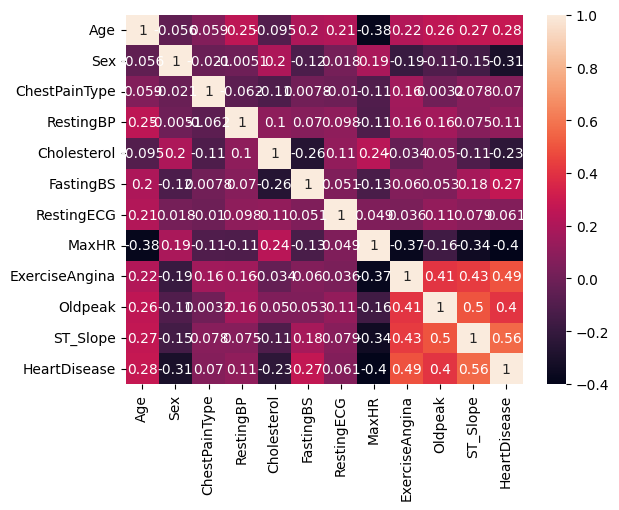

In [13]:
# Analisando as correlações entre as variáveis
sns.heatmap(df.corr(), annot = True)
plt.show()

In [14]:
# # Analisando correlações negativas mais notáveis

# plt.figure(figsize=(18, 12))

# # HeartDisease x MaxHR (-0.4)
# plt.subplot(2, 3, 1)
# sns.boxplot([df['HeartDisease'], df['MaxHR']])
# plt.xlabel("Tem doença cardíaca? [0, 1]", fontsize=10)
# plt.ylabel("Taxa Máxima Bat. Cardíacos [60-220]", fontsize=10)
# plt.gca().set(title='HeartDisease x MaxHR (Correlação -0.4)')

# # MaxHR x Age (-0.38)
# plt.subplot(2, 3, 2)
# plt.scatter(df['MaxHR'], df['Age'])
# plt.xlabel("Taxa Máxima Bat. Cardíacos [60-220]", fontsize=10)
# plt.ylabel("Idade [anos]", fontsize=10)
# plt.gca().set(title='MaxHR X Age (Correlação -0.38)')

# # ExerciseAngina x MaxHR (-0.37)
# plt.subplot(2, 3, 3)
# sns.boxplot([df['ExerciseAngina'], df['MaxHR']])
# plt.xlabel("Há Angina Quando faz Atv. Física? [0, 1]", fontsize=10)
# plt.ylabel("Taxa Máxima Bat. Cardíacos [60-220]", fontsize=10)
# plt.gca().set(title='ExerciseAngina x MaxHR (Correlação -0.37)')

# # ST_Slope x MaxHR (-0.34)
# plt.subplot(2, 3, 4)
# sns.boxplot([df['ST_Slope'], df['MaxHR']])
# plt.xlabel("Inclinação do Segmento ST [0 (Up), 1 (Flat), 2 (Down)]", fontsize=10)
# plt.ylabel("Taxa Máxima Bat. Cardíacos [60-220]", fontsize=10)
# plt.gca().set(title='ST_Slope x MaxHR (Correlação -0.34)')

# # Sex x HeartDisease
# plt.subplot(2, 3, 5)
# plt.bar(df['Sex'], df['HeartDisease'])
# plt.xlabel("Gênero [0 (M), 1 (F)]", fontsize=10)
# plt.ylabel("Tem doença cardíaca? [0, 1]", fontsize=10)
# plt.gca().set(title='Sex X HeartDisease (Correlação -0.31)')

# plt.tight_layout()
# plt.subplots_adjust(wspace=0.3)
# plt.show()

In [15]:
# # Analisando correlações positivas mais notáveis:

# plt.figure(figsize=(18, 12))

# # ST_Slope x HeartDisease (0.56)
# plt.subplot(2, 3, 1)
# plt.bar(df['ST_Slope'], df['HeartDisease'])
# plt.xlabel("Inclinação do Segmento ST [0 (Up), 1 (Flat), 2 (Down)]", fontsize=10)
# plt.ylabel("Tem doença cardíaca? [0, 1]", fontsize=10)
# plt.gca().set(title='Sex X HeartDisease (Correlação -0.31)')

# # ST_Slope x Oldpeak (0.5)
# plt.subplot(2, 3, 2)
# sns.boxplot([df['ST_Slope'], df['Oldpeak']])
# plt.xlabel("Inclinação do Segmento ST [0 (Up), 1 (Flat), 2 (Down)]", fontsize=10)
# plt.ylabel("Taxa Máxima Bat. Cardíacos [60-220]", fontsize=10)
# plt.gca().set(title='HeartDisease x MaxHR (Correlação -0.4)')


# plt.tight_layout()
# plt.subplots_adjust(wspace=0.3)
# plt.show()

# Modelagem

In [16]:
# Verificando dados nulos/faltantes
df.isnull().sum()

Age                 0
Sex                 0
ChestPainType     496
RestingBP           0
Cholesterol         0
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [17]:
df = df.drop(columns = ["ChestPainType"])
df.head()

Age  Sex  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  \
0   40    0        140          289          0           0    172   
1   49    1        160          180          0           0    156   
2   37    0        130          283          0           1     98   
3   48    1        138          214          0           0    108   
4   54    0        150          195          0           0    122   

   ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0               0      0.0         0             0  
1               0      1.0         1             1  
2               0      0.0         0             0  
3               1      1.5         1             1  
4               0      0.0         0             0

# Divisão dos dados

In [18]:
X = df.drop(columns = ["HeartDisease"])
y = df["HeartDisease"]

In [19]:
# Para treinar os assessores, vou utilizar uma cópia do dataset completo, excluindo a feature HeartDisease
full_X = X.copy()

# Pool de modelos

1. kNN
2. Decision Tree
3. Random Forest
4. Naive Bayes
5. Logistic Regression
6. SVM Classifier
7. MLP Classifier
8. XG Boost (Gradient Boosting)
9. Cat Boost (Gradient Boosting)
10. SVM Classifier with Linear Kernel


In [20]:
def filtra_label(prob_modelo):
  global y

  erro_modelo = []
  contador = 0

  for i in y:
    if y[contador] == 0:
      erro_modelo.append(abs(0 - prob_modelo[contador][1]))
    else:
      erro_modelo.append(abs(1 - prob_modelo[contador][1]))
    contador += 1

  erro_modelo = np.array(erro_modelo)
  return erro_modelo

### Explicação - Cálculo do erro

A probabilidade de erro do modelo sempre vai ser o quanto de certeza ele tem da classe oposta à "resposta certa" (label) da instância. Exemplos:

- **A label é "1"** e o modelo classificou a instância **CORRETAMENTE** como "1" com 0.8 de certeza `([0.2, 0.8])`. Isso significa que a probabilidade de erro é 0.2, isto é, o quanto ele tem certeza da classificação incorreta.
  
  Logo, `abs(1 - 0.8) = 0.2`


- **A label é "0"** e o modelo classificou a instância **INCORRETAMENTE** como "1" com 0.7 de certeza `([0.3, 0.7])`. Isso significa que a probabilidade de erro é 0.7, isto é, o quanto ele tem certeza da classificação incorreta.
  
  Logo, `abs(0 - 0.7) = 0.7`


- **A label é "1"** e o modelo classificou a instância **INCORRETAMENTE** como "0" com 0.9 de certeza `([0.9, 0.1])`. Isso significa que a probabilidade de erro é 0.9, isto é, o quanto ele tem certeza da classificação incorreta.
  
  Logo, `abs(1 - 0.1) = 0.9`


- **A label é "0"** e o modelo classificou a instância **CORRETAMENTE** como "0" com 0.8 de certeza `([0.8, 0.2])`. Isso significa que a probabilidade de erro é 0.2, isto é, o quanto ele tem certeza da classificação incorreta.
  
  Logo, `abs(0 - 0.2) = 0.2`

Ou seja, basta pegar as labels binarizadas (0 e 1) e subtrair a probabilidade da segunda coluna do array gerado pelo predict_proba.

## kNN

In [21]:
# Instanciando e treinando o classificador
knn = KNeighborsClassifier()

# Encontrando as probabilidades de certeza sobre as predições do modelo e printando os 5 primeiros exemplos
prob_knn = cross_val_predict(knn, X, y, cv = 10, method = 'predict_proba')
pred_knn = cross_val_predict(knn, X, y, cv = 10)
print(f'Probabilidades (prob_knn):\n{prob_knn[:5]}\n')

prob_knn[prob_knn == 0] = 0.001
prob_knn[prob_knn == 1] = 0.999

# Erro absoluto
erro_knn = filtra_label(prob_knn)
print(f'Erro absoluto (erro_knn):\n{erro_knn[:5]}\n Erro médio: {np.mean(erro_knn)}\n')

# Entropia
entr_knn = -prob_knn * np.log2(prob_knn) - (1 - prob_knn) * np.log2(1 - prob_knn)
print(f'Entropia (entr_knn):\n{entr_knn[:5]}')

Probabilidades (prob_knn):
[[0.6 0.4]
 [1.  0. ]
 [0.  1. ]
 [0.2 0.8]
 [0.6 0.4]]

Erro absoluto (erro_knn):
[0.4   0.999 0.999 0.2   0.4  ]
 Erro médio: 0.3709466230936819

Entropia (entr_knn):
[[0.97095059 0.97095059]
 [0.01140776 0.01140776]
 [0.01140776 0.01140776]
 [0.72192809 0.72192809]
 [0.97095059 0.97095059]]


### Assessores: kNN

In [22]:
# Formatando o erro e a entropia
erro_knn = np.array(erro_knn)

entr_knn = np.array(np.delete(entr_knn, 1, axis=1))
entr_knn = entr_knn.flatten()

print(f'Erro: {erro_knn[:5]}...\n')
print(f'Entropia: {entr_knn[:5]}...\n')

# Dataset com coluna para a entropia média do pool
X_entr_knn = X.copy()
X_entr_knn['Entropia'] = entr_knn

# Atributo preditor: Coluna para o erro médio do pool
y_erro_knn = erro_knn

Erro: [0.4   0.999 0.999 0.2   0.4  ]...

Entropia: [0.97095059 0.01140776 0.01140776 0.72192809 0.97095059]...



In [23]:
# X utilizado para o treinamento do Assessor 2 (dados + entropia)
X_entr_knn.head()

Age  Sex  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  \
0   40    0        140          289          0           0    172   
1   49    1        160          180          0           0    156   
2   37    0        130          283          0           1     98   
3   48    1        138          214          0           0    108   
4   54    0        150          195          0           0    122   

   ExerciseAngina  Oldpeak  ST_Slope  Entropia  
0               0      0.0         0  0.970951  
1               0      1.0         1  0.011408  
2               0      0.0         0  0.011408  
3               1      1.5         1  0.721928  
4               0      0.0         0  0.970951

In [24]:
# Criando um dataset somente com entropia para o terceiro assessor
X_apenas_entr_knn = X_entr_knn.copy()
X_apenas_entr_knn = X_apenas_entr_knn.drop(columns = ["Age", "Sex", "RestingBP", "Cholesterol", "FastingBS", "RestingECG", "MaxHR", "ExerciseAngina", "Oldpeak", "ST_Slope"])

# X utilizado para o treinamento do Assessor 3 (entropia)
X_apenas_entr_knn.head()

Entropia
0  0.970951
1  0.011408
2  0.011408
3  0.721928
4  0.970951

#### Assessor 1

In [25]:
# Assessor 1: Treinado com dados | Atributo preditor: Erro do modelo

ass1_knn = make_pipeline(StandardScaler(), SVR())
pred_ass1_knn = cross_val_predict(ass1_knn, full_X, y_erro_knn, cv = 10)

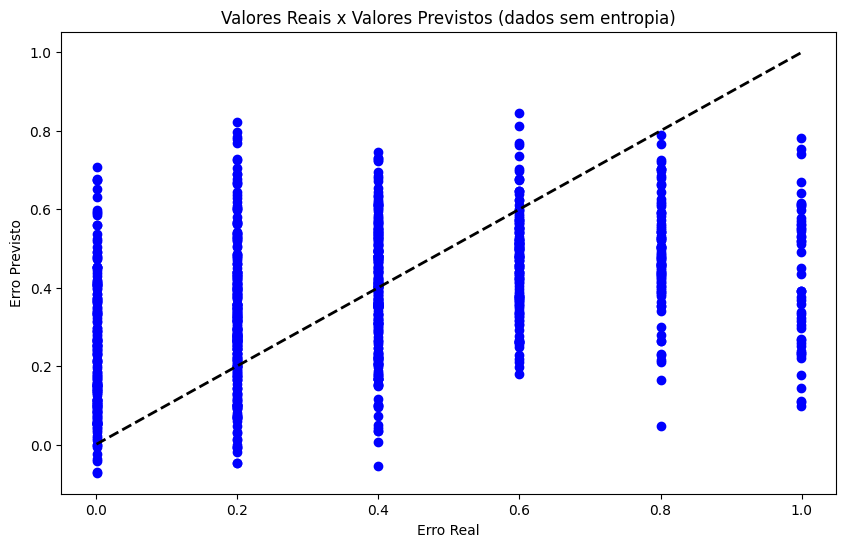

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(y_erro_knn, pred_ass1_knn, color='blue')
plt.plot([y_erro_knn.min(), y_erro_knn.max()], [y_erro_knn.min(), y_erro_knn.max()], 'k--', lw=2)
plt.xlabel('Erro Real')
plt.ylabel('Erro Previsto')
plt.title('Valores Reais x Valores Previstos (dados sem entropia)')
plt.show()

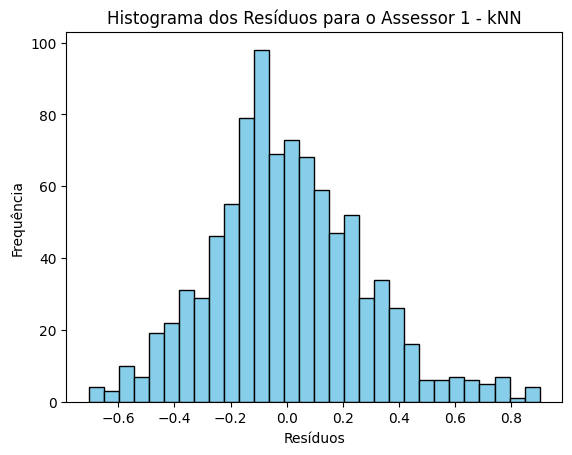

In [27]:
residuals = y_erro_knn - pred_ass1_knn
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos para o Assessor 1 - kNN')
plt.show()

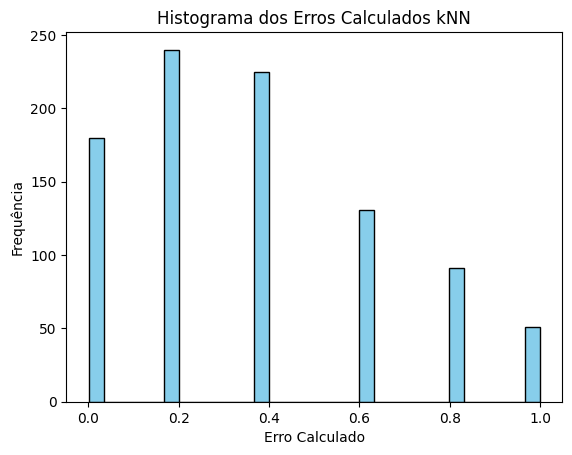

In [28]:
# Histograma dos erros reais do kNN
plt.hist(y_erro_knn, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro Calculado')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Calculados kNN')
plt.show()

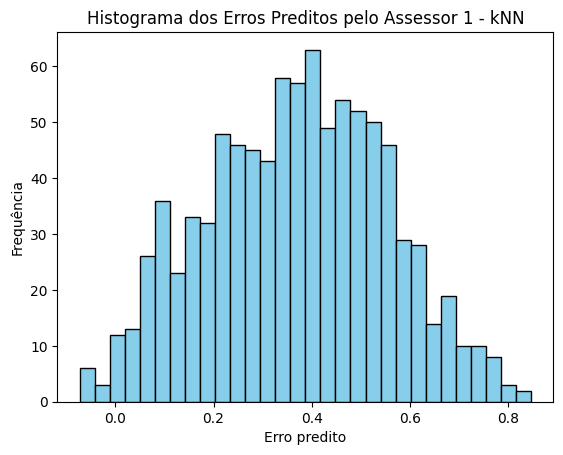

In [29]:
# Histograma dos erros preditos pelo Assessor 1 do kNN
plt.hist(pred_ass1_knn, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro predito')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Preditos pelo Assessor 1 - kNN')
plt.show()

In [30]:
# Ajustando os dados (necessário para o StandardScaler, que não funciona sem o fit mesmo que o cross_val_predict já tenha sido utilizado)
ass1_knn.fit(full_X, y_erro_knn)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

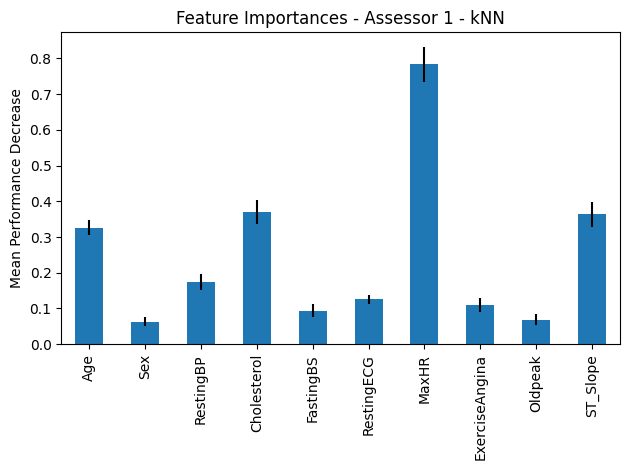

In [31]:
# Feature importances
result = permutation_importance(ass1_knn, full_X, pred_ass1_knn, n_repeats=30, random_state=0)
forest_importances = pd.Series(result.importances_mean, index=full_X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature Importances - Assessor 1 - kNN")
ax.set_ylabel("Mean Performance Decrease")

fig.tight_layout()
plt.show()

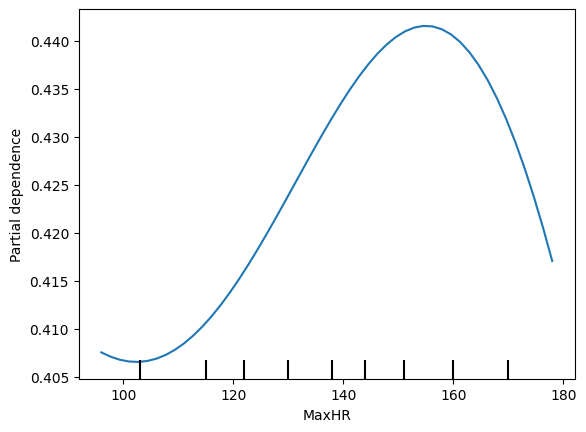

In [32]:
# PDP para o MaxHR
disp = PartialDependenceDisplay.from_estimator(ass1_knn, full_X, [(6)], grid_resolution=50)

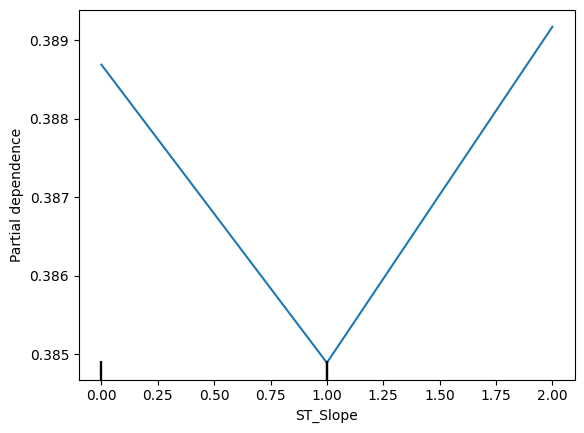

In [33]:
# PDP para o ST_Slope
disp = PartialDependenceDisplay.from_estimator(ass1_knn, full_X, [(9)], grid_resolution=50)

#### Assessor 2

In [34]:
# Assessor 2: Treinado com dados + entropia | Atributo preditor: Erro do modelo

ass2_knn = make_pipeline(StandardScaler(), SVR())
pred_ass2_knn = cross_val_predict(ass2_knn, X_entr_knn, y_erro_knn, cv = 10)

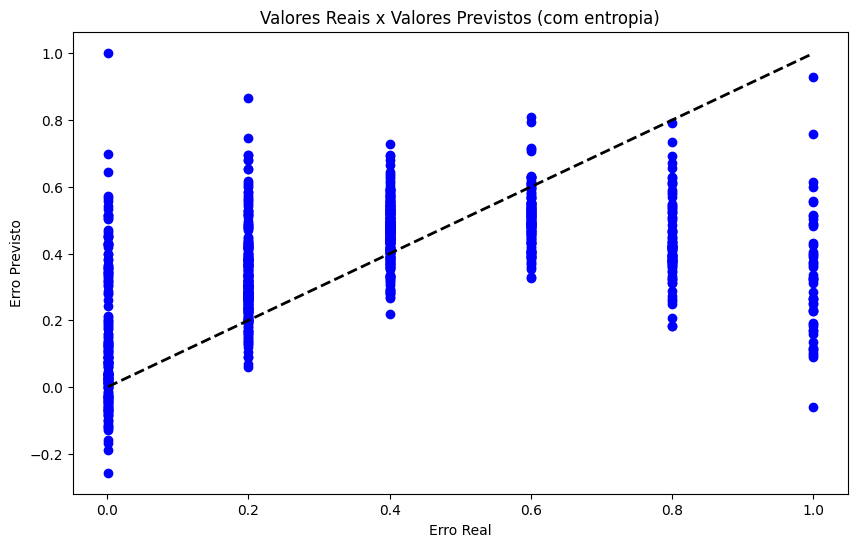

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(y_erro_knn, pred_ass2_knn, color='blue')
plt.plot([y_erro_knn.min(), y_erro_knn.max()], [y_erro_knn.min(), y_erro_knn.max()], 'k--', lw=2)
plt.xlabel('Erro Real')
plt.ylabel('Erro Previsto')
plt.title('Valores Reais x Valores Previstos (com entropia)')
plt.show()

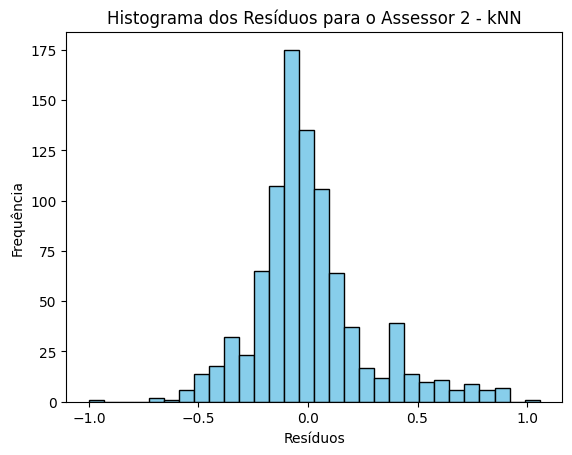

In [36]:
residuals = y_erro_knn - pred_ass2_knn
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos para o Assessor 2 - kNN')
plt.show()

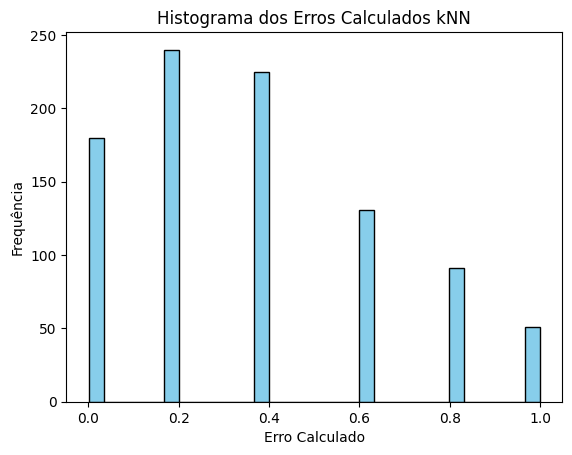

In [37]:
# Histograma dos erros reais do kNN
plt.hist(y_erro_knn, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro Calculado')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Calculados kNN')
plt.show()

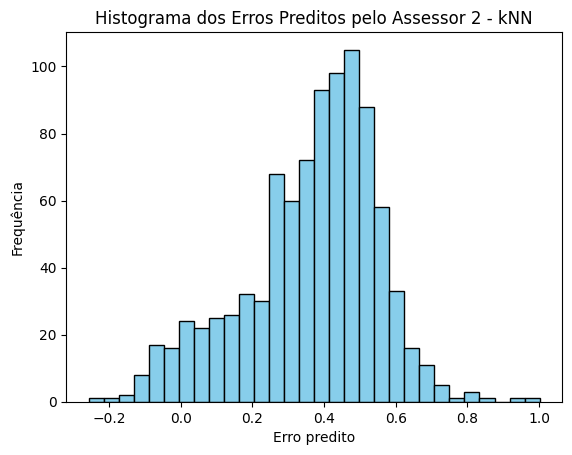

In [38]:
# Histograma dos erros preditos pelo Assessor 2 do kNN
plt.hist(pred_ass2_knn, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro predito')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Preditos pelo Assessor 2 - kNN')
plt.show()

In [39]:
# Ajustando os dados (necessário para o StandardScaler, que não funciona sem o fit mesmo que o cross_val_predict já tenha sido utilizado)
ass2_knn.fit(X_entr_knn, y_erro_knn)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

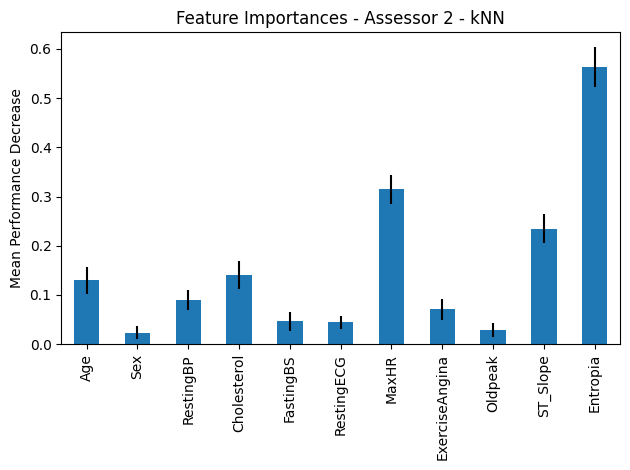

In [40]:
# Feature importances
result = permutation_importance(ass2_knn, X_entr_knn, pred_ass2_knn, n_repeats=30, random_state=0)
forest_importances = pd.Series(result.importances_mean, index=X_entr_knn.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature Importances - Assessor 2 - kNN")
ax.set_ylabel("Mean Performance Decrease")

fig.tight_layout()
plt.show()

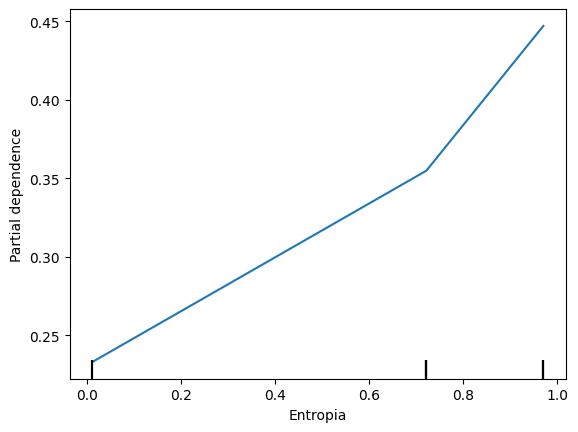

In [41]:
# PDP para a Entropia
disp = PartialDependenceDisplay.from_estimator(ass2_knn, X_entr_knn, [(10)], grid_resolution=50)

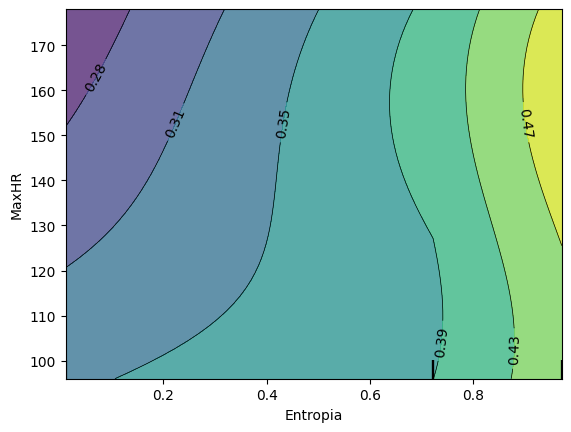

In [42]:
# PDP bi-dimensional para verificar as dependências entre as features Entropia e Max_HR
disp = PartialDependenceDisplay.from_estimator(ass2_knn, X_entr_knn, [(10, 6)], grid_resolution=50)

#### Assessor 3

In [43]:
# Assessor 3: Treinado apenas com a entropia | Atributo preditor: Erro do modelo

ass3_knn = make_pipeline(StandardScaler(), SVR())
pred_ass3_knn = cross_val_predict(ass3_knn, X_apenas_entr_knn, y_erro_knn, cv = 10)

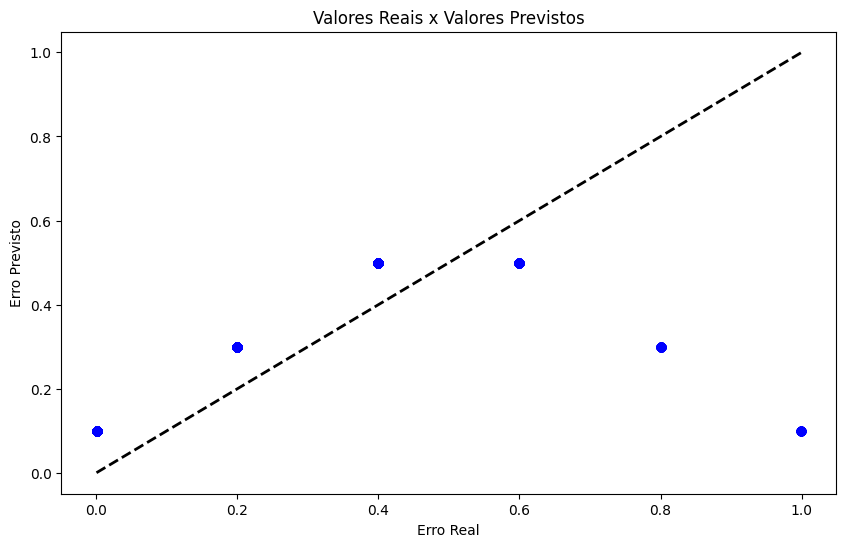

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(y_erro_knn, pred_ass3_knn, color='blue')
plt.plot([y_erro_knn.min(), y_erro_knn.max()], [y_erro_knn.min(), y_erro_knn.max()], 'k--', lw=2)
plt.xlabel('Erro Real')
plt.ylabel('Erro Previsto')
plt.title('Valores Reais x Valores Previstos')
plt.show()

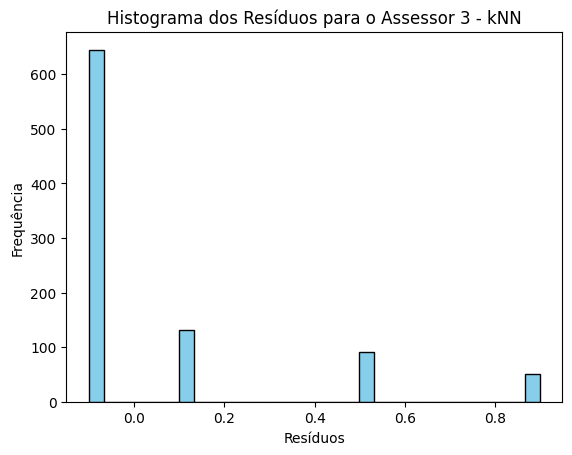

In [45]:
residuals = y_erro_knn - pred_ass3_knn
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos para o Assessor 3 - kNN')
plt.show()

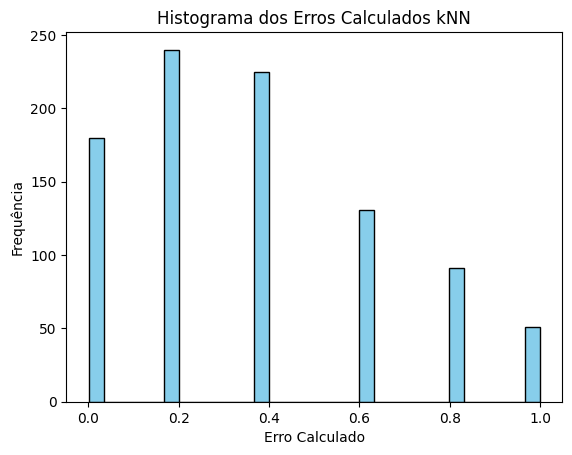

In [46]:
# Histograma dos erros reais do kNN
plt.hist(y_erro_knn, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro Calculado')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Calculados kNN')
plt.show()

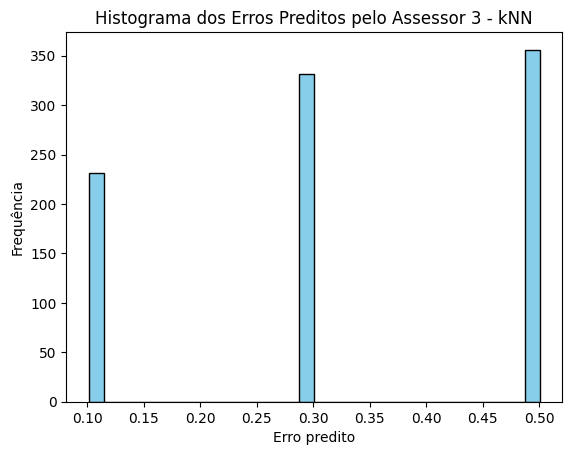

In [47]:
# Histograma dos erros preditos pelo Assessor 3 do kNN
plt.hist(pred_ass3_knn, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro predito')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Preditos pelo Assessor 3 - kNN')
plt.show()

In [48]:
# Ajustando os dados (necessário para o StandardScaler, que não funciona sem o fit mesmo que o cross_val_predict já tenha sido utilizado)
ass3_knn.fit(X_apenas_entr_knn, y_erro_knn)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

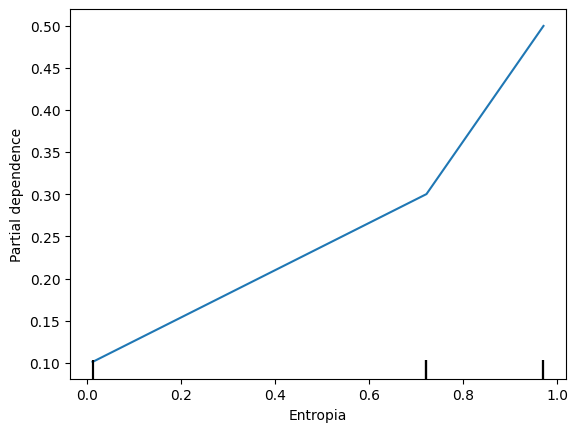

In [49]:
# PDP para a Entropia
disp = PartialDependenceDisplay.from_estimator(ass3_knn, X_apenas_entr_knn, [(0)], grid_resolution=50)

### Performances dos modelos

In [50]:
# kNN
report_knn = classification_report(y, pred_knn)
print(report_knn)

              precision    recall  f1-score   support

           0       0.67      0.65      0.66       410
           1       0.73      0.74      0.73       508

    accuracy                           0.70       918
   macro avg       0.70      0.70      0.70       918
weighted avg       0.70      0.70      0.70       918



In [51]:
# Assessores
mae_ass1_knn = mean_absolute_error(y_erro_knn, pred_ass1_knn)
print(f'Assessor 1 (dados sem entropia): {mae_ass1_knn}')

mae_ass2_knn = mean_absolute_error(y_erro_knn, pred_ass2_knn)
print(f'Assessor 2 (dados com entropia): {mae_ass2_knn}')

mae_ass3_knn = mean_absolute_error(y_erro_knn, pred_ass3_knn)
print(f'Assessor 3 (somente entropia): {mae_ass3_knn}')

Assessor 1 (dados sem entropia): 0.21260857326022548
Assessor 2 (dados com entropia): 0.18527029052459926
Assessor 3 (somente entropia): 0.18397351636635817


## Decision Tree

In [52]:
# Instanciando e treinando o classificador
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_leaf = 30)

# Encontrando as probabilidades de certeza sobre as predições do modelo e printando os 5 primeiros exemplos
prob_dt = cross_val_predict(dt, X, y, cv = 10, method = 'predict_proba')
pred_dt = cross_val_predict(dt, X, y, cv = 10)
print(f'Probabilidades (prob_dt):\n{prob_dt[:5]}\n')

prob_dt[prob_dt == 0] = 0.001
prob_dt[prob_dt == 1] = 0.999

# Erro absoluto
erro_dt = filtra_label(prob_dt)
print(f'Erro absoluto (erro_dt):\n{erro_dt[:5]}\n Erro médio: {np.mean(erro_dt)}\n')

# Entropia
entr_dt = -prob_dt * np.log2(prob_dt) - (1 - prob_dt) * np.log2(1 - prob_dt)
print(f'Entropia (entr_dt):\n{entr_dt[:5]}')

Probabilidades (prob_dt):
[[0.90808824 0.09191176]
 [0.66666667 0.33333333]
 [0.90808824 0.09191176]
 [0.40909091 0.59090909]
 [0.90808824 0.09191176]]

Erro absoluto (erro_dt):
[0.09191176 0.66666667 0.09191176 0.40909091 0.09191176]
 Erro médio: 0.2608586785149355

Entropia (entr_dt):
[[0.44281905 0.44281905]
 [0.91829583 0.91829583]
 [0.44281905 0.44281905]
 [0.97602065 0.97602065]
 [0.44281905 0.44281905]]


### Assessores: Decision Tree

In [53]:
# Formatando o erro e a entropia
erro_dt = np.array(erro_dt)

entr_dt = np.array(np.delete(entr_dt, 1, axis=1))
entr_dt = entr_dt.flatten()

print(f'Erro: {erro_dt[:5]}...\n')
print(f'Entropia: {entr_dt[:5]}...\n')

# Dataset com coluna para a entropia média do pool
X_entr_dt = X.copy()
X_entr_dt['Entropia'] = entr_dt

# Atributo preditor: Coluna para o erro médio do pool
y_erro_dt = erro_dt

Erro: [0.09191176 0.66666667 0.09191176 0.40909091 0.09191176]...

Entropia: [0.44281905 0.91829583 0.44281905 0.97602065 0.44281905]...



In [54]:
# X utilizado para o treinamento do Assessor 2 (dados + entropia)
X_entr_dt.head()

Age  Sex  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  \
0   40    0        140          289          0           0    172   
1   49    1        160          180          0           0    156   
2   37    0        130          283          0           1     98   
3   48    1        138          214          0           0    108   
4   54    0        150          195          0           0    122   

   ExerciseAngina  Oldpeak  ST_Slope  Entropia  
0               0      0.0         0  0.442819  
1               0      1.0         1  0.918296  
2               0      0.0         0  0.442819  
3               1      1.5         1  0.976021  
4               0      0.0         0  0.442819

In [55]:
# Criando um dataset somente com entropia para o terceiro assessor
X_apenas_entr_dt = X_entr_dt.copy()
X_apenas_entr_dt = X_apenas_entr_dt.drop(columns = ["Age", "Sex", "RestingBP", "Cholesterol", "FastingBS", "RestingECG", "MaxHR", "ExerciseAngina", "Oldpeak", "ST_Slope"])

# X utilizado para o treinamento do Assessor 3 (entropia)
X_apenas_entr_dt.head()

Entropia
0  0.442819
1  0.918296
2  0.442819
3  0.976021
4  0.442819

#### Assessor 1

In [56]:
# Assessor 1: Treinado com dados | Atributo preditor: Erro do modelo

ass1_dt = make_pipeline(StandardScaler(), SVR())
pred_ass1_dt = cross_val_predict(ass1_dt, full_X, y_erro_dt, cv = 10)

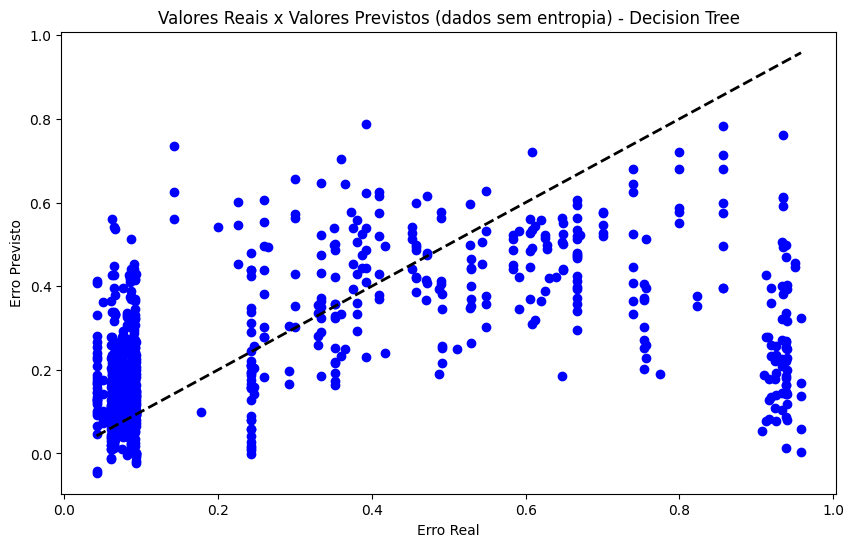

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(y_erro_dt, pred_ass1_dt, color='blue')
plt.plot([y_erro_dt.min(), y_erro_dt.max()], [y_erro_dt.min(), y_erro_dt.max()], 'k--', lw=2)
plt.xlabel('Erro Real')
plt.ylabel('Erro Previsto')
plt.title('Valores Reais x Valores Previstos (dados sem entropia) - Decision Tree')
plt.show()

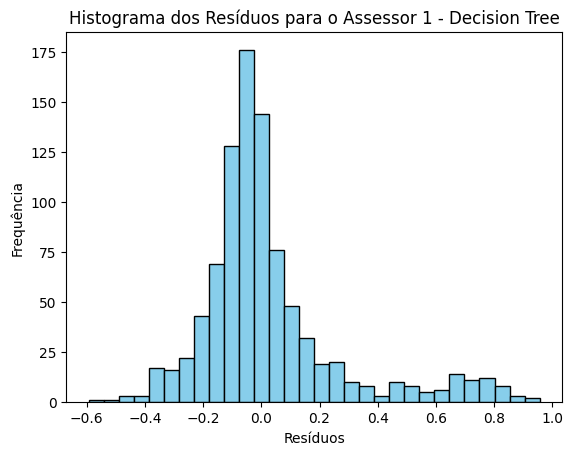

In [58]:
residuals = y_erro_dt - pred_ass1_dt
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos para o Assessor 1 - Decision Tree')
plt.show()

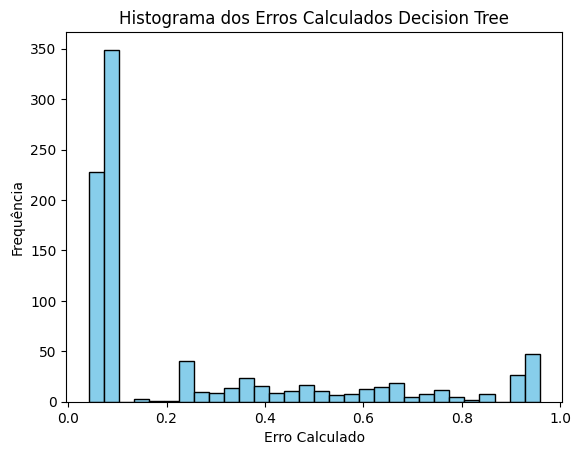

In [59]:
# Histograma dos erros reais da Decision Tree
plt.hist(y_erro_dt, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro Calculado')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Calculados Decision Tree')
plt.show()

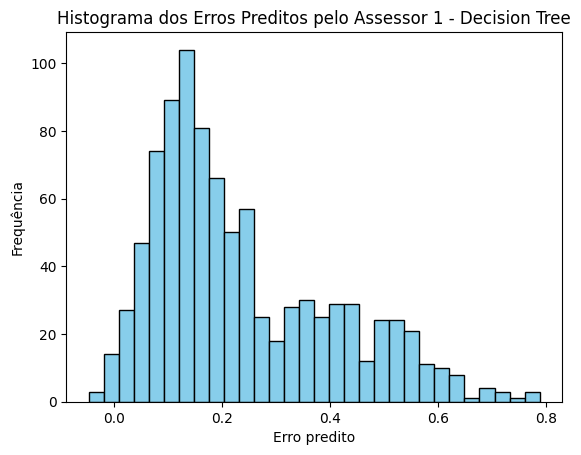

In [60]:
# Histograma dos erros preditos pelo Assessor 1 da Decision Tree
plt.hist(pred_ass1_dt, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro predito')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Preditos pelo Assessor 1 - Decision Tree')
plt.show()

In [61]:
# Ajustando os dados (necessário para o StandardScaler, que não funciona sem o fit mesmo que o cross_val_predict já tenha sido utilizado)
ass1_dt.fit(full_X, y_erro_dt)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

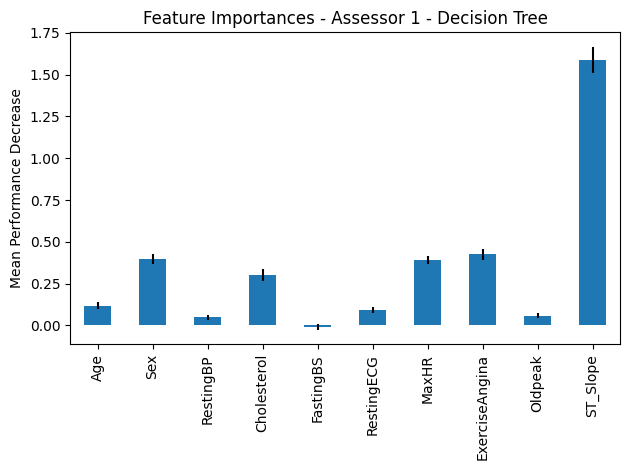

In [62]:
# Feature importances
result = permutation_importance(ass1_dt, full_X, pred_ass1_dt, n_repeats=30, random_state=0)
forest_importances = pd.Series(result.importances_mean, index=full_X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature Importances - Assessor 1 - Decision Tree")
ax.set_ylabel("Mean Performance Decrease")

fig.tight_layout()
plt.show()

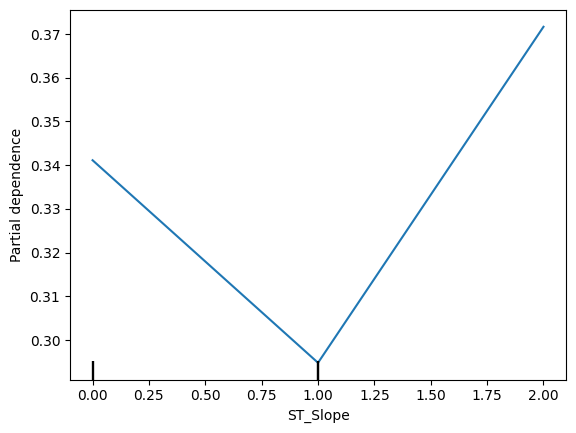

In [63]:
# PDP para o ST_Slope
disp = PartialDependenceDisplay.from_estimator(ass1_dt, full_X, [(9)], grid_resolution=50)

#### Assessor 2

In [64]:
# Assessor 2: Treinado com dados + entropia | Atributo preditor: Erro do modelo

ass2_dt = make_pipeline(StandardScaler(), SVR())
pred_ass2_dt = cross_val_predict(ass2_dt, X_entr_dt, y_erro_dt, cv = 10)

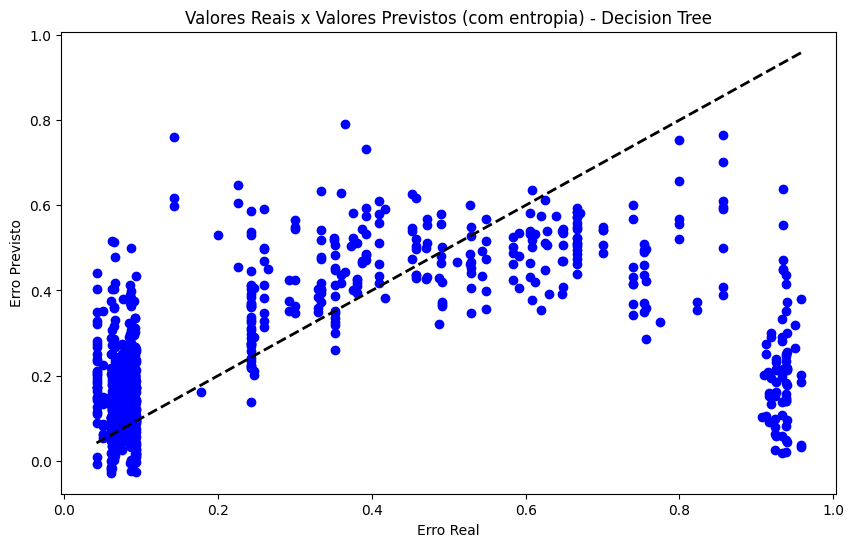

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(y_erro_dt, pred_ass2_dt, color='blue')
plt.plot([y_erro_dt.min(), y_erro_dt.max()], [y_erro_dt.min(), y_erro_dt.max()], 'k--', lw=2)
plt.xlabel('Erro Real')
plt.ylabel('Erro Previsto')
plt.title('Valores Reais x Valores Previstos (com entropia) - Decision Tree')
plt.show()

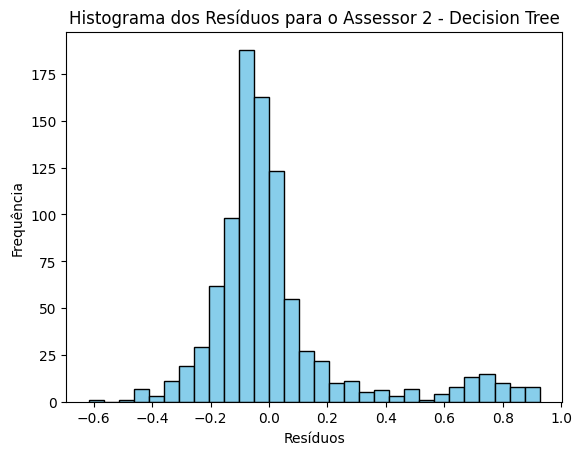

In [66]:
residuals = y_erro_dt - pred_ass2_dt
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos para o Assessor 2 - Decision Tree')
plt.show()

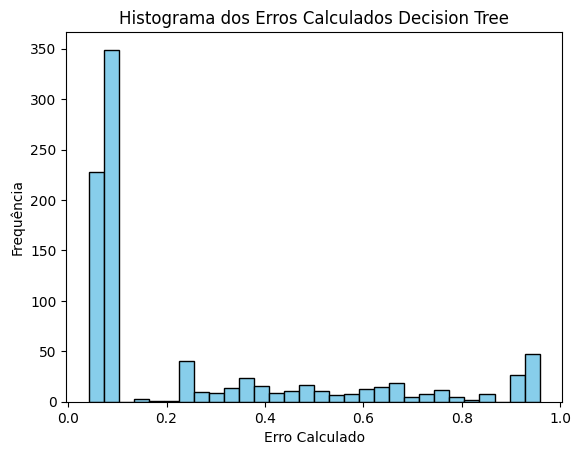

In [67]:
# Histograma dos erros reais da Decision Tree
plt.hist(y_erro_dt, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro Calculado')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Calculados Decision Tree')
plt.show()

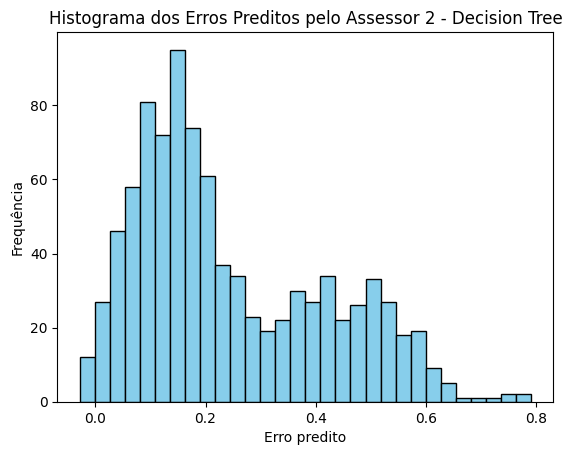

In [68]:
# Histograma dos erros preditos pelo Assessor 2 da Decision Tree
plt.hist(pred_ass2_dt, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro predito')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Preditos pelo Assessor 2 - Decision Tree')
plt.show()

In [69]:
# Ajustando os dados (necessário para o StandardScaler, que não funciona sem o fit mesmo que o cross_val_predict já tenha sido utilizado)
ass2_dt.fit(X_entr_dt, y_erro_dt)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

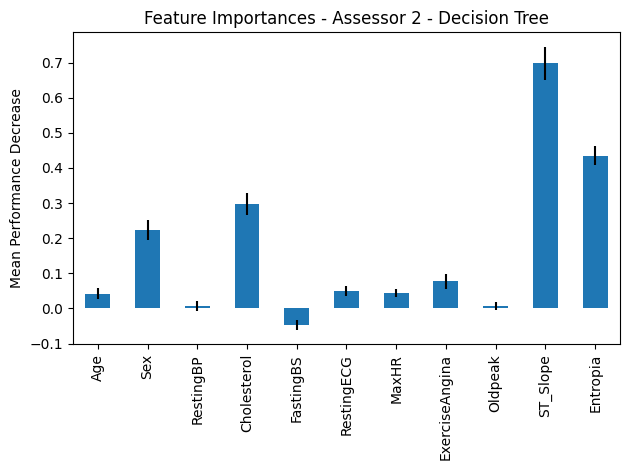

In [70]:
# Feature importances
result = permutation_importance(ass2_dt, X_entr_dt, pred_ass2_dt, n_repeats=30, random_state=0)
forest_importances = pd.Series(result.importances_mean, index=X_entr_dt.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature Importances - Assessor 2 - Decision Tree")
ax.set_ylabel("Mean Performance Decrease")

fig.tight_layout()
plt.show()

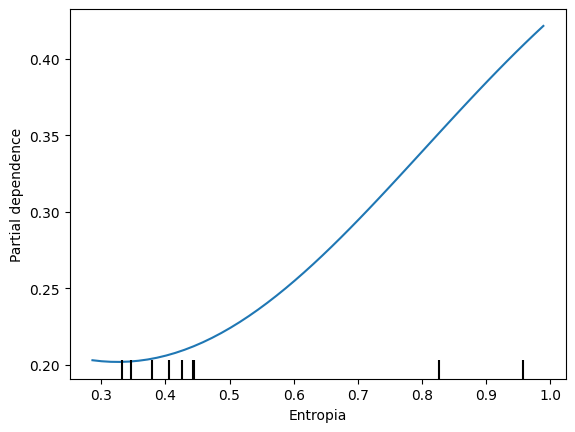

In [71]:
# PDP para a Entropia
disp = PartialDependenceDisplay.from_estimator(ass2_dt, X_entr_dt, [(10)], grid_resolution=50)

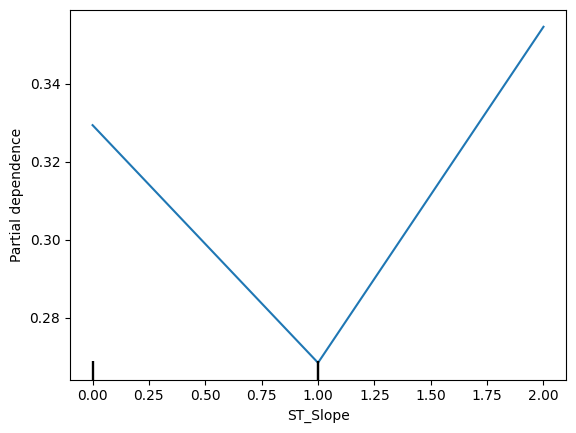

In [72]:
# PDP para o ST_Slope
disp = PartialDependenceDisplay.from_estimator(ass2_dt, X_entr_dt, [(9)], grid_resolution=50)

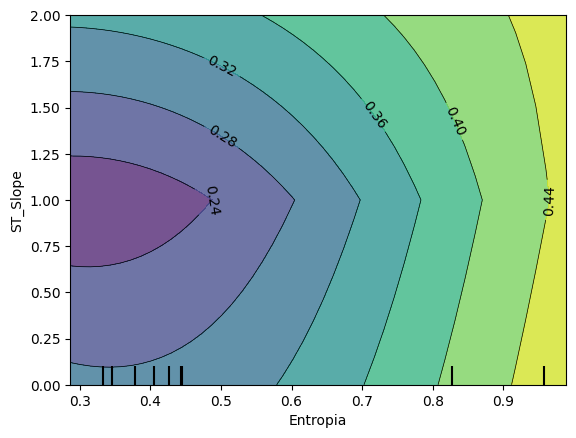

In [73]:
# PDP bi-dimensional para verificar as dependências entre as features Entropia e ST_Slope
disp = PartialDependenceDisplay.from_estimator(ass2_dt, X_entr_dt, [(10, 9)], grid_resolution=50)

#### Assessor 3

In [74]:
# Assessor 3: Treinado apenas com a entropia | Atributo preditor: Erro do modelo

ass3_dt = make_pipeline(StandardScaler(), SVR())
pred_ass3_dt = cross_val_predict(ass3_dt, X_apenas_entr_dt, y_erro_dt, cv = 10)

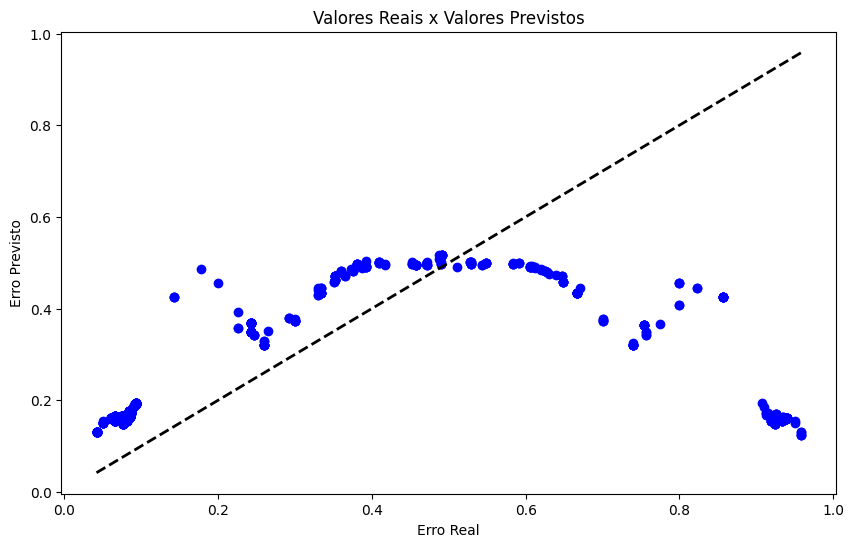

In [75]:
plt.figure(figsize=(10, 6))
plt.scatter(y_erro_dt, pred_ass3_dt, color='blue')
plt.plot([y_erro_dt.min(), y_erro_dt.max()], [y_erro_dt.min(), y_erro_dt.max()], 'k--', lw=2)
plt.xlabel('Erro Real')
plt.ylabel('Erro Previsto')
plt.title('Valores Reais x Valores Previstos')
plt.show()

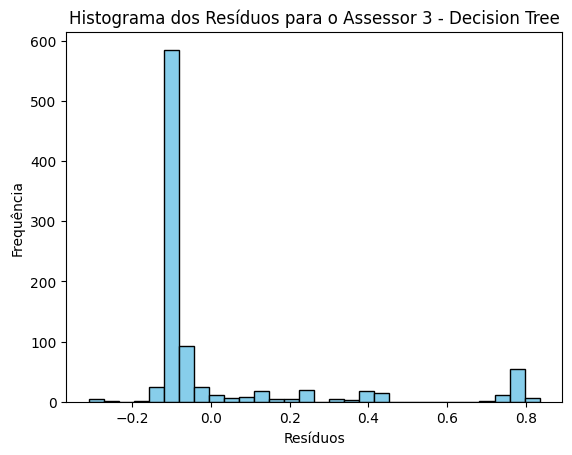

In [76]:
residuals = y_erro_dt - pred_ass3_dt
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos para o Assessor 3 - Decision Tree')
plt.show()

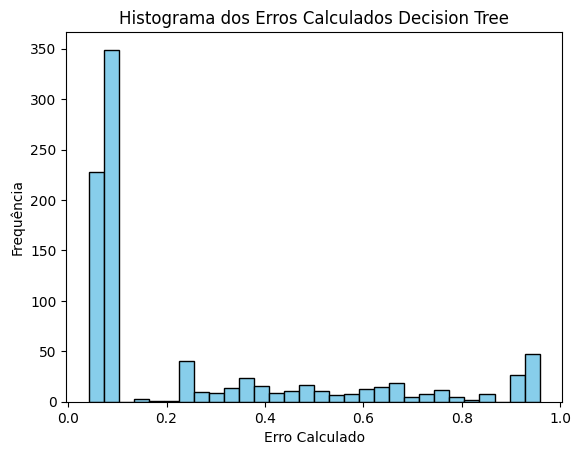

In [77]:
# Histograma dos erros reais da Decision Tree
plt.hist(y_erro_dt, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro Calculado')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Calculados Decision Tree')
plt.show()

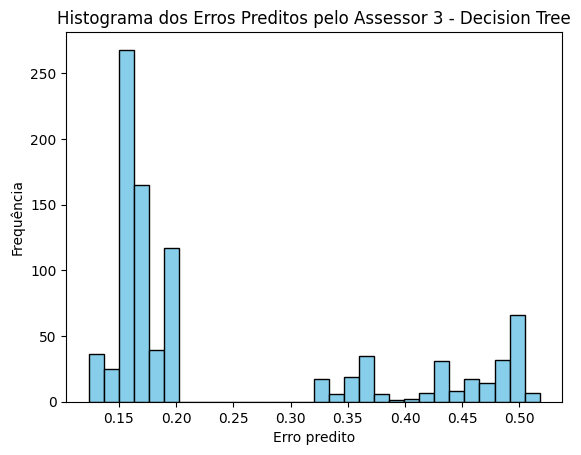

In [78]:
# Histograma dos erros preditos pelo Assessor 3 da Decision Tree
plt.hist(pred_ass3_dt, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro predito')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Preditos pelo Assessor 3 - Decision Tree')
plt.show()

In [79]:
# Ajustando os dados (necessário para o StandardScaler, que não funciona sem o fit mesmo que o cross_val_predict já tenha sido utilizado)
ass3_dt.fit(X_apenas_entr_dt, y_erro_dt)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

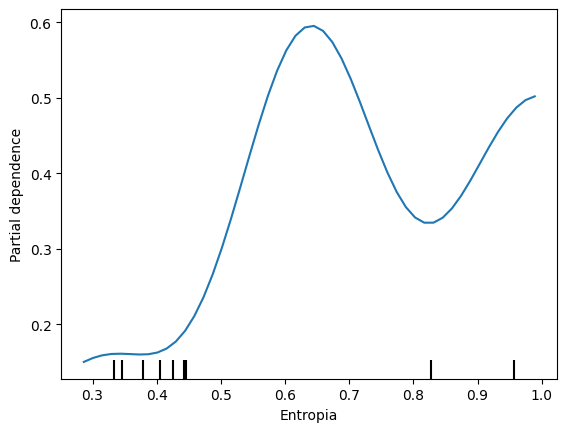

In [80]:
# PDP para a Entropia
disp = PartialDependenceDisplay.from_estimator(ass3_dt, X_apenas_entr_dt, [(0)], grid_resolution=50)

### Performances dos modelos

In [81]:
# Decision Tree
report_dt = classification_report(y, pred_dt)
print(report_dt)

              precision    recall  f1-score   support

           0       0.78      0.77      0.77       410
           1       0.81      0.82      0.82       508

    accuracy                           0.80       918
   macro avg       0.80      0.79      0.79       918
weighted avg       0.80      0.80      0.80       918



In [82]:
# Assessores
mae_ass1_dt = mean_absolute_error(y_erro_dt, pred_ass1_dt)
print(f'Assessor 1 (dados sem entropia): {mae_ass1_dt}')

mae_ass2_dt = mean_absolute_error(y_erro_dt, pred_ass2_dt)
print(f'Assessor 2 (dados com entropia): {mae_ass2_dt}')

mae_ass3_dt = mean_absolute_error(y_erro_dt, pred_ass3_dt)
print(f'Assessor 3 (somente entropia): {mae_ass3_dt}')

Assessor 1 (dados sem entropia): 0.16004425521363877
Assessor 2 (dados com entropia): 0.15429263777920957
Assessor 3 (somente entropia): 0.16354989220506252


## Random Forest

In [83]:
# Instanciando e treinando o classificador
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Encontrando as probabilidades de certeza sobre as predições do modelo e printando os 5 primeiros exemplos
prob_rf = cross_val_predict(rf, X, y, cv = 10, method = 'predict_proba')
pred_rf = cross_val_predict(rf, X, y, cv = 10)
print(f'Probabilidades (prob_rf):\n{prob_rf[:5]}\n')

prob_rf[prob_rf == 0] = 0.001
prob_rf[prob_rf == 1] = 0.999

# Erro absoluto
erro_rf = filtra_label(prob_rf)
print(f'Erro absoluto (erro_rf):\n{erro_rf[:5]}\n Erro médio: {np.mean(erro_rf)}\n')

# Entropia
entr_rf = -prob_rf * np.log2(prob_rf) - (1 - prob_rf) * np.log2(1 - prob_rf)
print(f'Entropia (entr_rf):\n{entr_rf[:5]}')

Probabilidades (prob_rf):
[[0.97 0.03]
 [0.63 0.37]
 [0.95 0.05]
 [0.3  0.7 ]
 [0.99 0.01]]

Erro absoluto (erro_rf):
[0.03 0.63 0.05 0.3  0.01]
 Erro médio: 0.24142483660130717

Entropia (entr_rf):
[[0.19439186 0.19439186]
 [0.95067209 0.95067209]
 [0.28639696 0.28639696]
 [0.8812909  0.8812909 ]
 [0.08079314 0.08079314]]


### Assessores: Random Forest

In [84]:
# Formatando o erro e a entropia
erro_rf = np.array(erro_rf)

entr_rf = np.array(np.delete(entr_rf, 1, axis=1))
entr_rf = entr_rf.flatten()

print(f'Erro: {erro_rf[:5]}...\n')
print(f'Entropia: {entr_rf[:5]}...\n')

# Dataset com coluna para a entropia média do pool
X_entr_rf = X.copy()
X_entr_rf['Entropia'] = entr_rf

# Atributo preditor: Coluna para o erro médio do pool
y_erro_rf = erro_rf

Erro: [0.03 0.63 0.05 0.3  0.01]...

Entropia: [0.19439186 0.95067209 0.28639696 0.8812909  0.08079314]...



In [85]:
# X utilizado para o treinamento do Assessor 2 (dados + entropia)
X_entr_rf.head()

Age  Sex  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  \
0   40    0        140          289          0           0    172   
1   49    1        160          180          0           0    156   
2   37    0        130          283          0           1     98   
3   48    1        138          214          0           0    108   
4   54    0        150          195          0           0    122   

   ExerciseAngina  Oldpeak  ST_Slope  Entropia  
0               0      0.0         0  0.194392  
1               0      1.0         1  0.950672  
2               0      0.0         0  0.286397  
3               1      1.5         1  0.881291  
4               0      0.0         0  0.080793

In [86]:
# Criando um dataset somente com entropia para o terceiro assessor
X_apenas_entr_rf = X_entr_rf.copy()
X_apenas_entr_rf = X_apenas_entr_rf.drop(columns = ["Age", "Sex", "RestingBP", "Cholesterol", "FastingBS", "RestingECG", "MaxHR", "ExerciseAngina", "Oldpeak", "ST_Slope"])

# X utilizado para o treinamento do Assessor 3 (entropia)
X_apenas_entr_rf.head()

Entropia
0  0.194392
1  0.950672
2  0.286397
3  0.881291
4  0.080793

#### Assessor 1

In [87]:
# Assessor 1: Treinado com dados | Atributo preditor: Erro do modelo

ass1_rf = make_pipeline(StandardScaler(), SVR())
pred_ass1_rf = cross_val_predict(ass1_rf, full_X, y_erro_rf, cv = 10)

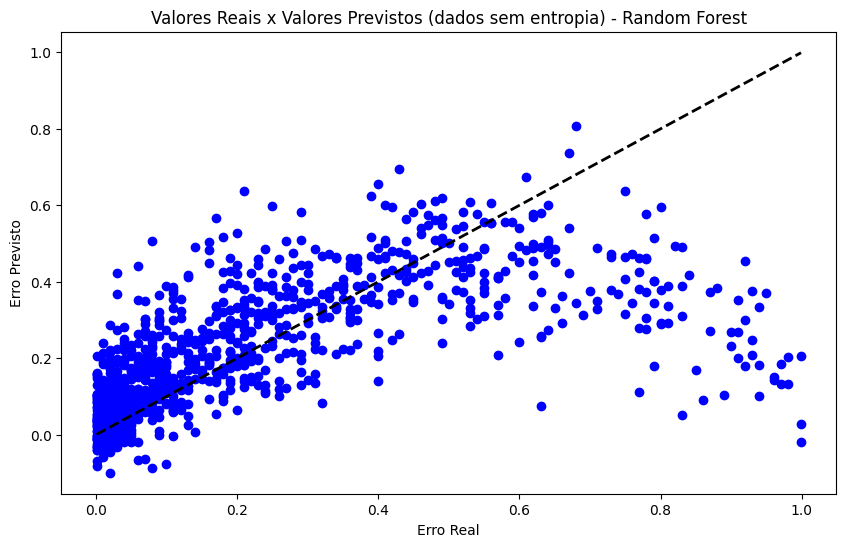

In [88]:
plt.figure(figsize=(10, 6))
plt.scatter(y_erro_rf, pred_ass1_rf, color='blue')
plt.plot([y_erro_rf.min(), y_erro_rf.max()], [y_erro_rf.min(), y_erro_rf.max()], 'k--', lw=2)
plt.xlabel('Erro Real')
plt.ylabel('Erro Previsto')
plt.title('Valores Reais x Valores Previstos (dados sem entropia) - Random Forest')
plt.show()

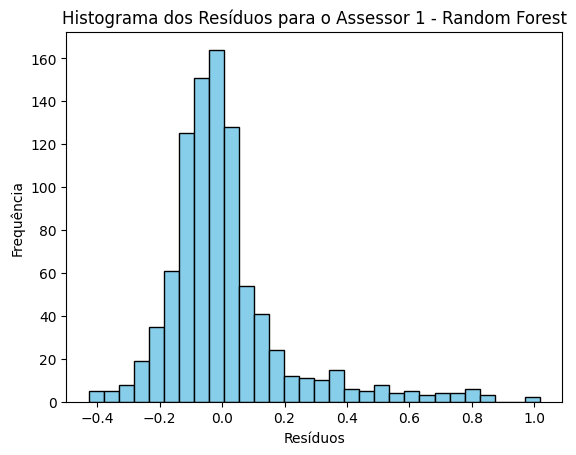

In [89]:
residuals = y_erro_rf - pred_ass1_rf
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos para o Assessor 1 - Random Forest')
plt.show()

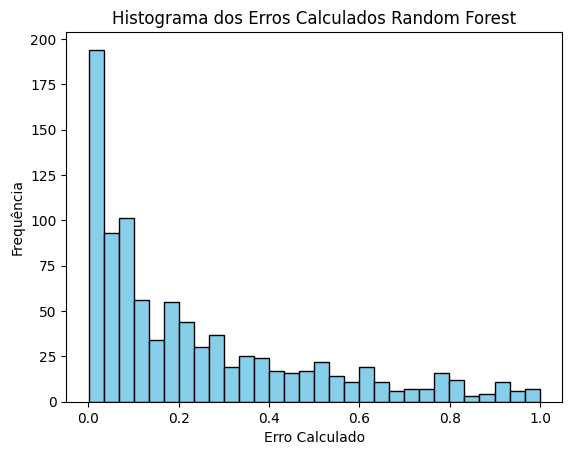

In [90]:
# Histograma dos erros reais do Random Forest
plt.hist(y_erro_rf, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro Calculado')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Calculados Random Forest')
plt.show()

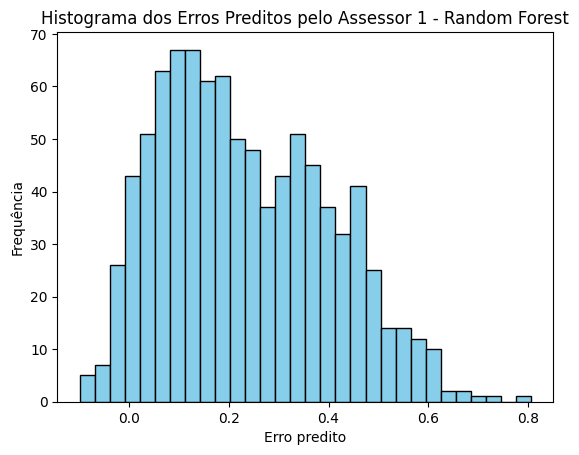

In [91]:
# Histograma dos erros preditos pelo Assessor 1 do Random Forest
plt.hist(pred_ass1_rf, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro predito')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Preditos pelo Assessor 1 - Random Forest')
plt.show()

In [92]:
# Ajustando os dados (necessário para o StandardScaler, que não funciona sem o fit mesmo que o cross_val_predict já tenha sido utilizado)
ass1_rf.fit(full_X, y_erro_rf)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

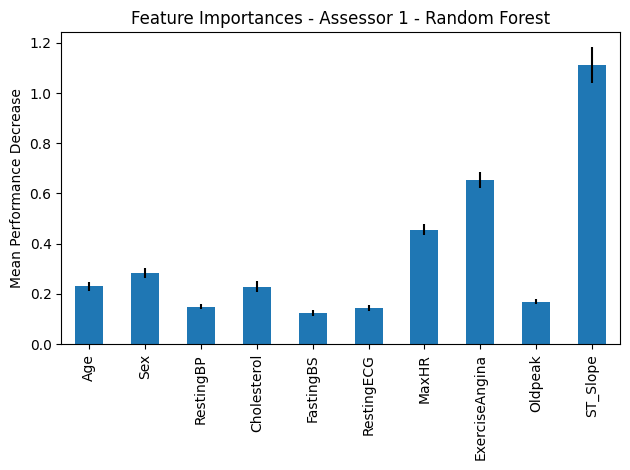

In [93]:
# Feature importances
result = permutation_importance(ass1_rf, full_X, pred_ass1_rf, n_repeats=30, random_state=0)
forest_importances = pd.Series(result.importances_mean, index=full_X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature Importances - Assessor 1 - Random Forest")
ax.set_ylabel("Mean Performance Decrease")

fig.tight_layout()
plt.show()

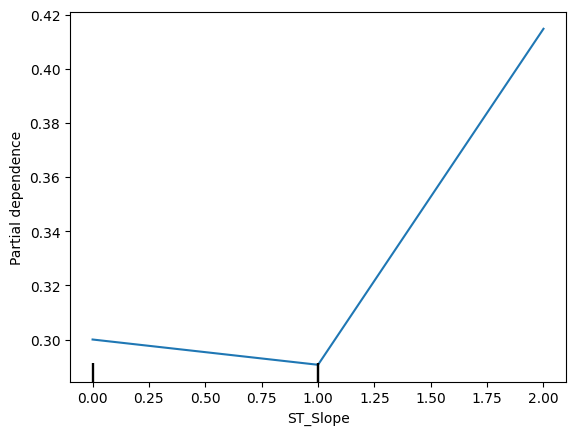

In [94]:
# PDP para o ST_Slope
disp = PartialDependenceDisplay.from_estimator(ass1_rf, full_X, [(9)], grid_resolution=50)

#### Assessor 2

In [95]:
# Assessor 2: Treinado com dados + entropia | Atributo preditor: Erro do modelo

ass2_rf = make_pipeline(StandardScaler(), SVR())
pred_ass2_rf = cross_val_predict(ass2_rf, X_entr_rf, y_erro_rf, cv = 10)

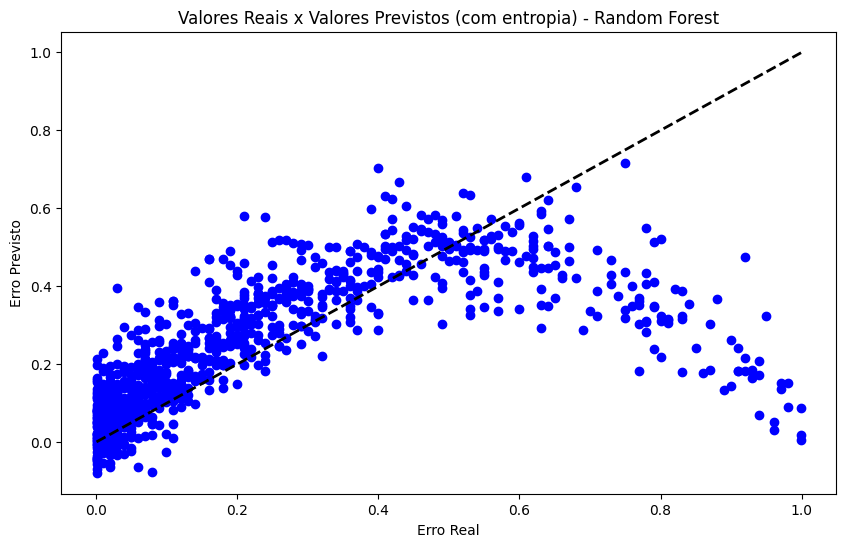

In [96]:
plt.figure(figsize=(10, 6))
plt.scatter(y_erro_rf, pred_ass2_rf, color='blue')
plt.plot([y_erro_rf.min(), y_erro_rf.max()], [y_erro_rf.min(), y_erro_rf.max()], 'k--', lw=2)
plt.xlabel('Erro Real')
plt.ylabel('Erro Previsto')
plt.title('Valores Reais x Valores Previstos (com entropia) - Random Forest')
plt.show()

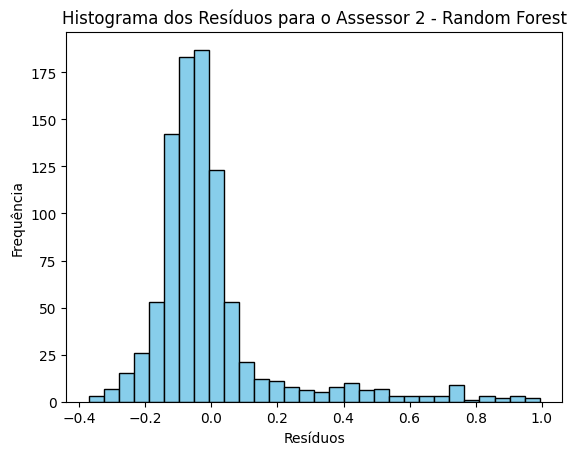

In [97]:
residuals = y_erro_rf - pred_ass2_rf
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos para o Assessor 2 - Random Forest')
plt.show()

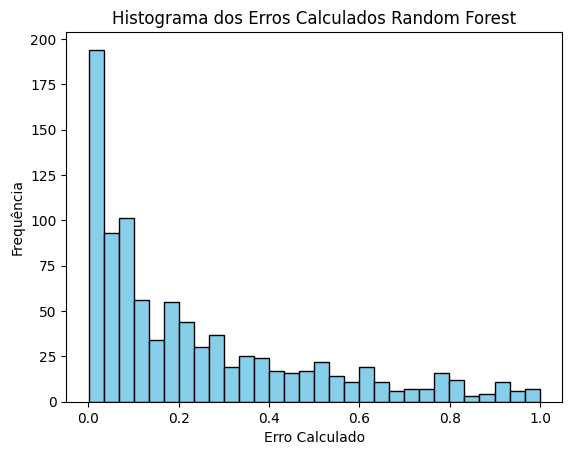

In [98]:
# Histograma dos erros reais do Random Forest
plt.hist(y_erro_rf, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro Calculado')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Calculados Random Forest')
plt.show()

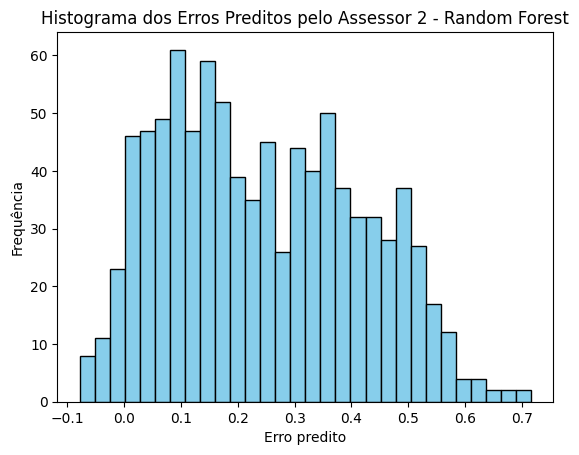

In [99]:
# Histograma dos erros preditos pelo Assessor 2 do Random Forest
plt.hist(pred_ass2_rf, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro predito')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Preditos pelo Assessor 2 - Random Forest')
plt.show()

In [100]:
# Ajustando os dados (necessário para o StandardScaler, que não funciona sem o fit mesmo que o cross_val_predict já tenha sido utilizado)
ass2_rf.fit(X_entr_rf, y_erro_rf)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

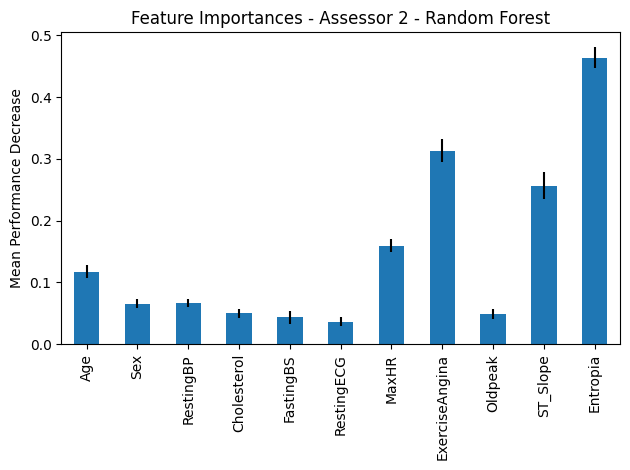

In [101]:
# Feature importances
result = permutation_importance(ass2_rf, X_entr_rf, pred_ass2_rf, n_repeats=30, random_state=0)
forest_importances = pd.Series(result.importances_mean, index=X_entr_rf.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature Importances - Assessor 2 - Random Forest")
ax.set_ylabel("Mean Performance Decrease")

fig.tight_layout()
plt.show()

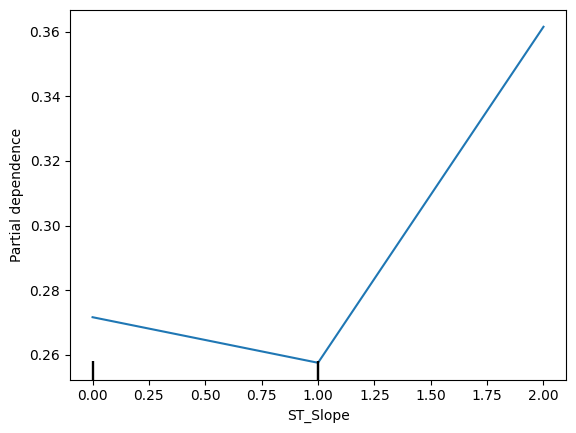

In [102]:
# PDP para o ST_Slope
disp = PartialDependenceDisplay.from_estimator(ass2_rf, X_entr_rf, [(9)], grid_resolution=50)

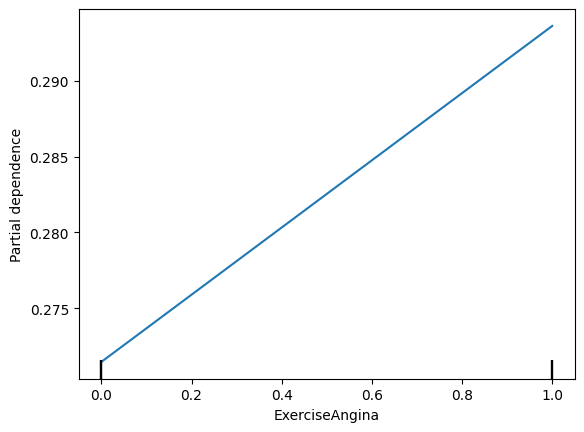

In [103]:
# PDP para a ExerciseAngina
disp = PartialDependenceDisplay.from_estimator(ass2_rf, X_entr_rf, [(7)], grid_resolution=50)

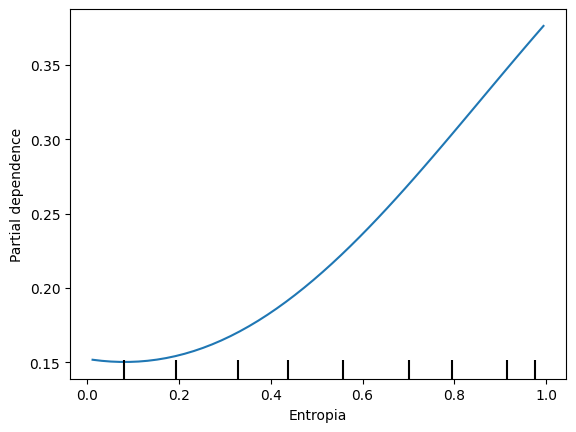

In [104]:
# PDP para a Entropia
disp = PartialDependenceDisplay.from_estimator(ass2_rf, X_entr_rf, [(10)], grid_resolution=50)

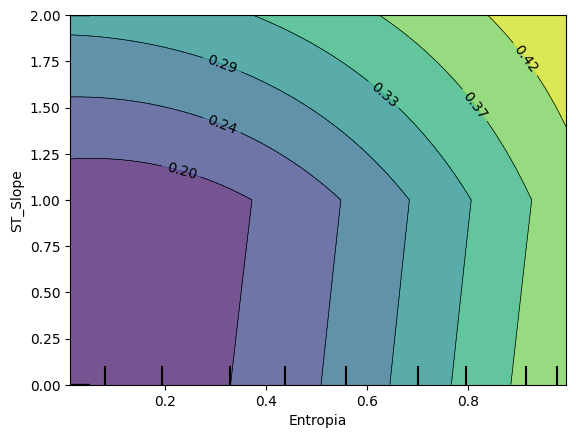

In [105]:
# PDP bi-dimensional para verificar as dependências entre as features Entropia e ST_Slope
disp = PartialDependenceDisplay.from_estimator(ass2_rf, X_entr_rf, [(10, 9)], grid_resolution=50)

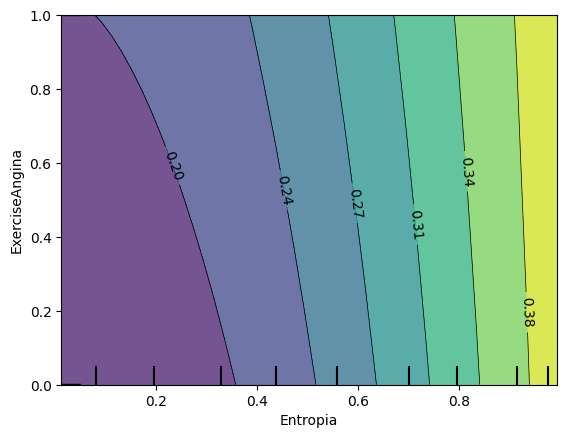

In [106]:
# PDP bi-dimensional para verificar as dependências entre as features Entropia e ExerciseAngina
disp = PartialDependenceDisplay.from_estimator(ass2_rf, X_entr_rf, [(10, 7)], grid_resolution=50)

#### Assessor 3

In [107]:
# Assessor 3: Treinado apenas com a entropia | Atributo preditor: Erro do modelo

ass3_rf = make_pipeline(StandardScaler(), SVR())
pred_ass3_rf = cross_val_predict(ass3_rf, X_apenas_entr_rf, y_erro_rf, cv = 10)

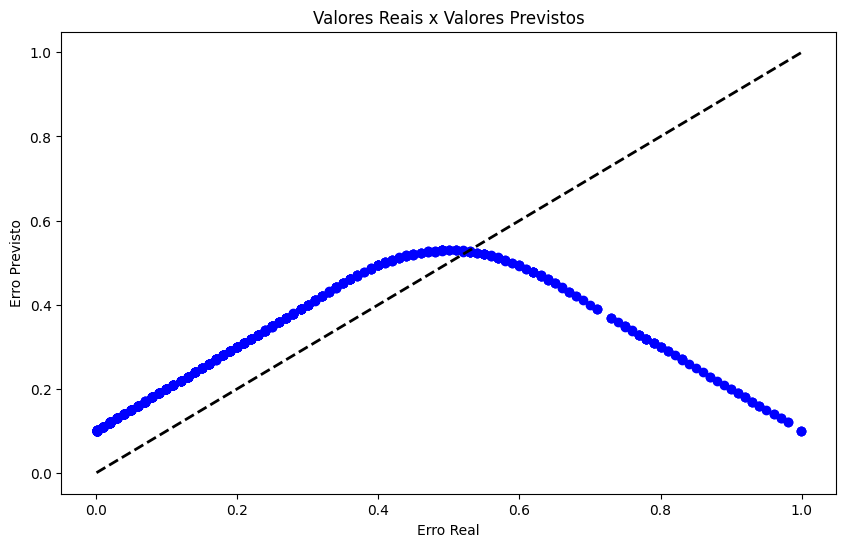

In [108]:
plt.figure(figsize=(10, 6))
plt.scatter(y_erro_rf, pred_ass3_rf, color='blue')
plt.plot([y_erro_rf.min(), y_erro_rf.max()], [y_erro_rf.min(), y_erro_rf.max()], 'k--', lw=2)
plt.xlabel('Erro Real')
plt.ylabel('Erro Previsto')
plt.title('Valores Reais x Valores Previstos')
plt.show()

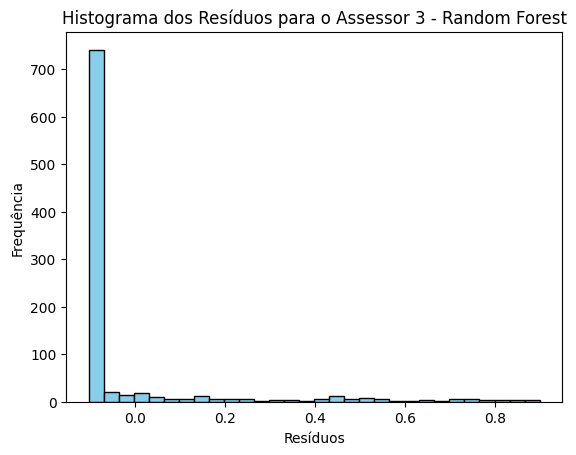

In [109]:
residuals = y_erro_rf - pred_ass3_rf
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos para o Assessor 3 - Random Forest')
plt.show()

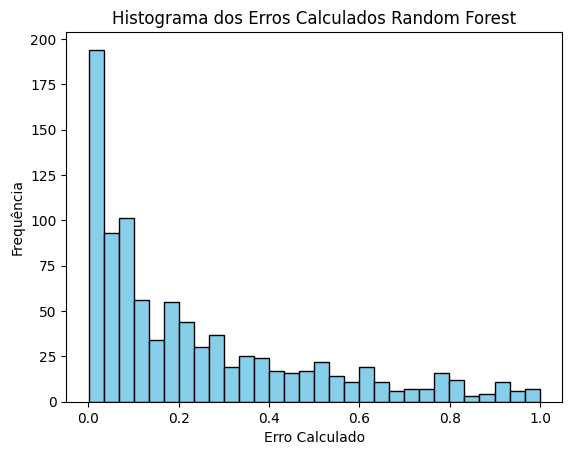

In [110]:
# Histograma dos erros reais do Random Forest
plt.hist(y_erro_rf, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro Calculado')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Calculados Random Forest')
plt.show()

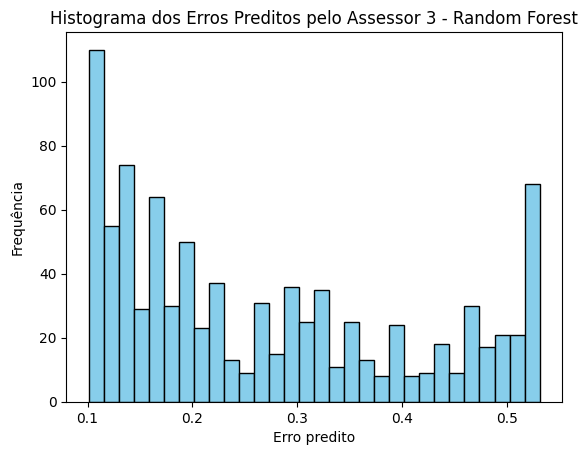

In [111]:
# Histograma dos erros preditos pelo Assessor 3 do Random Forest
plt.hist(pred_ass3_rf, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro predito')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Preditos pelo Assessor 3 - Random Forest')
plt.show()

In [112]:
# Ajustando os dados (necessário para o StandardScaler, que não funciona sem o fit mesmo que o cross_val_predict já tenha sido utilizado)
ass3_rf.fit(X_apenas_entr_rf, y_erro_rf)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

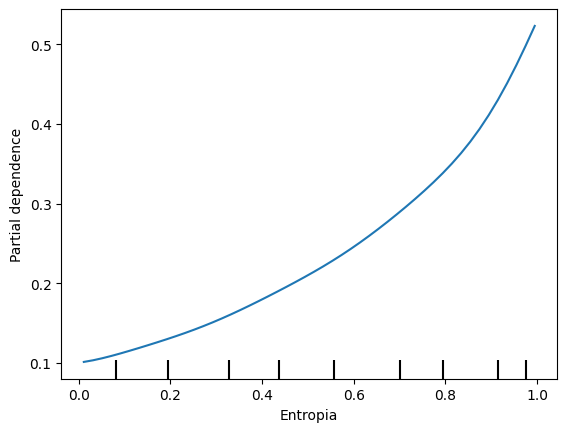

In [113]:
# PDP para a Entropia
disp = PartialDependenceDisplay.from_estimator(ass3_rf, X_apenas_entr_rf, [(0)], grid_resolution=50)

### Performances dos modelos

In [114]:
# Random Forest
report_rf = classification_report(y, pred_rf)
print(report_rf)

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       410
           1       0.84      0.85      0.85       508

    accuracy                           0.83       918
   macro avg       0.83      0.83      0.83       918
weighted avg       0.83      0.83      0.83       918



In [115]:
# Assessores
mae_ass1_rf = mean_absolute_error(y_erro_rf, pred_ass1_rf)
print(f'Assessor 1 (dados sem entropia): {mae_ass1_rf}')

mae_ass2_rf = mean_absolute_error(y_erro_rf, pred_ass2_rf)
print(f'Assessor 2 (dados com entropia): {mae_ass2_rf}')

mae_ass3_rf = mean_absolute_error(y_erro_rf, pred_ass3_rf)
print(f'Assessor 3 (somente entropia): {mae_ass3_rf}')

Assessor 1 (dados sem entropia): 0.12740559326794632
Assessor 2 (dados com entropia): 0.12084804047402796
Assessor 3 (somente entropia): 0.13547148923517793


## Naive Bayes

In [116]:
# Instanciando e treinando o classificador
nb = GaussianNB()

# Encontrando as probabilidades de certeza sobre as predições do modelo e printando os 5 primeiros exemplos
prob_nb = cross_val_predict(nb, X, y, cv = 10, method = 'predict_proba')
pred_nb = cross_val_predict(nb, X, y, cv = 10)
print(f'Probabilidades (prob_nb):\n{prob_nb[:5]}\n')

prob_nb[prob_nb == 0] = 0.001
prob_nb[prob_nb == 1] = 0.999

# Erro absoluto
erro_nb = filtra_label(prob_nb)
print(f'Erro absoluto (erro_nb):\n{erro_nb[:5]}\n Erro médio: {np.mean(erro_nb)}\n')

# Entropia
entr_nb = -prob_nb * np.log2(prob_nb) - (1 - prob_nb) * np.log2(1 - prob_nb)
print(f'Entropia (entr_nb):\n{entr_nb[:5]}')

Probabilidades (prob_nb):
[[0.99846802 0.00153198]
 [0.99425686 0.00574314]
 [0.98198237 0.01801763]
 [0.47146935 0.52853065]
 [0.94262824 0.05737176]]

Erro absoluto (erro_nb):
[0.00153198 0.99425686 0.01801763 0.47146935 0.05737176]
 Erro médio: 0.18334608510850614

Entropia (entr_nb):
[[0.01653307 0.01653307]
 [0.05101337 0.05101337]
 [0.13016055 0.13016055]
 [0.99765002 0.99765002]
 [0.31692219 0.31692219]]


### Assessores: Naive Bayes

In [117]:
# Formatando o erro e a entropia
erro_nb = np.array(erro_nb)

entr_nb = np.array(np.delete(entr_nb, 1, axis=1))
entr_nb = entr_nb.flatten()

print(f'Erro: {erro_nb[:5]}...\n')
print(f'Entropia: {entr_nb[:5]}...\n')

# Dataset com coluna para a entropia média do pool
X_entr_nb = X.copy()
X_entr_nb['Entropia'] = entr_nb

# Atributo preditor: Coluna para o erro médio do pool
y_erro_nb = erro_nb

Erro: [0.00153198 0.99425686 0.01801763 0.47146935 0.05737176]...

Entropia: [0.01653307 0.05101337 0.13016055 0.99765002 0.31692219]...



In [118]:
# X utilizado para o treinamento do Assessor 2 (dados + entropia)
X_entr_nb.head()

Age  Sex  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  \
0   40    0        140          289          0           0    172   
1   49    1        160          180          0           0    156   
2   37    0        130          283          0           1     98   
3   48    1        138          214          0           0    108   
4   54    0        150          195          0           0    122   

   ExerciseAngina  Oldpeak  ST_Slope  Entropia  
0               0      0.0         0  0.016533  
1               0      1.0         1  0.051013  
2               0      0.0         0  0.130161  
3               1      1.5         1  0.997650  
4               0      0.0         0  0.316922

In [119]:
# Criando um dataset somente com entropia para o terceiro assessor
X_apenas_entr_nb = X_entr_nb.copy()
X_apenas_entr_nb = X_apenas_entr_nb.drop(columns = ["Age", "Sex", "RestingBP", "Cholesterol", "FastingBS", "RestingECG", "MaxHR", "ExerciseAngina", "Oldpeak", "ST_Slope"])

# X utilizado para o treinamento do Assessor 3 (entropia)
X_apenas_entr_nb.head()

Entropia
0  0.016533
1  0.051013
2  0.130161
3  0.997650
4  0.316922

#### Assessor 1

In [120]:
# Assessor 1: Treinado com dados | Atributo preditor: Erro do modelo

ass1_nb = make_pipeline(StandardScaler(), SVR())
pred_ass1_nb = cross_val_predict(ass1_nb, full_X, y_erro_nb, cv = 10)

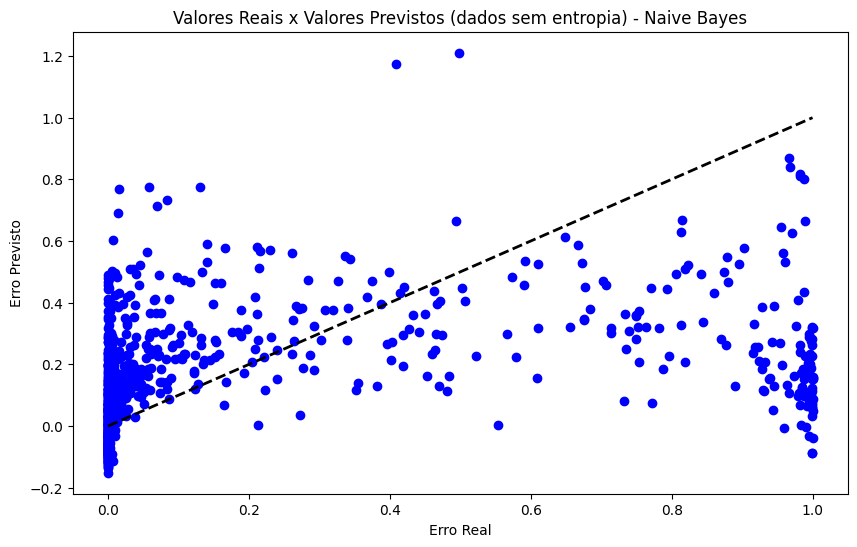

In [121]:
plt.figure(figsize=(10, 6))
plt.scatter(y_erro_nb, pred_ass1_nb, color='blue')
plt.plot([y_erro_nb.min(), y_erro_nb.max()], [y_erro_nb.min(), y_erro_nb.max()], 'k--', lw=2)
plt.xlabel('Erro Real')
plt.ylabel('Erro Previsto')
plt.title('Valores Reais x Valores Previstos (dados sem entropia) - Naive Bayes')
plt.show()

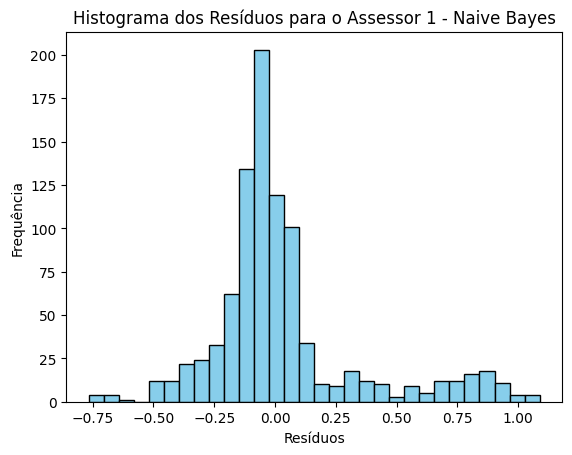

In [122]:
residuals = y_erro_nb - pred_ass1_nb
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos para o Assessor 1 - Naive Bayes')
plt.show()

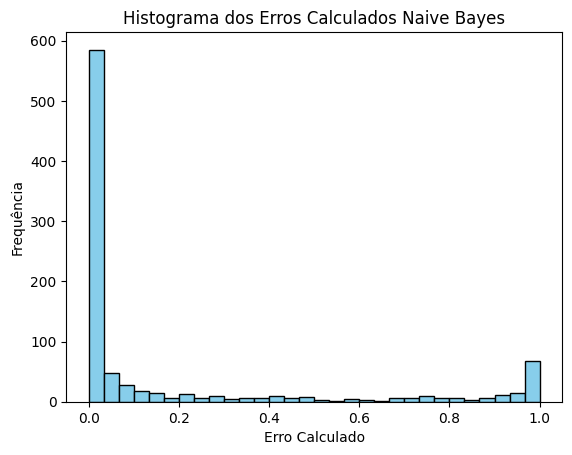

In [123]:
# Histograma dos erros reais do Naive Bayes
plt.hist(y_erro_nb, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro Calculado')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Calculados Naive Bayes')
plt.show()

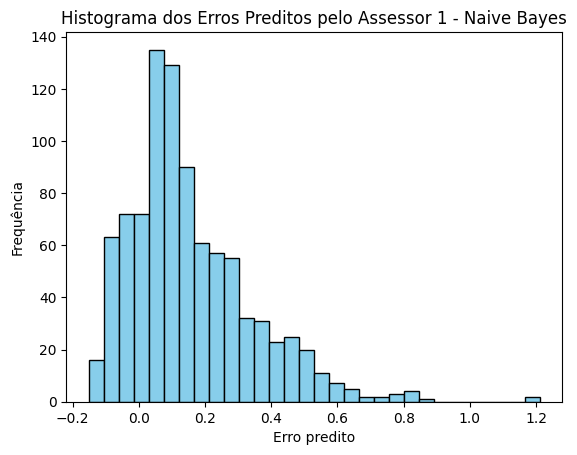

In [124]:
# Histograma dos erros preditos pelo Assessor 1 do Naive Bayes
plt.hist(pred_ass1_nb, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro predito')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Preditos pelo Assessor 1 - Naive Bayes')
plt.show()

In [125]:
# Ajustando os dados (necessário para o StandardScaler, que não funciona sem o fit mesmo que o cross_val_predict já tenha sido utilizado)
ass1_nb.fit(full_X, y_erro_nb)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

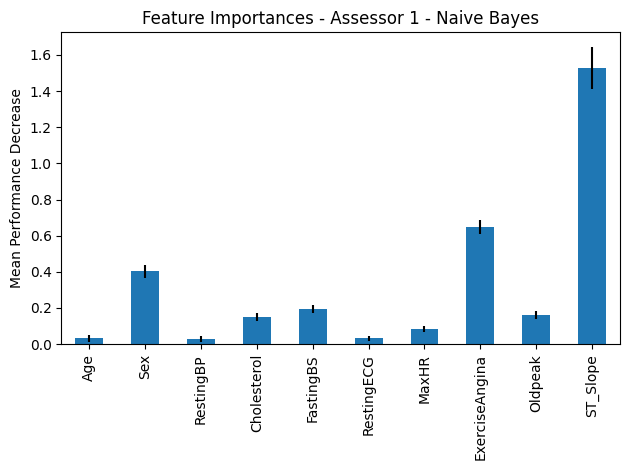

In [126]:
# Feature importances
result = permutation_importance(ass1_nb, full_X, pred_ass1_nb, n_repeats=30, random_state=0)
forest_importances = pd.Series(result.importances_mean, index=full_X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature Importances - Assessor 1 - Naive Bayes")
ax.set_ylabel("Mean Performance Decrease")

fig.tight_layout()
plt.show()

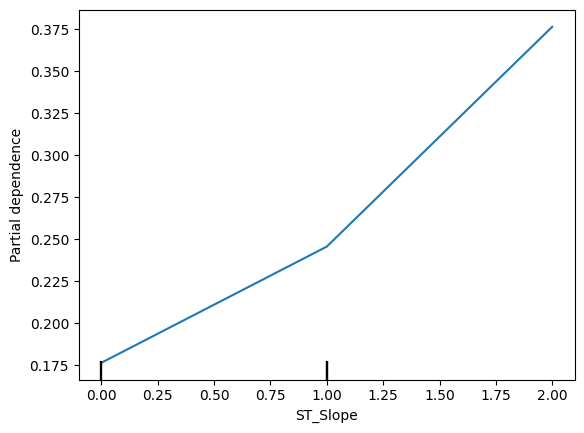

In [127]:
# PDP para o ST_Slope
disp = PartialDependenceDisplay.from_estimator(ass1_nb, full_X, [(9)], grid_resolution=50)

#### Assessor 2

In [128]:
# Assessor 2: Treinado com dados + entropia | Atributo preditor: Erro do modelo

ass2_nb = make_pipeline(StandardScaler(), SVR())
pred_ass2_nb = cross_val_predict(ass2_nb, X_entr_nb, y_erro_nb, cv = 10)

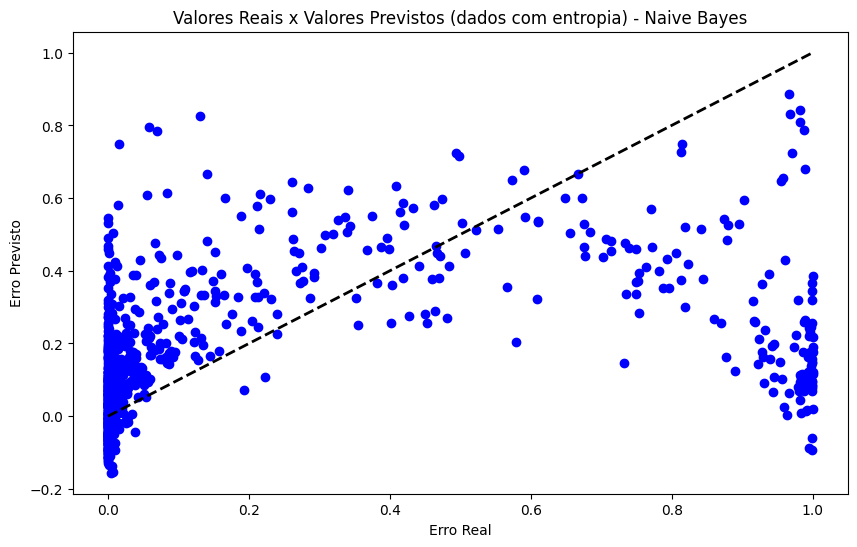

In [129]:
plt.figure(figsize=(10, 6))
plt.scatter(y_erro_nb, pred_ass2_nb, color='blue')
plt.plot([y_erro_nb.min(), y_erro_nb.max()], [y_erro_nb.min(), y_erro_nb.max()], 'k--', lw=2)
plt.xlabel('Erro Real')
plt.ylabel('Erro Previsto')
plt.title('Valores Reais x Valores Previstos (dados com entropia) - Naive Bayes')
plt.show()

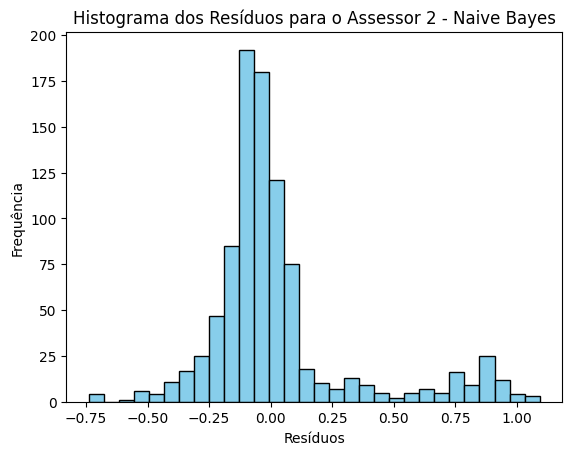

In [130]:
residuals = y_erro_nb - pred_ass2_nb
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos para o Assessor 2 - Naive Bayes')
plt.show()

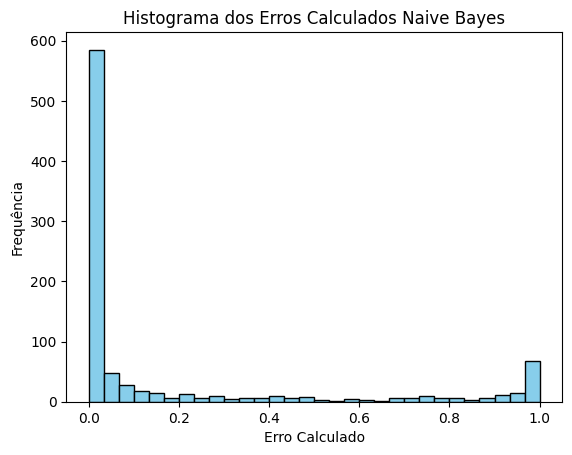

In [131]:
# Histograma dos erros reais do Naive Bayes
plt.hist(y_erro_nb, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro Calculado')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Calculados Naive Bayes')
plt.show()

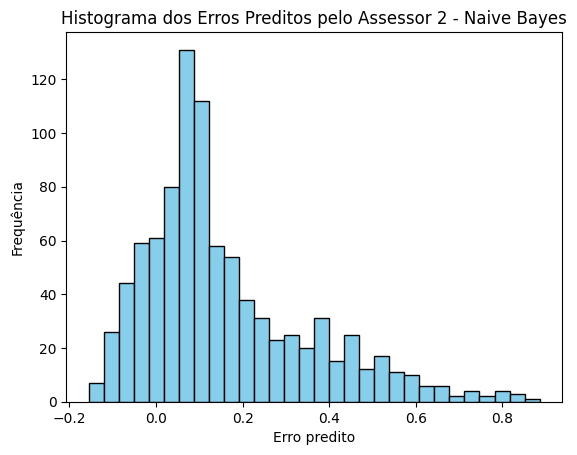

In [132]:
# Histograma dos erros preditos pelo Assessor 2 do Naive Bayes
plt.hist(pred_ass2_nb, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro predito')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Preditos pelo Assessor 2 - Naive Bayes')
plt.show()

In [133]:
# Ajustando os dados (necessário para o StandardScaler, que não funciona sem o fit mesmo que o cross_val_predict já tenha sido utilizado)
ass2_nb.fit(X_entr_nb, y_erro_nb)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

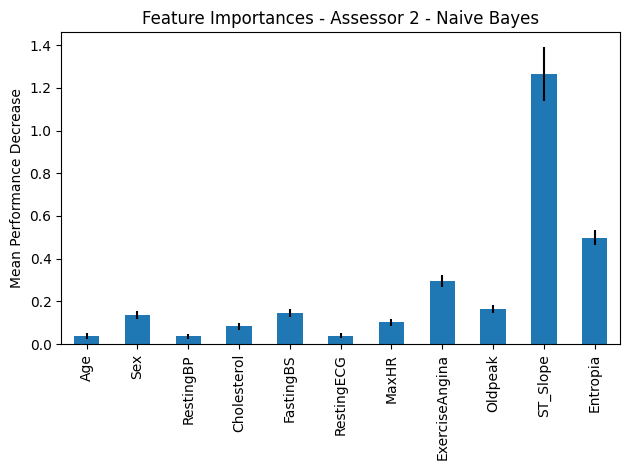

In [134]:
# Feature importances
result = permutation_importance(ass2_nb, X_entr_nb, pred_ass2_nb, n_repeats=30, random_state=0)
forest_importances = pd.Series(result.importances_mean, index=X_entr_nb.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature Importances - Assessor 2 - Naive Bayes")
ax.set_ylabel("Mean Performance Decrease")

fig.tight_layout()
plt.show()

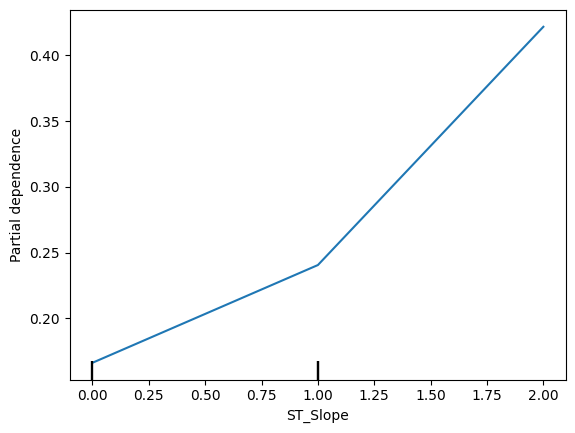

In [135]:
# PDP para o ST_Slope
disp = PartialDependenceDisplay.from_estimator(ass2_nb, X_entr_nb, [(9)], grid_resolution=50)

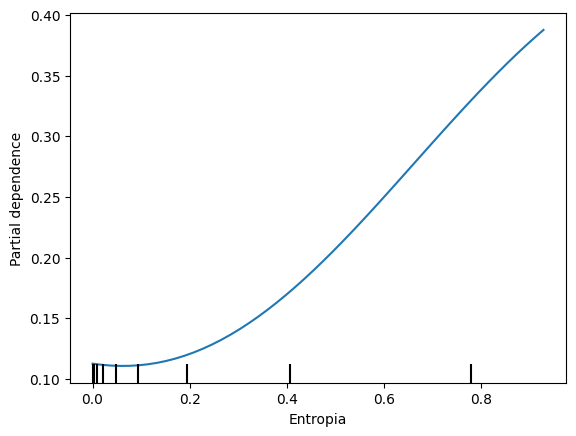

In [136]:
# PDP para a Entropia
disp = PartialDependenceDisplay.from_estimator(ass2_nb, X_entr_nb, [(10)], grid_resolution=50)

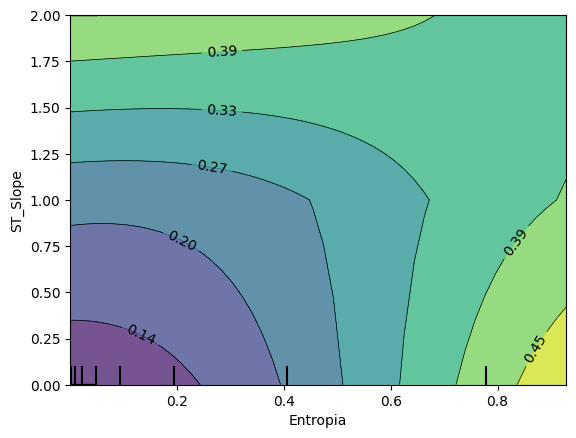

In [137]:
# PDP bi-dimensional para verificar as dependências entre as features Entropia e ST_Slope
disp = PartialDependenceDisplay.from_estimator(ass2_nb, X_entr_nb, [(10, 9)], grid_resolution=50)

#### Assessor 3

In [138]:
# Assessor 3: Treinado apenas com a entropia | Atributo preditor: Erro do modelo

ass3_nb = make_pipeline(StandardScaler(), SVR())
pred_ass3_nb = cross_val_predict(ass3_nb, X_apenas_entr_nb, y_erro_nb, cv = 10)

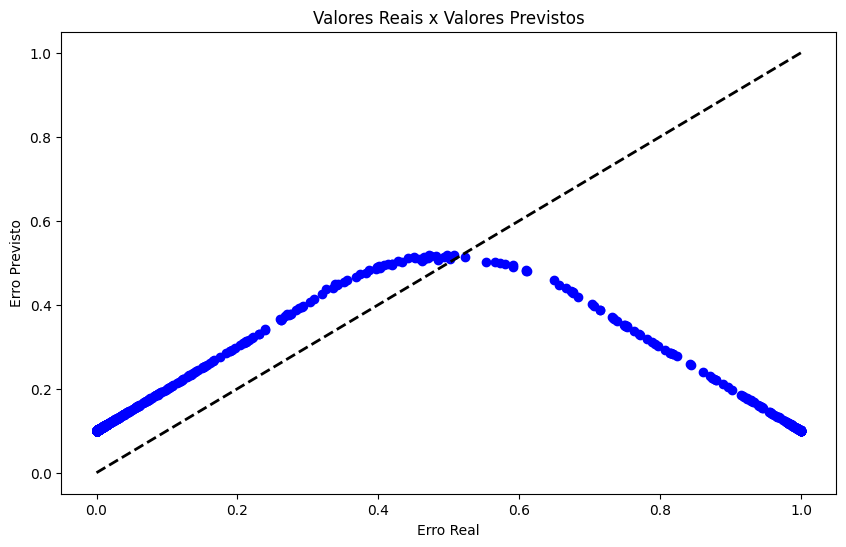

In [139]:
plt.figure(figsize=(10, 6))
plt.scatter(y_erro_nb, pred_ass3_nb, color='blue')
plt.plot([y_erro_nb.min(), y_erro_nb.max()], [y_erro_nb.min(), y_erro_nb.max()], 'k--', lw=2)
plt.xlabel('Erro Real')
plt.ylabel('Erro Previsto')
plt.title('Valores Reais x Valores Previstos')
plt.show()

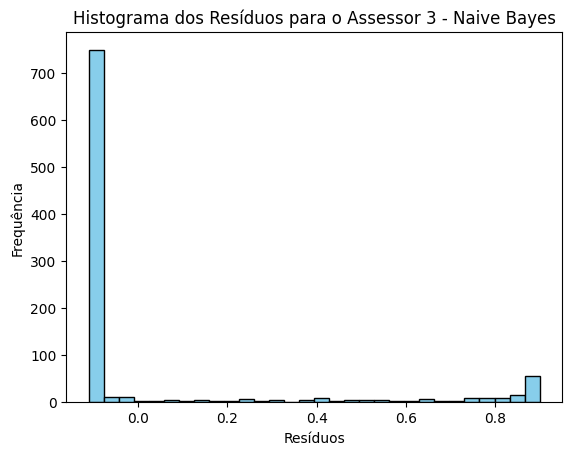

In [140]:
residuals = y_erro_nb - pred_ass3_nb
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos para o Assessor 3 - Naive Bayes')
plt.show()

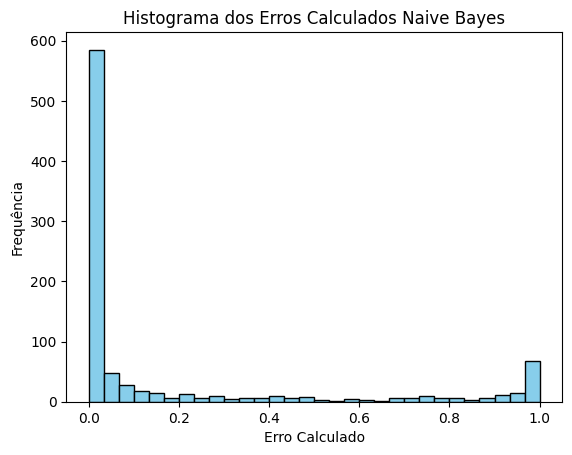

In [141]:
# Histograma dos erros reais do Naive Bayes
plt.hist(y_erro_nb, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro Calculado')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Calculados Naive Bayes')
plt.show()

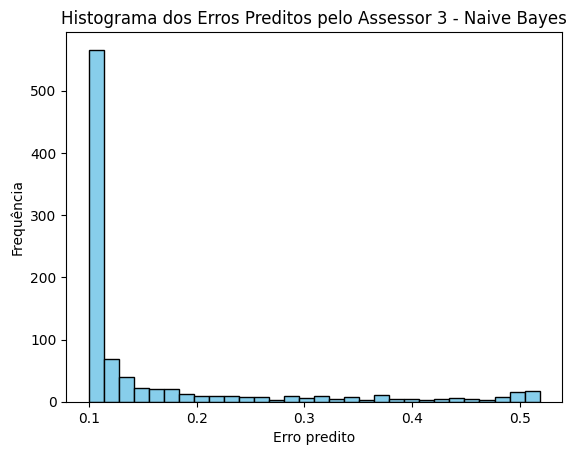

In [142]:
# Histograma dos erros preditos pelo Assessor 3 do Naive Bayes
plt.hist(pred_ass3_nb, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro predito')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Preditos pelo Assessor 3 - Naive Bayes')
plt.show()

In [143]:
# Ajustando os dados (necessário para o StandardScaler, que não funciona sem o fit mesmo que o cross_val_predict já tenha sido utilizado)
ass3_nb.fit(X_apenas_entr_nb, y_erro_nb)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

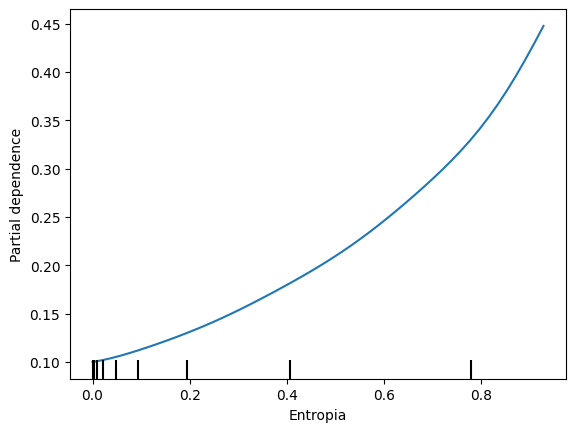

In [144]:
# PDP para a Entropia
disp = PartialDependenceDisplay.from_estimator(ass3_nb, X_apenas_entr_nb, [(0)], grid_resolution=50)

### Performances dos modelos

In [145]:
# Naive Bayes
report_nb = classification_report(y, pred_nb)
print(report_nb)

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       410
           1       0.85      0.85      0.85       508

    accuracy                           0.84       918
   macro avg       0.83      0.83      0.83       918
weighted avg       0.84      0.84      0.84       918



In [146]:
# Assessores
mae_ass1_nb = mean_absolute_error(y_erro_nb, pred_ass1_nb)
print(f'Assessor 1 (dados sem entropia): {mae_ass1_nb}')

mae_ass2_nb = mean_absolute_error(y_erro_nb, pred_ass2_nb)
print(f'Assessor 2 (dados com entropia): {mae_ass2_nb}')

mae_ass3_nb = mean_absolute_error(y_erro_nb, pred_ass3_nb)
print(f'Assessor 3 (somente entropia): {mae_ass3_nb}')

Assessor 1 (dados sem entropia): 0.199549113473364
Assessor 2 (dados com entropia): 0.18790101147738086
Assessor 3 (somente entropia): 0.19155206644526862


## Logistic Regression

In [147]:
# Instanciando e treinando o classificador
lr = LogisticRegression(max_iter=500)

# Encontrando as probabilidades de certeza sobre as predições do modelo e printando os 5 primeiros exemplos
prob_lr = cross_val_predict(lr, X, y, cv = 10, method = 'predict_proba')
pred_lr = cross_val_predict(lr, X, y, cv = 10)
print(f'Probabilidades (prob_lr):\n{prob_lr[:5]}\n')

prob_lr[prob_lr == 0] = 0.001
prob_lr[prob_lr == 1] = 0.999

# Erro absoluto
erro_lr = filtra_label(prob_lr)
print(f'Erro absoluto (erro_lr):\n{erro_lr[:5]}\n Erro médio: {np.mean(erro_lr)}\n')

# Entropia
entr_lr = -prob_lr * np.log2(prob_lr) - (1 - prob_lr) * np.log2(1 - prob_lr)
print(f'Entropia (entr_lr):\n{entr_lr[:5]}')

Probabilidades (prob_lr):
[[0.93760443 0.06239557]
 [0.76662091 0.23337909]
 [0.81901587 0.18098413]
 [0.27383912 0.72616088]
 [0.78051361 0.21948639]]

Erro absoluto (erro_lr):
[0.06239557 0.76662091 0.18098413 0.27383912 0.21948639]
 Erro médio: 0.26026622550511636

Entropia (entr_lr):
[[0.33688194 0.33688194]
 [0.78385547 0.78385547]
 [0.68222523 0.68222523]
 [0.84691976 0.84691976]
 [0.75922856 0.75922856]]


### Assessores: Logistic Regression

In [148]:
# Formatando o erro e a entropia
erro_lr = np.array(erro_lr)

entr_lr = np.array(np.delete(entr_lr, 1, axis=1))
entr_lr = entr_lr.flatten()

print(f'Erro: {erro_lr[:5]}...\n')
print(f'Entropia: {entr_lr[:5]}...\n')

# Dataset com coluna para a entropia média do pool
X_entr_lr = X.copy()
X_entr_lr['Entropia'] = entr_lr

# Atributo preditor: Coluna para o erro médio do pool
y_erro_lr = erro_lr

Erro: [0.06239557 0.76662091 0.18098413 0.27383912 0.21948639]...

Entropia: [0.33688194 0.78385547 0.68222523 0.84691976 0.75922856]...



In [149]:
# X utilizado para o treinamento do Assessor 2 (dados + entropia)
X_entr_lr.head()

Age  Sex  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  \
0   40    0        140          289          0           0    172   
1   49    1        160          180          0           0    156   
2   37    0        130          283          0           1     98   
3   48    1        138          214          0           0    108   
4   54    0        150          195          0           0    122   

   ExerciseAngina  Oldpeak  ST_Slope  Entropia  
0               0      0.0         0  0.336882  
1               0      1.0         1  0.783855  
2               0      0.0         0  0.682225  
3               1      1.5         1  0.846920  
4               0      0.0         0  0.759229

In [150]:
# Criando um dataset somente com entropia para o terceiro assessor
X_apenas_entr_lr = X_entr_lr.copy()
X_apenas_entr_lr = X_apenas_entr_lr.drop(columns = ["Age", "Sex", "RestingBP", "Cholesterol", "FastingBS", "RestingECG", "MaxHR", "ExerciseAngina", "Oldpeak", "ST_Slope"])

# X utilizado para o treinamento do Assessor 3 (entropia)
X_apenas_entr_lr.head()

Entropia
0  0.336882
1  0.783855
2  0.682225
3  0.846920
4  0.759229

#### Assessor 1

In [151]:
# Assessor 1: Treinado com dados | Atributo preditor: Erro do modelo

ass1_lr = make_pipeline(StandardScaler(), SVR())
pred_ass1_lr = cross_val_predict(ass1_lr, full_X, y_erro_lr, cv = 10)

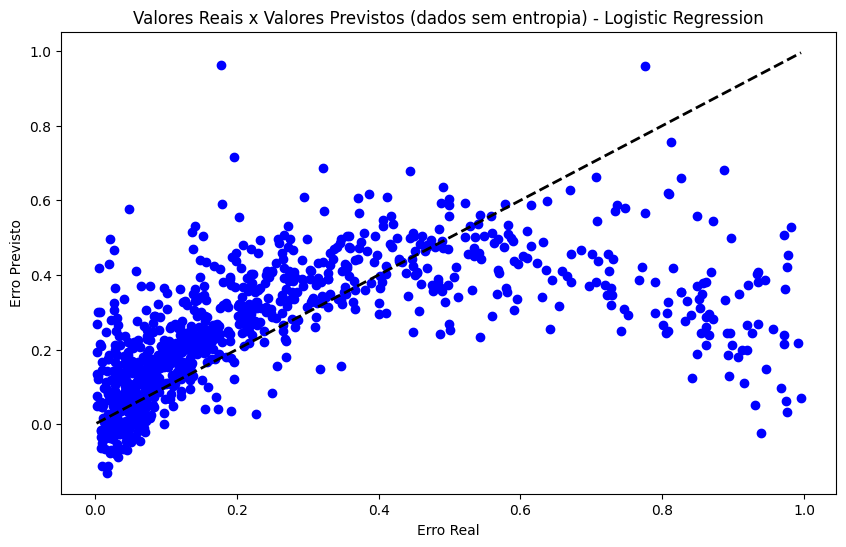

In [152]:
plt.figure(figsize=(10, 6))
plt.scatter(y_erro_lr, pred_ass1_lr, color='blue')
plt.plot([y_erro_lr.min(), y_erro_lr.max()], [y_erro_lr.min(), y_erro_lr.max()], 'k--', lw=2)
plt.xlabel('Erro Real')
plt.ylabel('Erro Previsto')
plt.title('Valores Reais x Valores Previstos (dados sem entropia) - Logistic Regression')
plt.show()

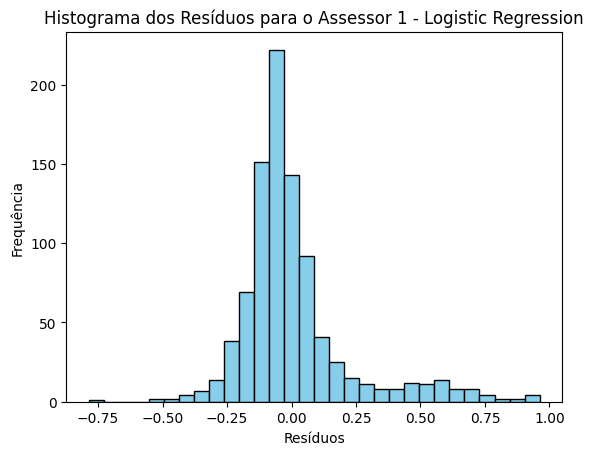

In [153]:
residuals = y_erro_lr - pred_ass1_lr
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos para o Assessor 1 - Logistic Regression')
plt.show()

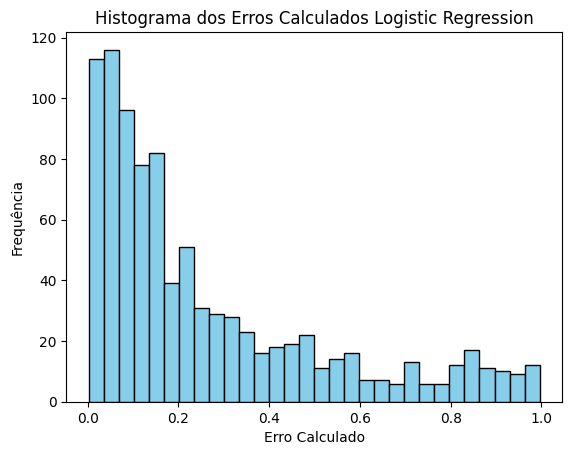

In [154]:
# Histograma dos erros reais da Logistic Regression
plt.hist(y_erro_lr, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro Calculado')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Calculados Logistic Regression')
plt.show()

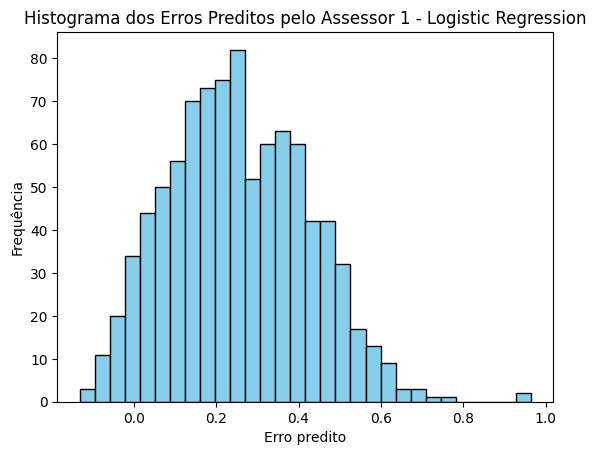

In [155]:
# Histograma dos erros preditos pelo Assessor 1 da Logistic Regression
plt.hist(pred_ass1_lr, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro predito')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Preditos pelo Assessor 1 - Logistic Regression')
plt.show()

In [156]:
# Ajustando os dados (necessário para o StandardScaler, que não funciona sem o fit mesmo que o cross_val_predict já tenha sido utilizado)
ass1_lr.fit(full_X, y_erro_lr)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

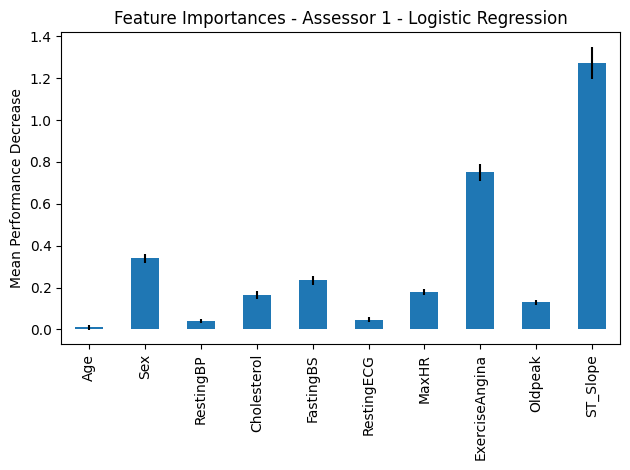

In [157]:
# Feature importances
result = permutation_importance(ass1_lr, full_X, pred_ass1_lr, n_repeats=30, random_state=0)
forest_importances = pd.Series(result.importances_mean, index=full_X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature Importances - Assessor 1 - Logistic Regression")
ax.set_ylabel("Mean Performance Decrease")

fig.tight_layout()
plt.show()

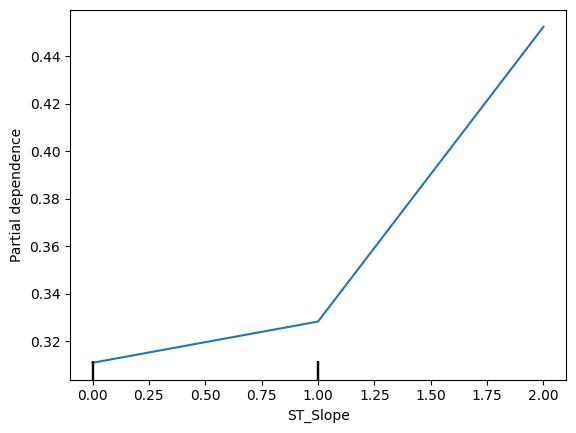

In [158]:
# PDP para o ST_Slope
disp = PartialDependenceDisplay.from_estimator(ass1_lr, full_X, [(9)], grid_resolution=50)

#### Assessor 2

In [159]:
# Assessor 2: Treinado com dados + entropia | Atributo preditor: Erro do modelo

ass2_lr = make_pipeline(StandardScaler(), SVR())
pred_ass2_lr = cross_val_predict(ass2_lr, X_entr_lr, y_erro_lr, cv = 10)

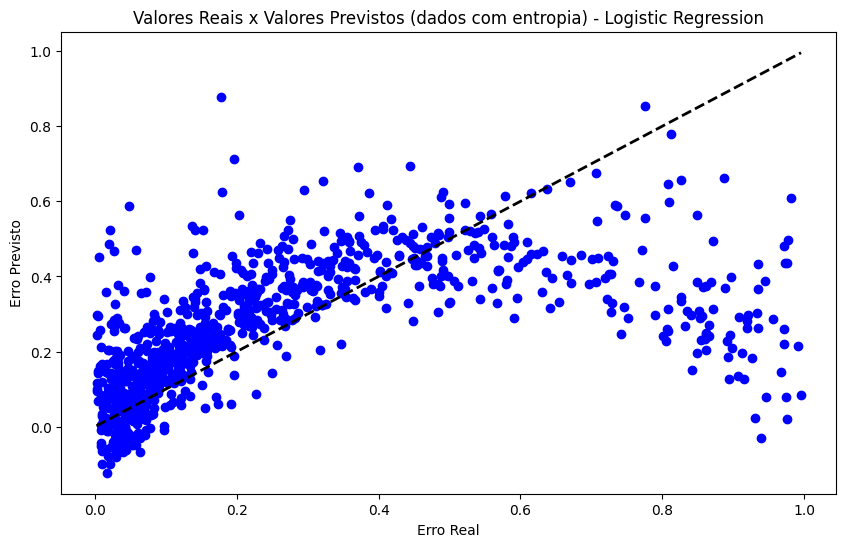

In [160]:
plt.figure(figsize=(10, 6))
plt.scatter(y_erro_lr, pred_ass2_lr, color='blue')
plt.plot([y_erro_lr.min(), y_erro_lr.max()], [y_erro_lr.min(), y_erro_lr.max()], 'k--', lw=2)
plt.xlabel('Erro Real')
plt.ylabel('Erro Previsto')
plt.title('Valores Reais x Valores Previstos (dados com entropia) - Logistic Regression')
plt.show()

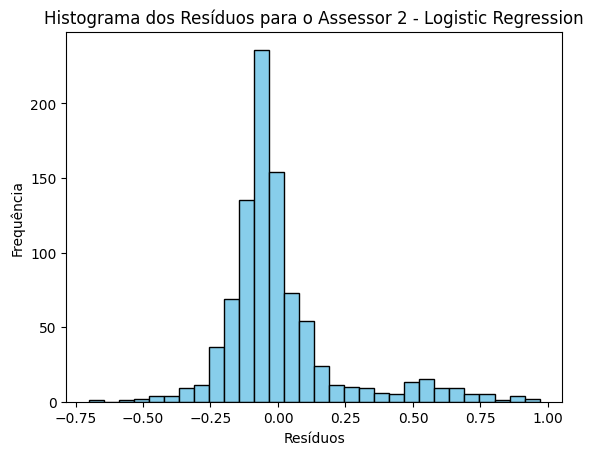

In [161]:
residuals = y_erro_lr - pred_ass2_lr
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos para o Assessor 2 - Logistic Regression')
plt.show()

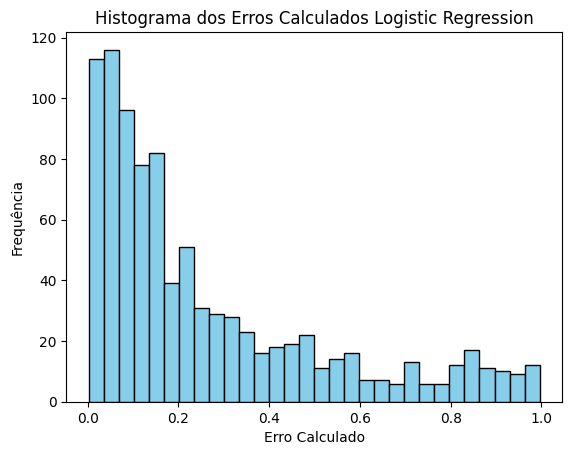

In [162]:
# Histograma dos erros reais da Logistic Regression
plt.hist(y_erro_lr, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro Calculado')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Calculados Logistic Regression')
plt.show()

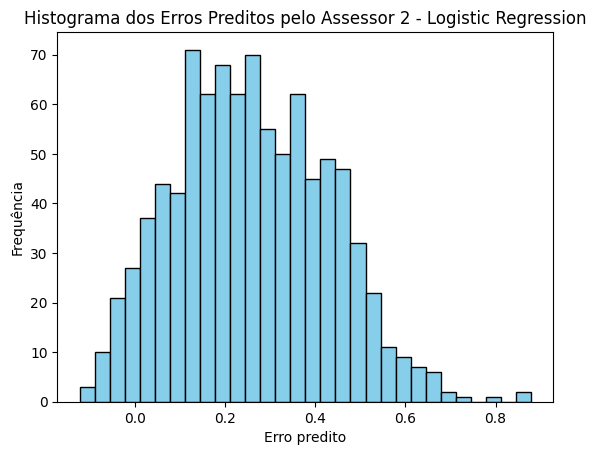

In [163]:
# Histograma dos erros preditos pelo Assessor 2 da Logistic Regression
plt.hist(pred_ass2_lr, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro predito')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Preditos pelo Assessor 2 - Logistic Regression')
plt.show()

In [164]:
# Ajustando os dados (necessário para o StandardScaler, que não funciona sem o fit mesmo que o cross_val_predict já tenha sido utilizado)
ass2_lr.fit(X_entr_lr, y_erro_lr)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

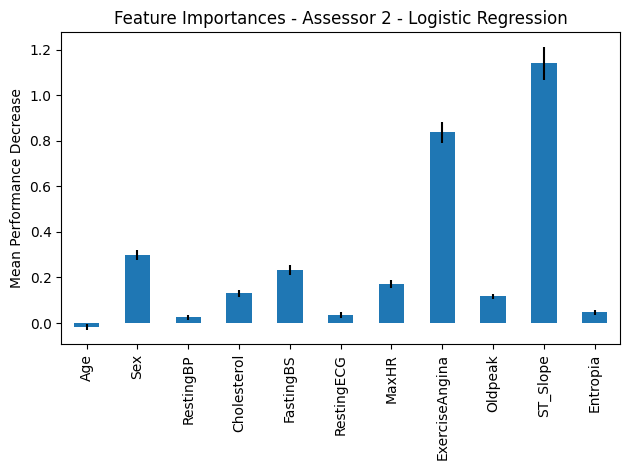

In [165]:
# Feature importances
result = permutation_importance(ass2_lr, X_entr_lr, pred_ass2_lr, n_repeats=30, random_state=0)
forest_importances = pd.Series(result.importances_mean, index=X_entr_lr.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature Importances - Assessor 2 - Logistic Regression")
ax.set_ylabel("Mean Performance Decrease")

fig.tight_layout()
plt.show()

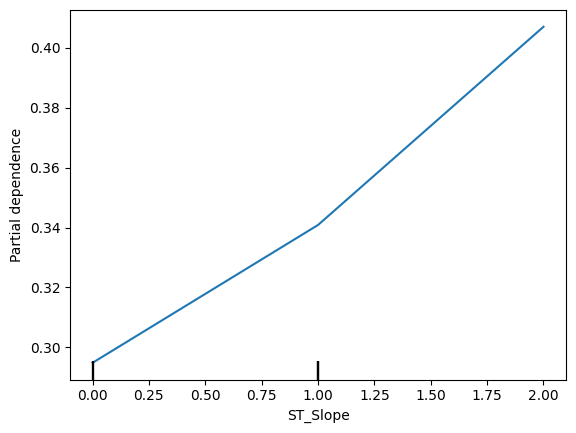

In [166]:
# PDP para o ST_Slope
disp = PartialDependenceDisplay.from_estimator(ass2_lr, X_entr_lr, [(9)], grid_resolution=50)

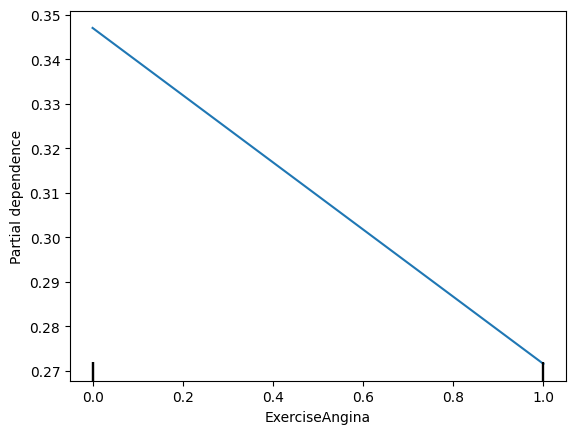

In [167]:
# PDP para a ExerciseAngina
disp = PartialDependenceDisplay.from_estimator(ass2_lr, X_entr_lr, [(7)], grid_resolution=50)

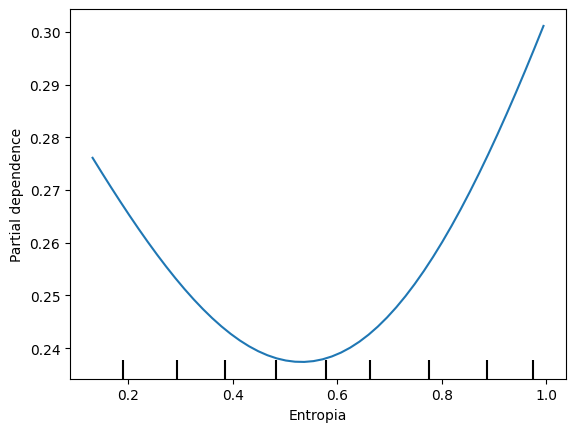

In [168]:
# PDP para a Entropia
disp = PartialDependenceDisplay.from_estimator(ass2_lr, X_entr_lr, [(10)], grid_resolution=50)

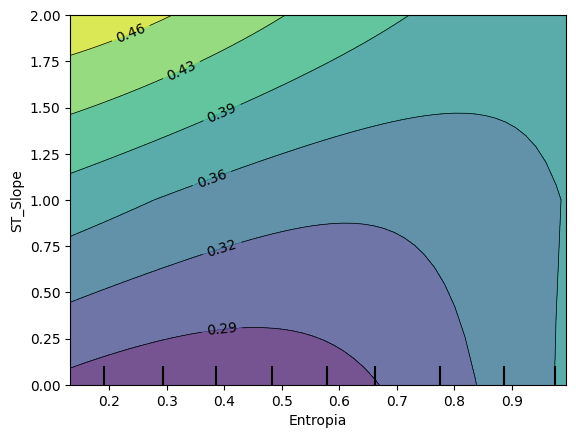

In [169]:
# PDP bi-dimensional para verificar as dependências entre as features Entropia e ST_Slope
disp = PartialDependenceDisplay.from_estimator(ass2_lr, X_entr_lr, [(10, 9)], grid_resolution=50)

#### Assessor 3

In [170]:
# Assessor 3: Treinado apenas com a entropia | Atributo preditor: Erro do modelo

ass3_lr = make_pipeline(StandardScaler(), SVR())
pred_ass3_lr = cross_val_predict(ass3_lr, X_apenas_entr_lr, y_erro_lr, cv = 10)

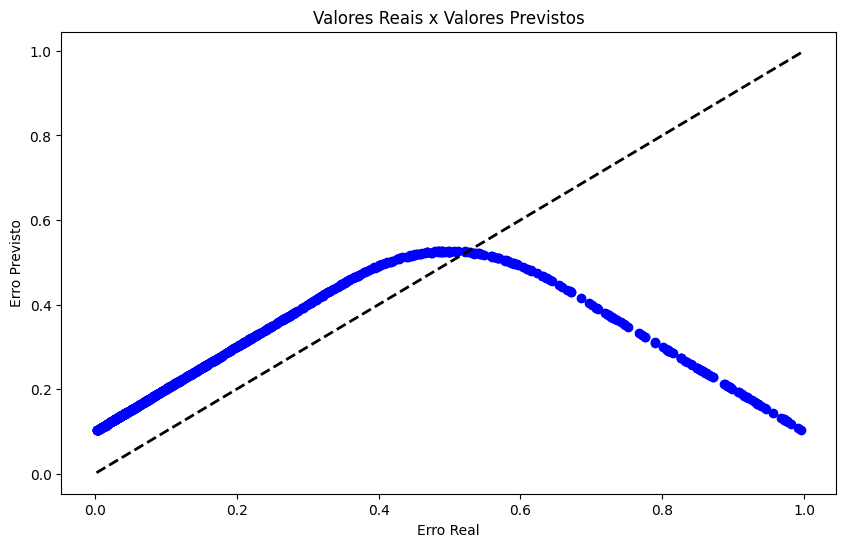

In [171]:
plt.figure(figsize=(10, 6))
plt.scatter(y_erro_lr, pred_ass3_lr, color='blue')
plt.plot([y_erro_lr.min(), y_erro_lr.max()], [y_erro_lr.min(), y_erro_lr.max()], 'k--', lw=2)
plt.xlabel('Erro Real')
plt.ylabel('Erro Previsto')
plt.title('Valores Reais x Valores Previstos')
plt.show()

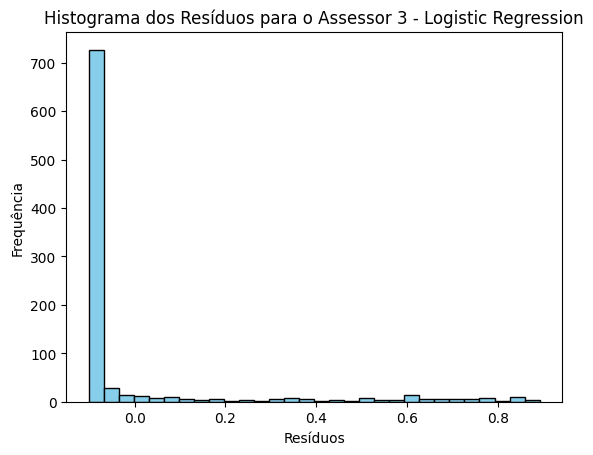

In [172]:
residuals = y_erro_lr - pred_ass3_lr
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos para o Assessor 3 - Logistic Regression')
plt.show()

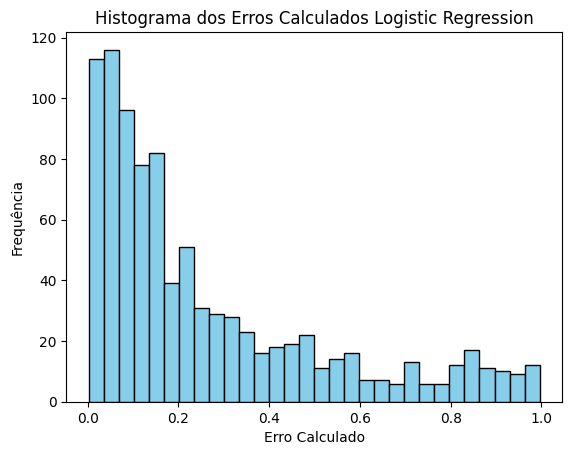

In [173]:
# Histograma dos erros reais da Logistic Regression
plt.hist(y_erro_lr, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro Calculado')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Calculados Logistic Regression')
plt.show()

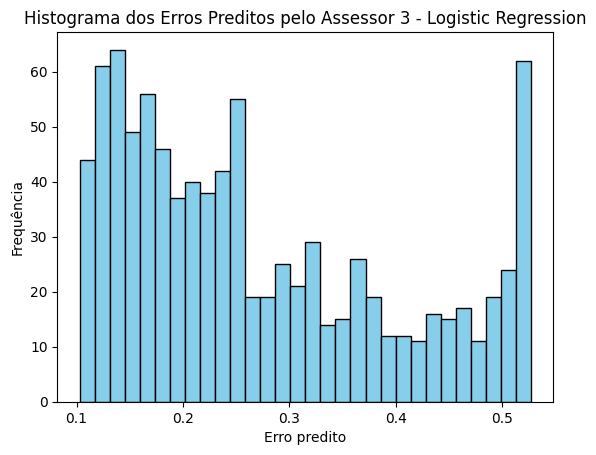

In [174]:
# Histograma dos erros preditos pelo Assessor 3 da Logistic Regression
plt.hist(pred_ass3_lr, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro predito')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Preditos pelo Assessor 3 - Logistic Regression')
plt.show()

In [175]:
# Ajustando os dados (necessário para o StandardScaler, que não funciona sem o fit mesmo que o cross_val_predict já tenha sido utilizado)
ass3_lr.fit(X_apenas_entr_lr, y_erro_lr)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

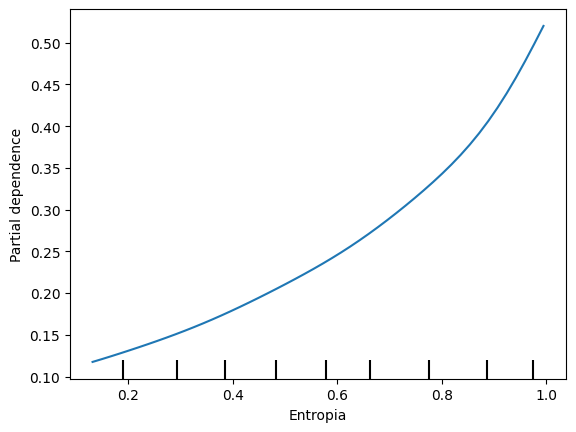

In [176]:
# PDP para a Entropia
disp = PartialDependenceDisplay.from_estimator(ass3_lr, X_apenas_entr_lr, [(0)], grid_resolution=50)

### Performances dos modelos

In [177]:
# Logistic Regression
report_lr = classification_report(y, pred_lr)
print(report_lr)

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       410
           1       0.85      0.84      0.85       508

    accuracy                           0.83       918
   macro avg       0.83      0.83      0.83       918
weighted avg       0.83      0.83      0.83       918



In [178]:
# Assessores
mae_ass1_lr = mean_absolute_error(y_erro_lr, pred_ass1_lr)
print(f'Assessor 1 (sem entropia): {mae_ass1_lr}')

mae_ass2_lr = mean_absolute_error(y_erro_lr, pred_ass2_lr)
print(f'Assessor 2 (com entropia): {mae_ass2_lr}')

mae_ass3_lr = mean_absolute_error(y_erro_lr, pred_ass3_lr)
print(f'Assessor 3 (somente entropia): {mae_ass3_lr}')

Assessor 1 (sem entropia): 0.1416792864202143
Assessor 2 (com entropia): 0.14089167233403924
Assessor 3 (somente entropia): 0.14941822469209634


## SVM Classifier

In [179]:
# Instanciando e treinando o classificador
svm = SVC()
svm = make_pipeline(StandardScaler(), SVC(probability=True))

# Encontrando as probabilidades de certeza sobre as predições do modelo e printando os 5 primeiros exemplos
prob_svm = cross_val_predict(svm, X, y, cv = 10, method = 'predict_proba')
pred_svm = cross_val_predict(svm, X, y, cv = 10)
print(f'Probabilidades (prob_svm):\n{prob_svm[:5]}\n')

prob_svm[prob_svm == 0] = 0.001
prob_svm[prob_svm == 1] = 0.999

# Erro absoluto
erro_svm = filtra_label(prob_svm)
print(f'Erro absoluto (erro_svm):\n{erro_svm[:5]}\n Erro médio: {np.mean(erro_svm)}\n')

# Entropia
entr_svm = -prob_svm * np.log2(prob_svm) - (1 - prob_svm) * np.log2(1 - prob_svm)
print(f'Entropia (entr_svm):\n{entr_svm[:5]}')

Probabilidades (prob_svm):
[[0.92979096 0.07020904]
 [0.77982895 0.22017105]
 [0.82206113 0.17793887]
 [0.19945231 0.80054769]
 [0.93970292 0.06029708]]

Erro absoluto (erro_svm):
[0.07020904 0.77982895 0.17793887 0.19945231 0.06029708]
 Erro médio: 0.2334888278496075

Entropia (entr_svm):
[[0.36670325 0.36670325]
 [0.76047972 0.76047972]
 [0.67554724 0.67554724]
 [0.72083135 0.72083135]
 [0.3286231  0.3286231 ]]


### Assessores: SVM Classifier

In [180]:
# Formatando o erro e a entropia
erro_svm = np.array(erro_svm)

entr_svm = np.array(np.delete(entr_svm, 1, axis=1))
entr_svm = entr_svm.flatten()

print(f'Erro: {erro_svm[:5]}...\n')
print(f'Entropia: {entr_svm[:5]}...\n')

# Dataset com coluna para a entropia média do pool
X_entr_svm = X.copy()
X_entr_svm['Entropia'] = entr_svm

# Atributo preditor: Coluna para o erro médio do pool
y_erro_svm = erro_svm

Erro: [0.07020904 0.77982895 0.17793887 0.19945231 0.06029708]...

Entropia: [0.36670325 0.76047972 0.67554724 0.72083135 0.3286231 ]...



In [181]:
# X utilizado para o treinamento do Assessor 2 (dados + entropia)
X_entr_svm.head()

Age  Sex  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  \
0   40    0        140          289          0           0    172   
1   49    1        160          180          0           0    156   
2   37    0        130          283          0           1     98   
3   48    1        138          214          0           0    108   
4   54    0        150          195          0           0    122   

   ExerciseAngina  Oldpeak  ST_Slope  Entropia  
0               0      0.0         0  0.366703  
1               0      1.0         1  0.760480  
2               0      0.0         0  0.675547  
3               1      1.5         1  0.720831  
4               0      0.0         0  0.328623

In [182]:
# Criando um dataset somente com entropia para o terceiro assessor
X_apenas_entr_svm = X_entr_svm.copy()
X_apenas_entr_svm = X_apenas_entr_svm.drop(columns = ["Age", "Sex", "RestingBP", "Cholesterol", "FastingBS", "RestingECG", "MaxHR", "ExerciseAngina", "Oldpeak", "ST_Slope"])

# X utilizado para o treinamento do Assessor 3 (entropia)
X_apenas_entr_svm.head()

Entropia
0  0.366703
1  0.760480
2  0.675547
3  0.720831
4  0.328623

#### Assessor 1

In [183]:
# Assessor 1: Treinado com dados | Atributo preditor: Erro do modelo

ass1_svm = make_pipeline(StandardScaler(), SVR())
pred_ass1_svm = cross_val_predict(ass1_svm, full_X, y_erro_svm, cv = 10)

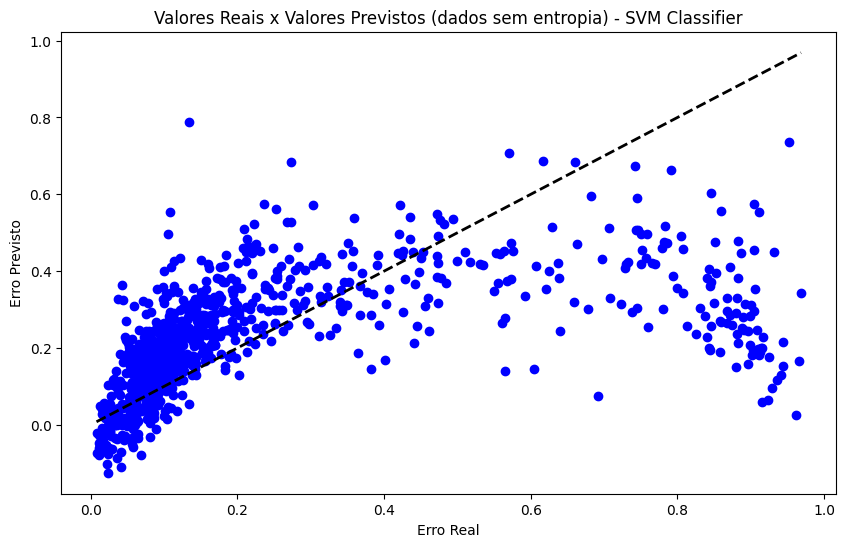

In [184]:
plt.figure(figsize=(10, 6))
plt.scatter(y_erro_svm, pred_ass1_svm, color='blue')
plt.plot([y_erro_svm.min(), y_erro_svm.max()], [y_erro_svm.min(), y_erro_svm.max()], 'k--', lw=2)
plt.xlabel('Erro Real')
plt.ylabel('Erro Previsto')
plt.title('Valores Reais x Valores Previstos (dados sem entropia) - SVM Classifier')
plt.show()

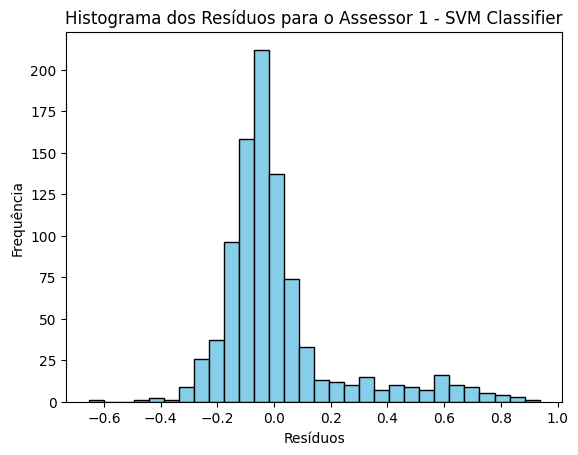

In [185]:
residuals = y_erro_svm - pred_ass1_svm
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos para o Assessor 1 - SVM Classifier')
plt.show()

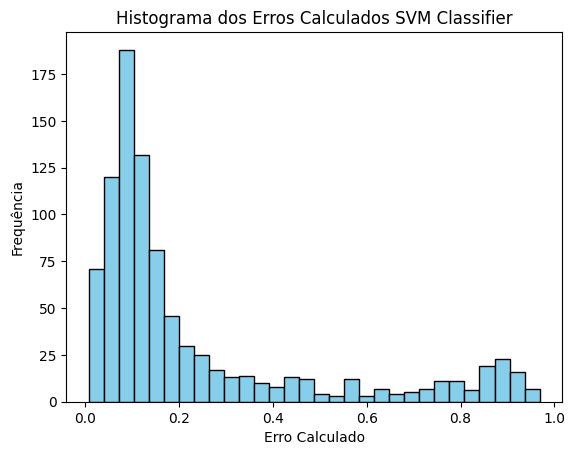

In [186]:
# Histograma dos erros reais do SVM Classifier
plt.hist(y_erro_svm, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro Calculado')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Calculados SVM Classifier')
plt.show()

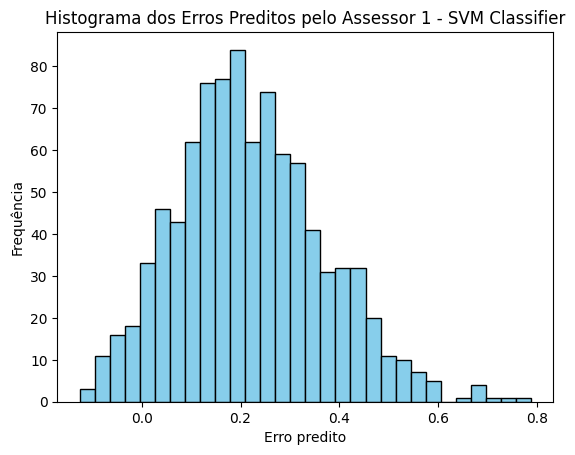

In [187]:
# Histograma dos erros preditos pelo Assessor 1 do SVM Classifier
plt.hist(pred_ass1_svm, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro predito')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Preditos pelo Assessor 1 - SVM Classifier')
plt.show()

In [188]:
# Ajustando os dados (necessário para o StandardScaler, que não funciona sem o fit mesmo que o cross_val_predict já tenha sido utilizado)
ass1_svm.fit(full_X, y_erro_svm)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

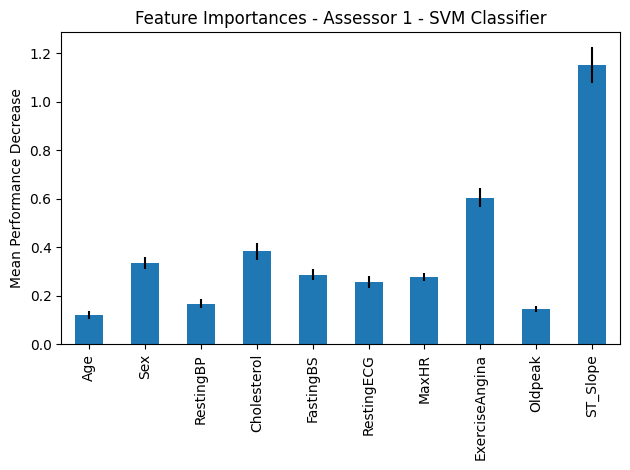

In [189]:
# Feature importances
result = permutation_importance(ass1_svm, full_X, pred_ass1_svm, n_repeats=30, random_state=0)
forest_importances = pd.Series(result.importances_mean, index=full_X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature Importances - Assessor 1 - SVM Classifier")
ax.set_ylabel("Mean Performance Decrease")

fig.tight_layout()
plt.show()

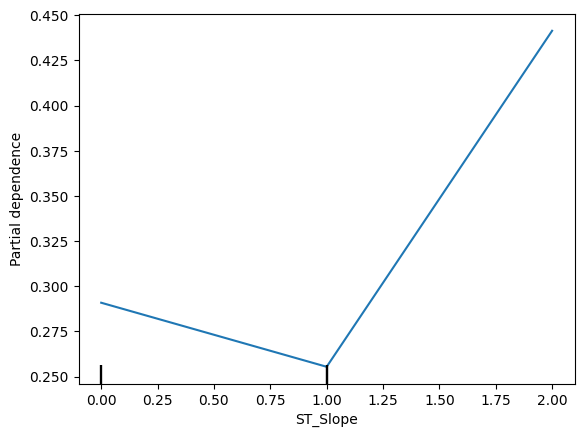

In [190]:
# PDP para o ST_Slope
disp = PartialDependenceDisplay.from_estimator(ass1_svm, full_X, [(9)], grid_resolution=50)

#### Assessor 2

In [191]:
# Assessor 2: Treinado com dados + entropia | Atributo preditor: Erro do modelo

ass2_svm = make_pipeline(StandardScaler(), SVR())
pred_ass2_svm = cross_val_predict(ass2_svm, X_entr_svm, y_erro_svm, cv = 10)

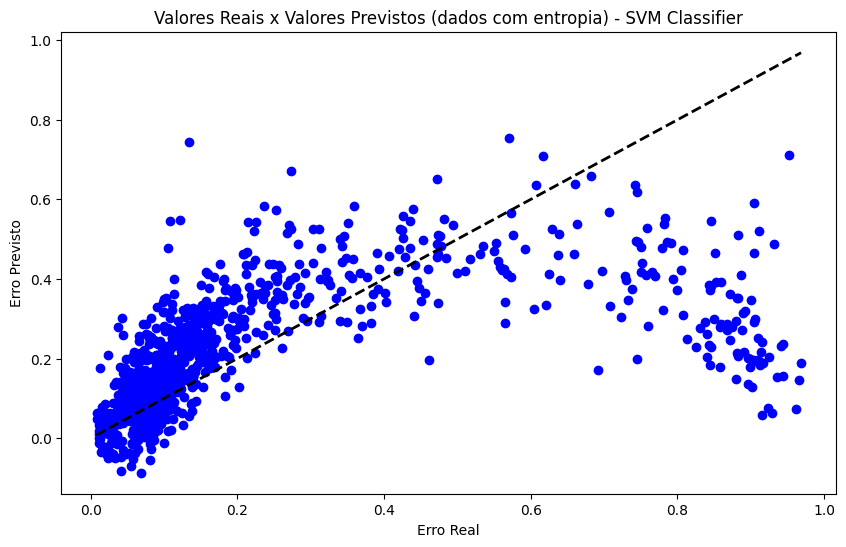

In [192]:
plt.figure(figsize=(10, 6))
plt.scatter(y_erro_svm, pred_ass2_svm, color='blue')
plt.plot([y_erro_svm.min(), y_erro_svm.max()], [y_erro_svm.min(), y_erro_svm.max()], 'k--', lw=2)
plt.xlabel('Erro Real')
plt.ylabel('Erro Previsto')
plt.title('Valores Reais x Valores Previstos (dados com entropia) - SVM Classifier')
plt.show()

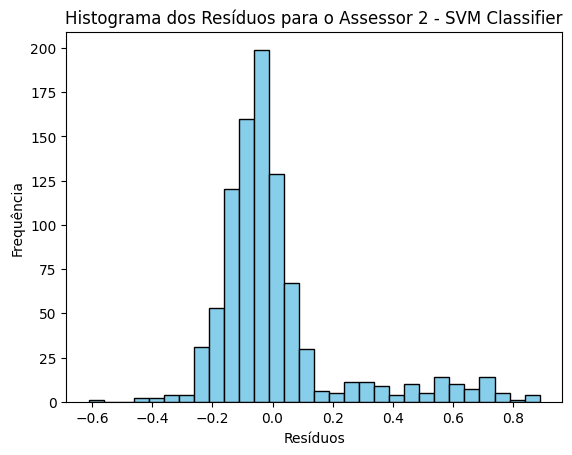

In [193]:
residuals = y_erro_svm - pred_ass2_svm
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos para o Assessor 2 - SVM Classifier')
plt.show()

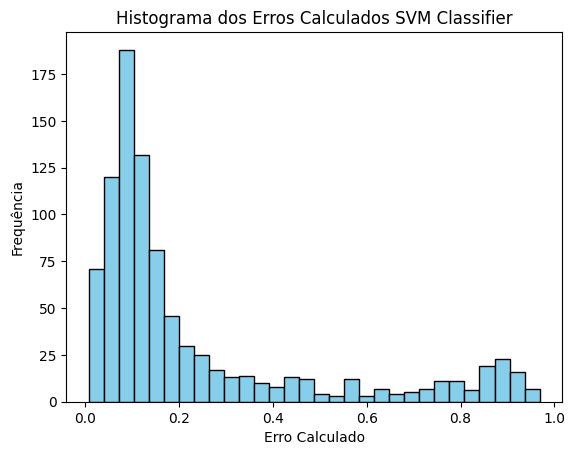

In [194]:
# Histograma dos erros reais do SVM Classifier
plt.hist(y_erro_svm, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro Calculado')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Calculados SVM Classifier')
plt.show()

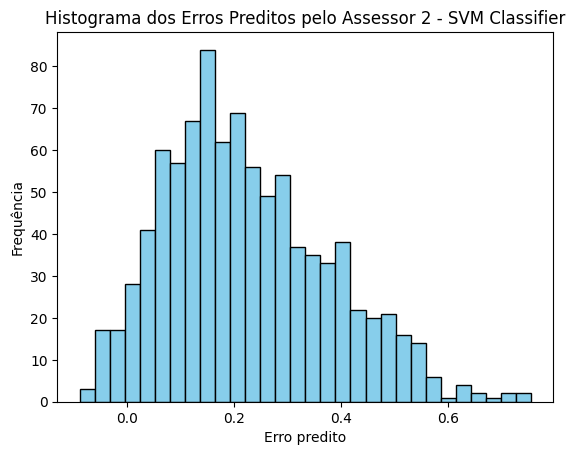

In [195]:
# Histograma dos erros preditos pelo Assessor 2 do SVM Classifier
plt.hist(pred_ass2_svm, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro predito')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Preditos pelo Assessor 2 - SVM Classifier')
plt.show()

In [196]:
# Ajustando os dados (necessário para o StandardScaler, que não funciona sem o fit mesmo que o cross_val_predict já tenha sido utilizado)
ass2_svm.fit(X_entr_svm, y_erro_svm)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

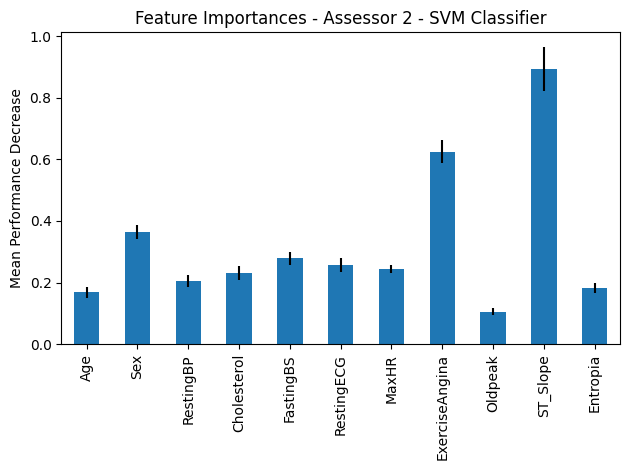

In [197]:
# Feature importances
result = permutation_importance(ass2_svm, X_entr_svm, pred_ass2_svm, n_repeats=30, random_state=0)
forest_importances = pd.Series(result.importances_mean, index=X_entr_svm.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature Importances - Assessor 2 - SVM Classifier")
ax.set_ylabel("Mean Performance Decrease")

fig.tight_layout()
plt.show()

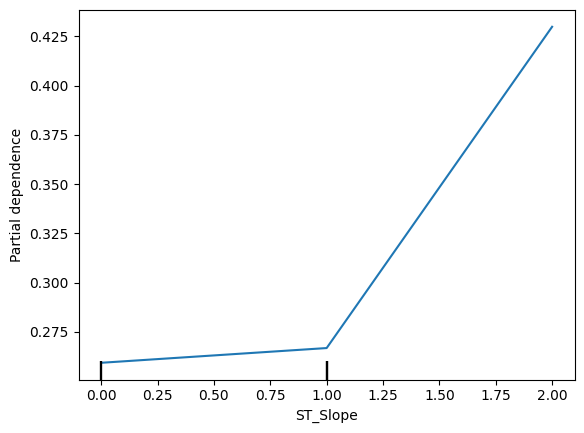

In [198]:
# PDP para o ST_Slope
disp = PartialDependenceDisplay.from_estimator(ass2_svm, X_entr_svm, [(9)], grid_resolution=50)

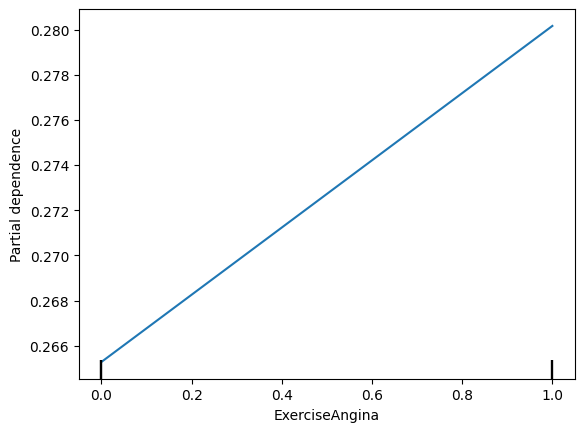

In [199]:
# PDP para a ExerciseAngina
disp = PartialDependenceDisplay.from_estimator(ass2_svm, X_entr_svm, [(7)], grid_resolution=50)

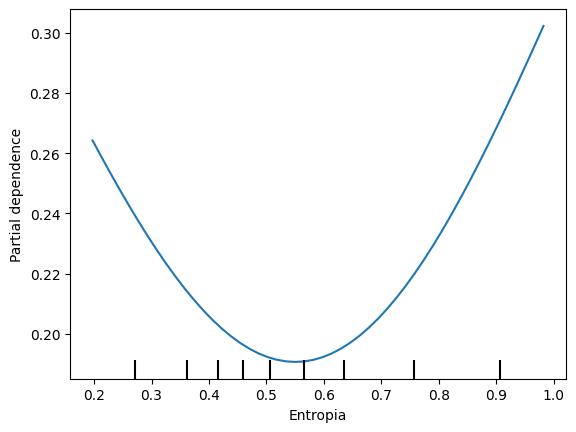

In [200]:
# PDP para a Entropia
disp = PartialDependenceDisplay.from_estimator(ass2_svm, X_entr_svm, [(10)], grid_resolution=50)

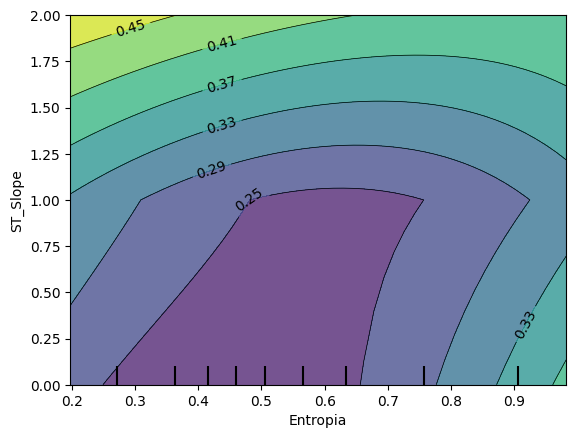

In [201]:
# PDP bi-dimensional para verificar as dependências entre as features Entropia e ST_Slope
disp = PartialDependenceDisplay.from_estimator(ass2_svm, X_entr_svm, [(10, 9)], grid_resolution=50)

#### Assessor 3

In [202]:
# Assessor 3: Treinado apenas com a entropia | Atributo preditor: Erro do modelo

ass3_svm = make_pipeline(StandardScaler(), SVR())
pred_ass3_svm = cross_val_predict(ass3_svm, X_apenas_entr_svm, y_erro_svm, cv = 10)

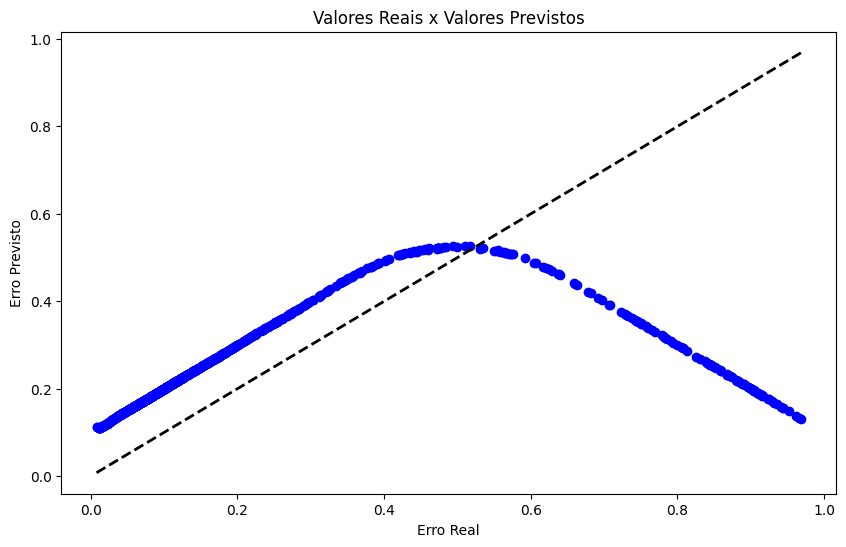

In [203]:
plt.figure(figsize=(10, 6))
plt.scatter(y_erro_svm, pred_ass3_svm, color='blue')
plt.plot([y_erro_svm.min(), y_erro_svm.max()], [y_erro_svm.min(), y_erro_svm.max()], 'k--', lw=2)
plt.xlabel('Erro Real')
plt.ylabel('Erro Previsto')
plt.title('Valores Reais x Valores Previstos')
plt.show()

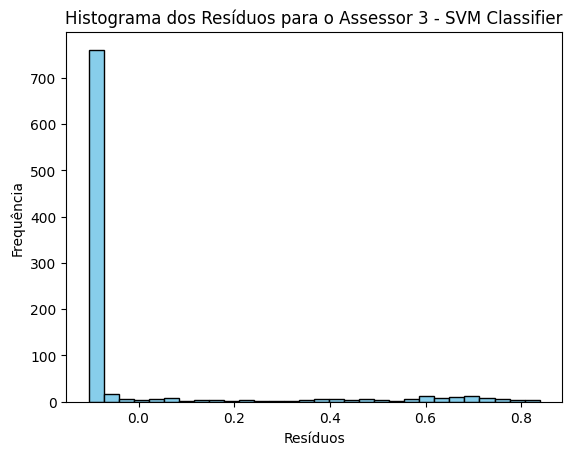

In [204]:
residuals = y_erro_svm - pred_ass3_svm
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos para o Assessor 3 - SVM Classifier')
plt.show()

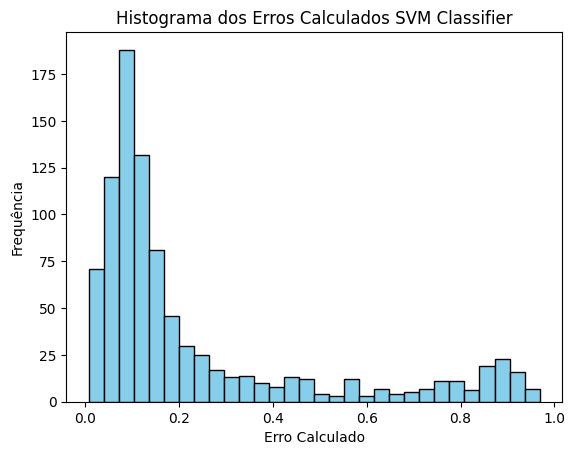

In [205]:
# Histograma dos erros reais do SVM Classifier
plt.hist(y_erro_svm, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro Calculado')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Calculados SVM Classifier')
plt.show()

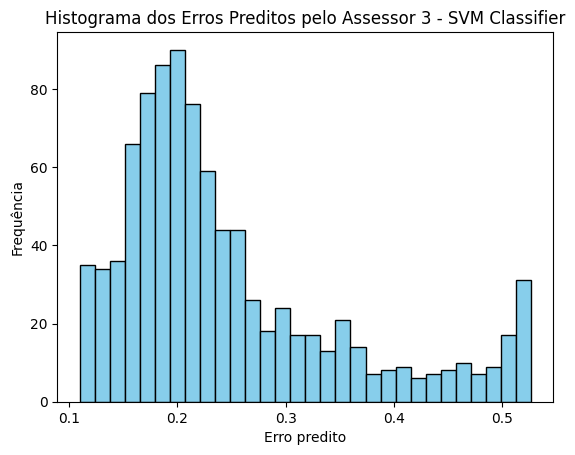

In [206]:
# Histograma dos erros preditos pelo Assessor 3 do SVM Classifier
plt.hist(pred_ass3_svm, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro predito')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Preditos pelo Assessor 3 - SVM Classifier')
plt.show()

In [207]:
# Ajustando os dados (necessário para o StandardScaler, que não funciona sem o fit mesmo que o cross_val_predict já tenha sido utilizado)
ass3_svm.fit(X_apenas_entr_svm, y_erro_svm)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

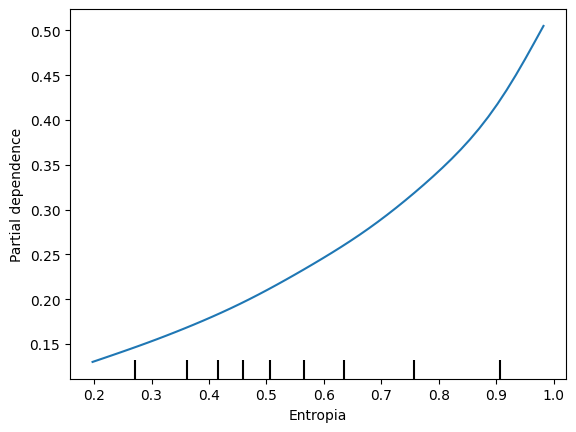

In [208]:
# PDP para a Entropia
disp = PartialDependenceDisplay.from_estimator(ass3_svm, X_apenas_entr_svm, [(0)], grid_resolution=50)

### Performances dos modelos

In [209]:
# Support Vector Classifier (default kernel - rbf)
report_svm = classification_report(y, pred_svm)
print(report_svm)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       410
           1       0.86      0.87      0.87       508

    accuracy                           0.85       918
   macro avg       0.85      0.85      0.85       918
weighted avg       0.85      0.85      0.85       918



In [210]:
# Assessores
mae_ass1_svm = mean_absolute_error(y_erro_svm, pred_ass1_svm)
print(f'Assessor 1 (dados sem entropia): {mae_ass1_svm}')

mae_ass2_svm = mean_absolute_error(y_erro_svm, pred_ass2_svm)
print(f'Assessor 2 (dados com entropia): {mae_ass2_svm}')

mae_ass3_svm = mean_absolute_error(y_erro_svm, pred_ass3_svm)
print(f'Assessor 3 (somente entropia): {mae_ass3_svm}')

Assessor 1 (dados sem entropia): 0.13990768948687168
Assessor 2 (dados com entropia): 0.1364092406524533
Assessor 3 (somente entropia): 0.1545387401015424


## MLP Classifier

In [211]:
# Instanciando e treinando o classificador
mlp = MLPClassifier()

# Encontrando as probabilidades de certeza sobre as predições do modelo e printando os 5 primeiros exemplos
prob_mlp = cross_val_predict(mlp, X, y, cv = 10, method = 'predict_proba')
pred_mlp = cross_val_predict(mlp, X, y, cv = 10)
print(f'Probabilidades (prob_mlp):\n{prob_mlp[:5]}\n')

prob_mlp[prob_mlp == 0] = 0.001
prob_mlp[prob_mlp == 1] = 0.999

# Erro absoluto
erro_mlp = filtra_label(prob_mlp)
print(f'Erro absoluto (erro_mlp):\n{erro_mlp[:5]}\n Erro médio: {np.mean(erro_mlp)}\n')

# Entropia
entr_mlp = -prob_mlp * np.log2(prob_mlp) - (1 - prob_mlp) * np.log2(1 - prob_mlp)
print(f'Entropia (entr_mlp):\n{entr_mlp[:5]}')

Probabilidades (prob_mlp):
[[0.9583083  0.0416917 ]
 [0.9310813  0.0689187 ]
 [0.54210283 0.45789717]
 [0.43468759 0.56531241]
 [0.87225154 0.12774846]]

Erro absoluto (erro_mlp):
[0.0416917  0.9310813  0.45789717 0.43468759 0.12774846]
 Erro médio: 0.25335792552602304

Entropia (entr_mlp):
[[0.2499955  0.2499955 ]
 [0.36187542 0.36187542]
 [0.99487916 0.99487916]
 [0.98765652 0.98765652]
 [0.55123083 0.55123083]]


### Assessores: MLP Classifier

In [212]:
# Formatando o erro e a entropia
erro_mlp = np.array(erro_mlp)

entr_mlp = np.array(np.delete(entr_mlp, 1, axis=1))
entr_mlp = entr_mlp.flatten()

print(f'Erro: {erro_mlp[:5]}...\n')
print(f'Entropia: {entr_mlp[:5]}...\n')

# Dataset com coluna para a entropia média do pool
X_entr_mlp = X.copy()
X_entr_mlp['Entropia'] = entr_mlp

# Atributo preditor: Coluna para o erro médio do pool
y_erro_mlp = erro_mlp

Erro: [0.0416917  0.9310813  0.45789717 0.43468759 0.12774846]...

Entropia: [0.2499955  0.36187542 0.99487916 0.98765652 0.55123083]...



In [213]:
# X utilizado para o treinamento do Assessor 2 (dados + entropia)
X_entr_mlp.head()

Age  Sex  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  \
0   40    0        140          289          0           0    172   
1   49    1        160          180          0           0    156   
2   37    0        130          283          0           1     98   
3   48    1        138          214          0           0    108   
4   54    0        150          195          0           0    122   

   ExerciseAngina  Oldpeak  ST_Slope  Entropia  
0               0      0.0         0  0.249995  
1               0      1.0         1  0.361875  
2               0      0.0         0  0.994879  
3               1      1.5         1  0.987657  
4               0      0.0         0  0.551231

In [214]:
# Criando um dataset somente com entropia para o terceiro assessor
X_apenas_entr_mlp = X_entr_svm.copy()
X_apenas_entr_mlp = X_apenas_entr_mlp.drop(columns = ["Age", "Sex", "RestingBP", "Cholesterol", "FastingBS", "RestingECG", "MaxHR", "ExerciseAngina", "Oldpeak", "ST_Slope"])

# X utilizado para o treinamento do Assessor 3 (entropia)
X_apenas_entr_mlp.head()

Entropia
0  0.366703
1  0.760480
2  0.675547
3  0.720831
4  0.328623

#### Assessor 1

In [215]:
# Assessor 1: Treinado com dados | Atributo preditor: Erro do modelo

ass1_mlp = make_pipeline(StandardScaler(), SVR())
pred_ass1_mlp = cross_val_predict(ass1_mlp, full_X, y_erro_mlp, cv = 10)

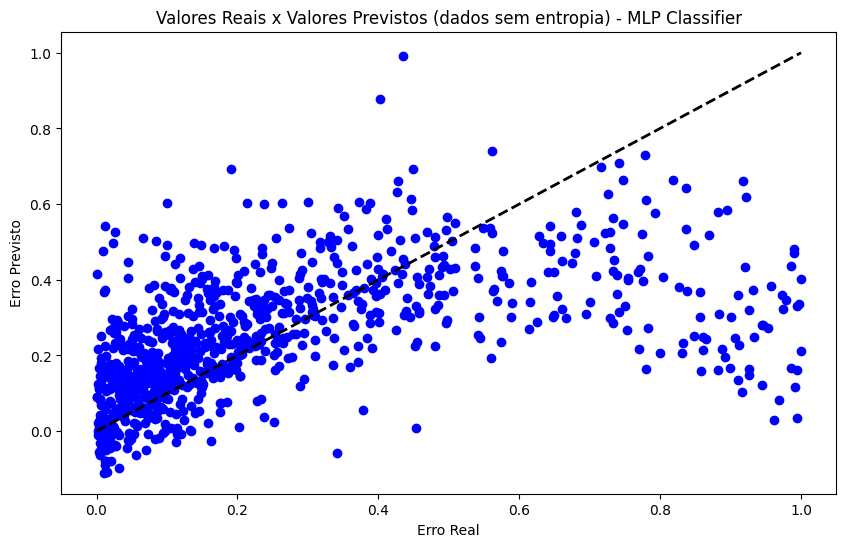

In [216]:
plt.figure(figsize=(10, 6))
plt.scatter(y_erro_mlp, pred_ass1_mlp, color='blue')
plt.plot([y_erro_mlp.min(), y_erro_mlp.max()], [y_erro_mlp.min(), y_erro_mlp.max()], 'k--', lw=2)
plt.xlabel('Erro Real')
plt.ylabel('Erro Previsto')
plt.title('Valores Reais x Valores Previstos (dados sem entropia) - MLP Classifier')
plt.show()

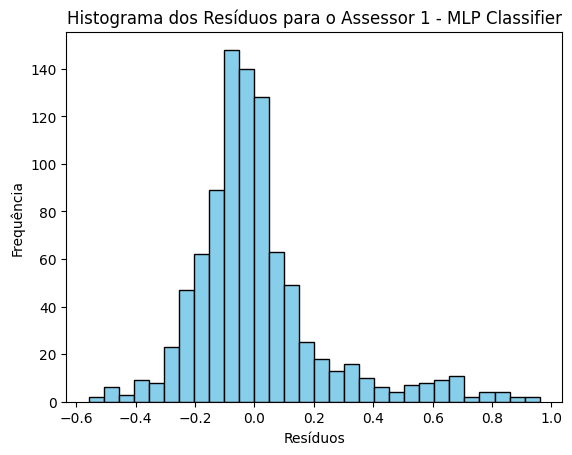

In [217]:
residuals = y_erro_mlp - pred_ass1_mlp
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos para o Assessor 1 - MLP Classifier')
plt.show()

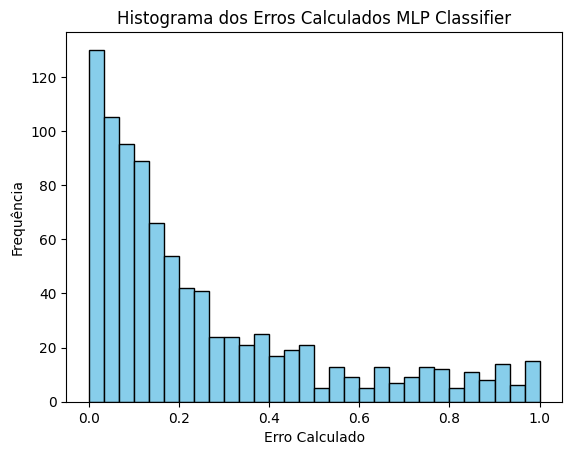

In [218]:
# Histograma dos erros reais do MLP Classifier
plt.hist(y_erro_mlp, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro Calculado')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Calculados MLP Classifier')
plt.show()

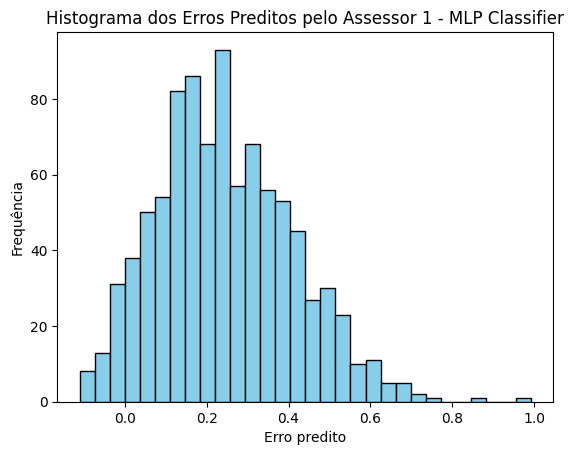

In [219]:
# Histograma dos erros preditos pelo Assessor 1 do MLP Classifier
plt.hist(pred_ass1_mlp, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro predito')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Preditos pelo Assessor 1 - MLP Classifier')
plt.show()

In [220]:
# Ajustando os dados (necessário para o StandardScaler, que não funciona sem o fit mesmo que o cross_val_predict já tenha sido utilizado)
ass1_mlp.fit(full_X, y_erro_mlp)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

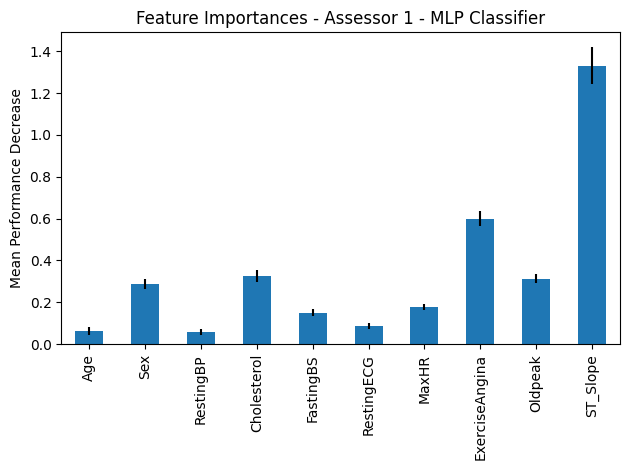

In [221]:
# Feature importances
result = permutation_importance(ass1_mlp, full_X, pred_ass1_mlp, n_repeats=30, random_state=0)
forest_importances = pd.Series(result.importances_mean, index=full_X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature Importances - Assessor 1 - MLP Classifier")
ax.set_ylabel("Mean Performance Decrease")

fig.tight_layout()
plt.show()

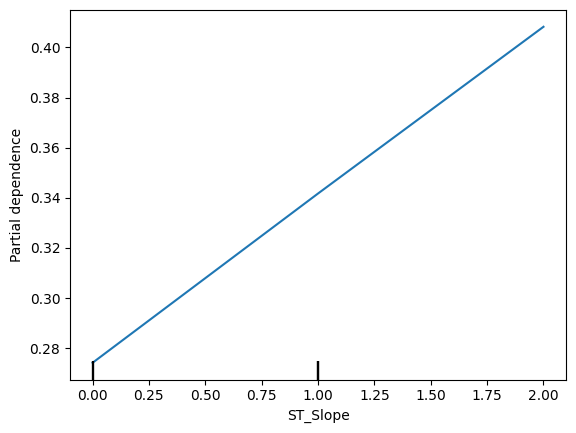

In [222]:
# PDP para o ST_Slope
disp = PartialDependenceDisplay.from_estimator(ass1_mlp, full_X, [(9)], grid_resolution=50)

#### Assessor 2

In [223]:
# Assessor 2: Treinado com dados + entropia | Atributo preditor: Erro do modelo

ass2_mlp = make_pipeline(StandardScaler(), SVR())
pred_ass2_mlp = cross_val_predict(ass2_mlp, X_entr_mlp, y_erro_mlp, cv = 10)

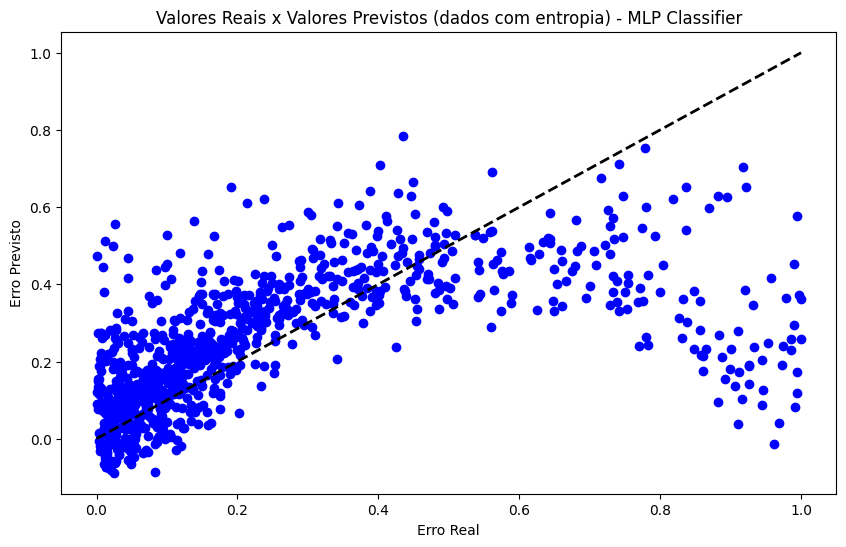

In [224]:
plt.figure(figsize=(10, 6))
plt.scatter(y_erro_mlp, pred_ass2_mlp, color='blue')
plt.plot([y_erro_mlp.min(), y_erro_mlp.max()], [y_erro_mlp.min(), y_erro_mlp.max()], 'k--', lw=2)
plt.xlabel('Erro Real')
plt.ylabel('Erro Previsto')
plt.title('Valores Reais x Valores Previstos (dados com entropia) - MLP Classifier')
plt.show()

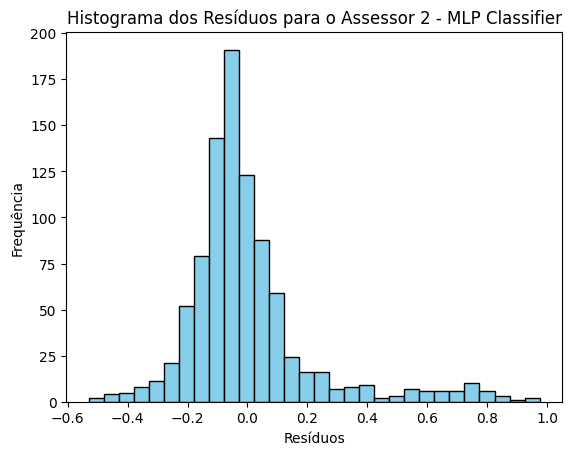

In [225]:
residuals = y_erro_mlp - pred_ass2_mlp
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos para o Assessor 2 - MLP Classifier')
plt.show()

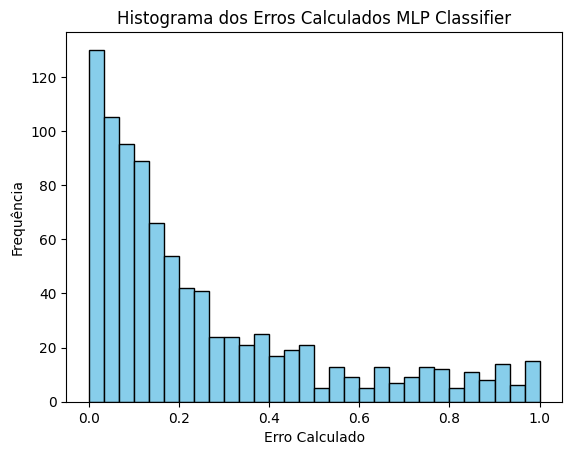

In [226]:
# Histograma dos erros reais do MLP Classifier
plt.hist(y_erro_mlp, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro Calculado')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Calculados MLP Classifier')
plt.show()

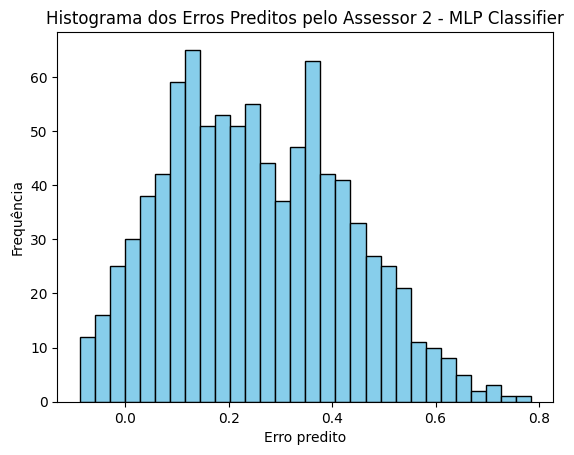

In [227]:
# Histograma dos erros preditos pelo Assessor 2 do MLP Classifier
plt.hist(pred_ass2_mlp, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro predito')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Preditos pelo Assessor 2 - MLP Classifier')
plt.show()

In [228]:
# Ajustando os dados (necessário para o StandardScaler, que não funciona sem o fit mesmo que o cross_val_predict já tenha sido utilizado)
ass2_mlp.fit(X_entr_mlp, y_erro_mlp)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

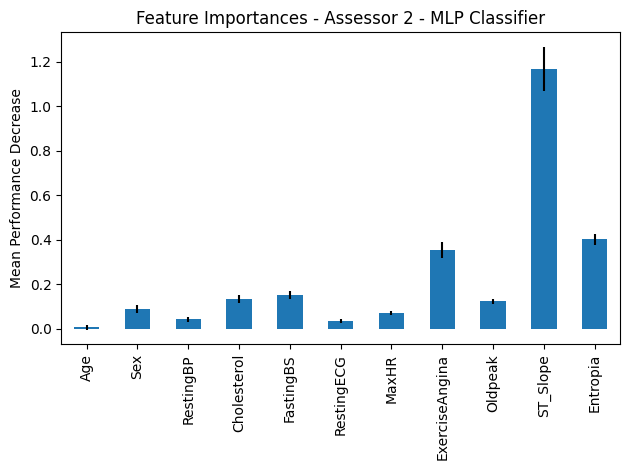

In [229]:
# Feature importances
result = permutation_importance(ass2_mlp, X_entr_mlp, pred_ass2_mlp, n_repeats=30, random_state=0)
forest_importances = pd.Series(result.importances_mean, index=X_entr_mlp.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature Importances - Assessor 2 - MLP Classifier")
ax.set_ylabel("Mean Performance Decrease")

fig.tight_layout()
plt.show()

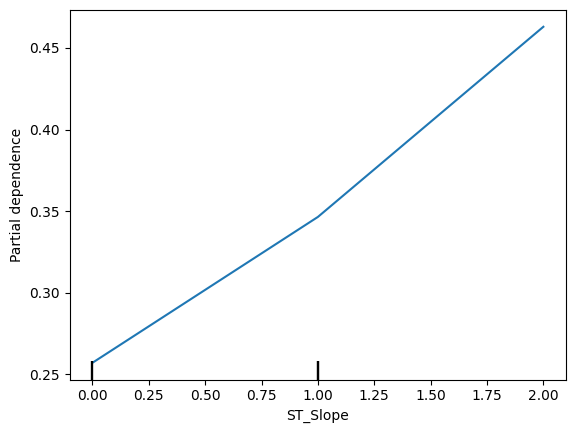

In [230]:
# PDP para o ST_Slope
disp = PartialDependenceDisplay.from_estimator(ass2_mlp, X_entr_mlp, [(9)], grid_resolution=50)

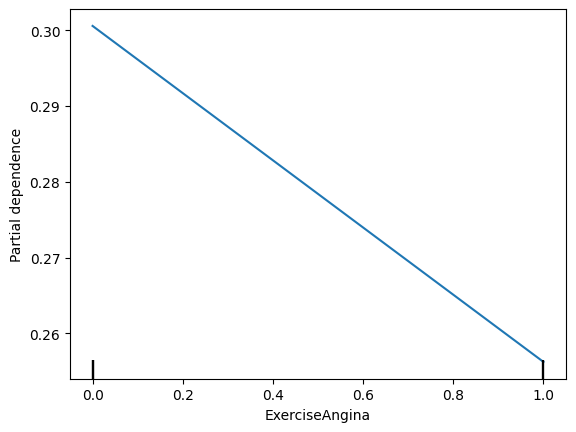

In [231]:
# PDP para a ExerciseAngina
disp = PartialDependenceDisplay.from_estimator(ass2_mlp, X_entr_mlp, [(7)], grid_resolution=50)

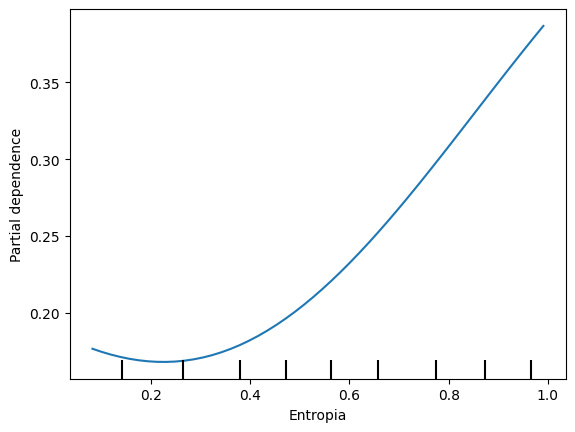

In [232]:
# PDP para a Entropia
disp = PartialDependenceDisplay.from_estimator(ass2_mlp, X_entr_mlp, [(10)], grid_resolution=50)

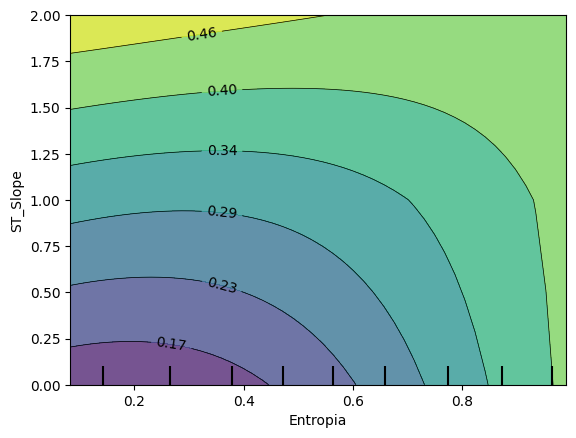

In [233]:
# PDP bi-dimensional para verificar as dependências entre as features Entropia e ST_Slope
disp = PartialDependenceDisplay.from_estimator(ass2_mlp, X_entr_mlp, [(10, 9)], grid_resolution=50)

#### Assessor 3

In [234]:
# Assessor 3: Treinado apenas com a entropia | Atributo preditor: Erro do modelo

ass3_mlp = make_pipeline(StandardScaler(), SVR())
pred_ass3_mlp = cross_val_predict(ass3_mlp, X_apenas_entr_mlp, y_erro_mlp, cv = 10)

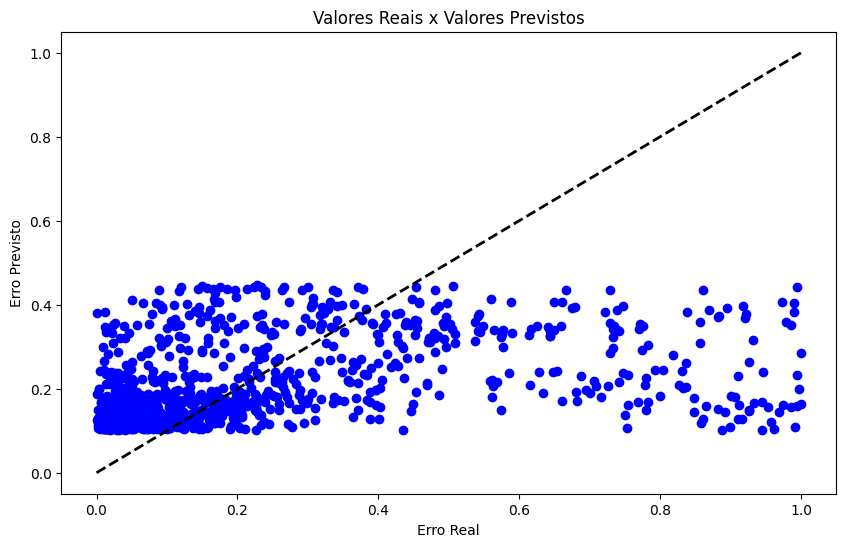

In [235]:
plt.figure(figsize=(10, 6))
plt.scatter(y_erro_mlp, pred_ass3_mlp, color='blue')
plt.plot([y_erro_mlp.min(), y_erro_mlp.max()], [y_erro_mlp.min(), y_erro_mlp.max()], 'k--', lw=2)
plt.xlabel('Erro Real')
plt.ylabel('Erro Previsto')
plt.title('Valores Reais x Valores Previstos')
plt.show()

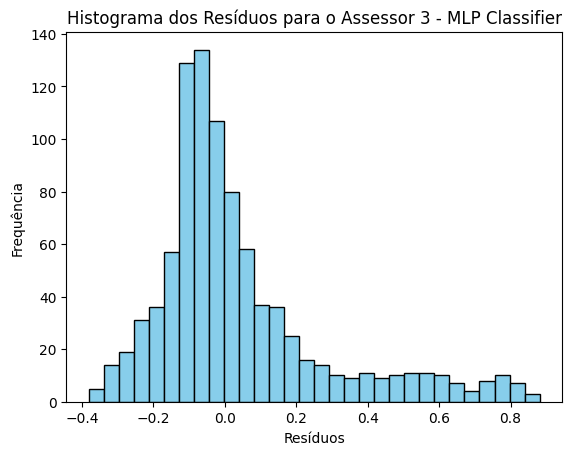

In [236]:
residuals = y_erro_mlp - pred_ass3_mlp
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos para o Assessor 3 - MLP Classifier')
plt.show()

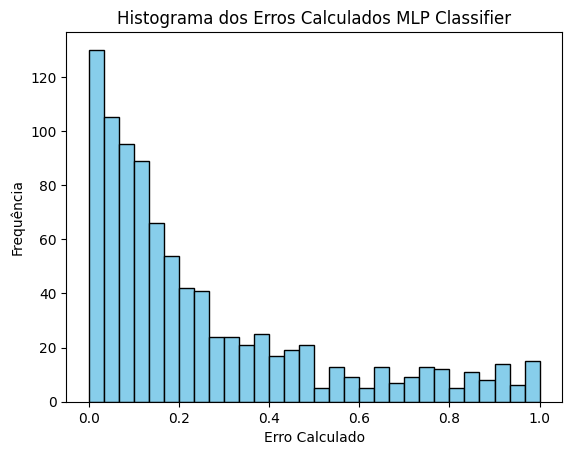

In [237]:
# Histograma dos erros reais do MLP Classifier
plt.hist(y_erro_mlp, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro Calculado')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Calculados MLP Classifier')
plt.show()

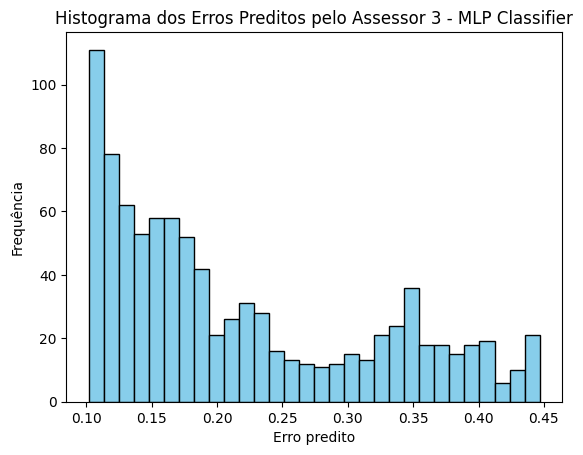

In [238]:
# Histograma dos erros preditos pelo Assessor 3 do MLP Classifier
plt.hist(pred_ass3_mlp, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro predito')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Preditos pelo Assessor 3 - MLP Classifier')
plt.show()

In [239]:
# Ajustando os dados (necessário para o StandardScaler, que não funciona sem o fit mesmo que o cross_val_predict já tenha sido utilizado)
ass3_mlp.fit(X_apenas_entr_mlp, y_erro_mlp)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

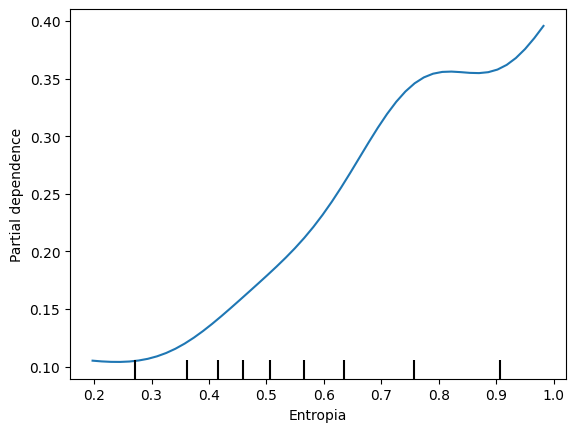

In [240]:
# PDP para a Entropia
disp = PartialDependenceDisplay.from_estimator(ass3_mlp, X_apenas_entr_mlp, [(0)], grid_resolution=50)

### Performances dos modelos

In [241]:
# MLP
report_mlp = classification_report(y, pred_mlp)
print(report_mlp)

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       410
           1       0.85      0.81      0.83       508

    accuracy                           0.82       918
   macro avg       0.82      0.82      0.82       918
weighted avg       0.82      0.82      0.82       918



In [242]:
# Assessores
mae_ass1_mlp = mean_absolute_error(y_erro_mlp, pred_ass1_mlp)
print(f'Assessor 1 (sem entropia): {mae_ass1_mlp}')

mae_ass2_mlp = mean_absolute_error(y_erro_mlp, pred_ass2_mlp)
print(f'Assessor 2 (com entropia): {mae_ass2_mlp}')

mae_ass3_mlp = mean_absolute_error(y_erro_mlp, pred_ass3_mlp)
print(f'Assessor 3 (somente entropia): {mae_ass3_mlp}')

Assessor 1 (sem entropia): 0.1487560494298731
Assessor 2 (com entropia): 0.1417146622446607
Assessor 3 (somente entropia): 0.16513749439841918


## XG Boost

In [243]:
# Instanciando e treinando o classificador
xgb = XGBClassifier()

# Encontrando as probabilidades de certeza sobre as predições do modelo e printando os 5 primeiros exemplos
prob_xgb = cross_val_predict(xgb, X, y, cv = 10, method = 'predict_proba')
pred_xgb = cross_val_predict(xgb, X, y, cv = 10)
print(f'Probabilidades (prob_xgb):\n{prob_xgb[:5]}\n')

prob_xgb[prob_xgb == 0] = 0.001
prob_xgb[prob_xgb == 1] = 0.999

# Erro absoluto
erro_xgb = filtra_label(prob_xgb)
print(f'Erro absoluto (erro_xgb):\n{erro_xgb[:5]}\n Erro médio: {np.mean(erro_xgb)}\n')

# Entropia
entr_xgb = -prob_xgb * np.log2(prob_xgb) - (1 - prob_xgb) * np.log2(1 - prob_xgb)
print(f'Entropia (entr_xgb):\n{entr_xgb[:5]}')

Probabilidades (prob_xgb):
[[9.9887633e-01 1.1236587e-03]
 [9.0476042e-01 9.5239602e-02]
 [9.9881059e-01 1.1893916e-03]
 [5.6690586e-01 4.3309417e-01]
 [9.9929631e-01 7.0367835e-04]]

Erro absoluto (erro_xgb):
[1.12365873e-03 9.04760398e-01 1.18939159e-03 5.66905826e-01
 7.03678350e-04]
 Erro médio: 0.1945846107714487

Entropia (entr_xgb):
[[0.0126294  0.01262933]
 [0.45372117 0.4537212 ]
 [0.0132707  0.01327054]
 [0.98704505 0.98704505]
 [0.00838446 0.00838434]]


### Assessores: XG Boost

In [244]:
# Formatando o erro e a entropia
erro_xgb = np.array(erro_xgb)

entr_xgb = np.array(np.delete(entr_xgb, 1, axis=1))
entr_xgb = entr_xgb.flatten()

print(f'Erro: {erro_xgb[:5]}...\n')
print(f'Entropia: {entr_xgb[:5]}...\n')

# Dataset com coluna para a entropia média do pool
X_entr_xgb = X.copy()
X_entr_xgb['Entropia'] = entr_xgb

# Atributo preditor: Coluna para o erro médio do pool
y_erro_xgb = erro_xgb

Erro: [1.12365873e-03 9.04760398e-01 1.18939159e-03 5.66905826e-01
 7.03678350e-04]...

Entropia: [0.0126294  0.45372117 0.0132707  0.98704505 0.00838446]...



In [245]:
# X utilizado para o treinamento do Assessor 2 (dados + entropia)
X_entr_xgb.head()

Age  Sex  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  \
0   40    0        140          289          0           0    172   
1   49    1        160          180          0           0    156   
2   37    0        130          283          0           1     98   
3   48    1        138          214          0           0    108   
4   54    0        150          195          0           0    122   

   ExerciseAngina  Oldpeak  ST_Slope  Entropia  
0               0      0.0         0  0.012629  
1               0      1.0         1  0.453721  
2               0      0.0         0  0.013271  
3               1      1.5         1  0.987045  
4               0      0.0         0  0.008384

In [246]:
# Criando um dataset somente com entropia para o terceiro assessor
X_apenas_entr_xgb = X_entr_svm.copy()
X_apenas_entr_xgb = X_apenas_entr_xgb.drop(columns = ["Age", "Sex", "RestingBP", "Cholesterol", "FastingBS", "RestingECG", "MaxHR", "ExerciseAngina", "Oldpeak", "ST_Slope"])

# X utilizado para o treinamento do Assessor 3 (entropia)
X_apenas_entr_xgb.head()

Entropia
0  0.366703
1  0.760480
2  0.675547
3  0.720831
4  0.328623

#### Assessor 1

In [247]:
# Assessor 1: Treinado com dados | Atributo preditor: Erro do modelo

ass1_xgb = make_pipeline(StandardScaler(), SVR())
pred_ass1_xgb = cross_val_predict(ass1_xgb, full_X, y_erro_xgb, cv = 10)

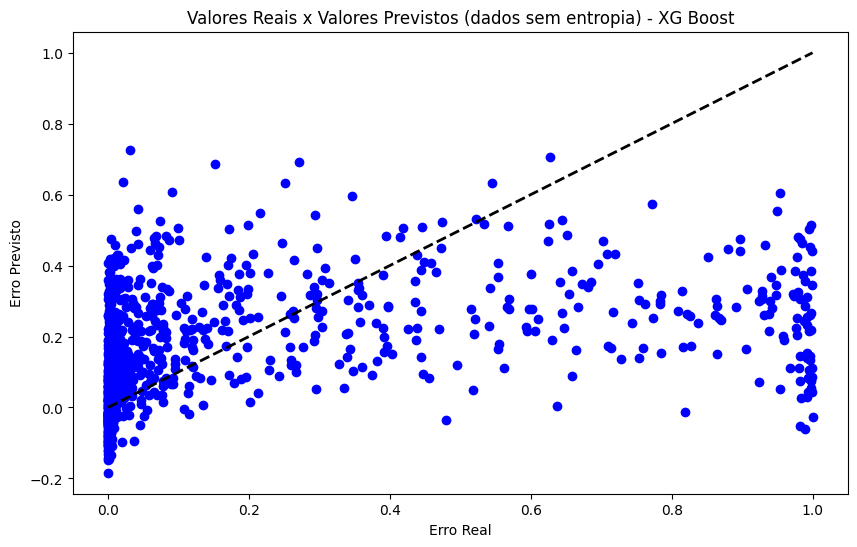

In [248]:
plt.figure(figsize=(10, 6))
plt.scatter(y_erro_xgb, pred_ass1_xgb, color='blue')
plt.plot([y_erro_xgb.min(), y_erro_xgb.max()], [y_erro_xgb.min(), y_erro_xgb.max()], 'k--', lw=2)
plt.xlabel('Erro Real')
plt.ylabel('Erro Previsto')
plt.title('Valores Reais x Valores Previstos (dados sem entropia) - XG Boost')
plt.show()

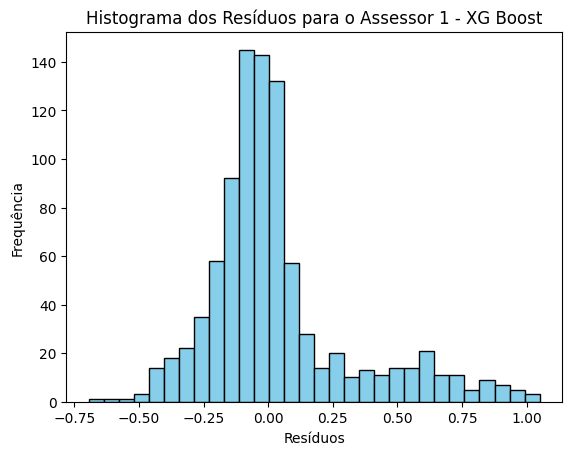

In [249]:
residuals = y_erro_xgb - pred_ass1_xgb
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos para o Assessor 1 - XG Boost')
plt.show()

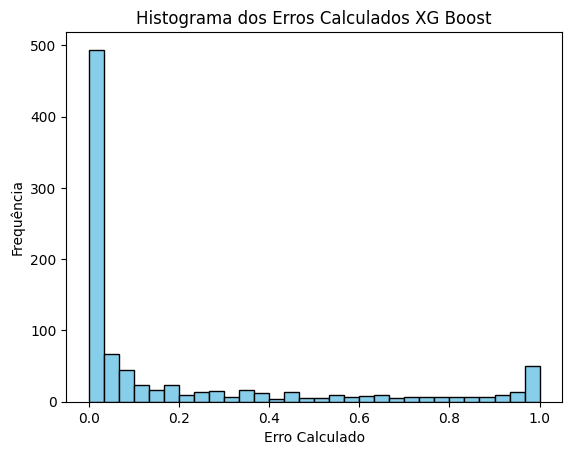

In [250]:
# Histograma dos erros reais do XG Boost
plt.hist(y_erro_xgb, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro Calculado')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Calculados XG Boost')
plt.show()

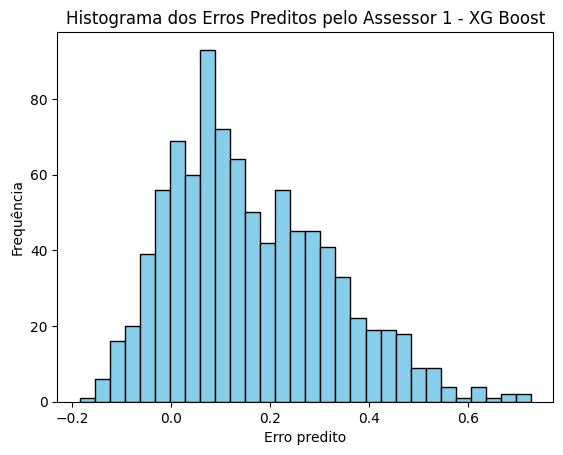

In [251]:
# Histograma dos erros preditos pelo Assessor 1 do XG Boost
plt.hist(pred_ass1_xgb, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro predito')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Preditos pelo Assessor 1 - XG Boost')
plt.show()

In [252]:
# Ajustando os dados (necessário para o StandardScaler, que não funciona sem o fit mesmo que o cross_val_predict já tenha sido utilizado)
ass1_xgb.fit(full_X, y_erro_xgb)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

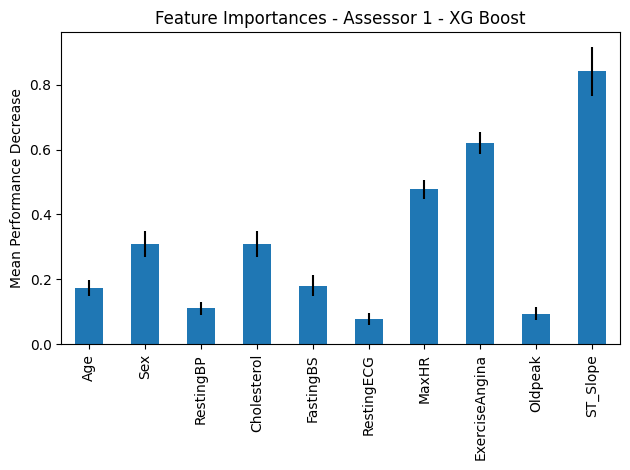

In [253]:
# Feature importances
result = permutation_importance(ass1_xgb, full_X, pred_ass1_xgb, n_repeats=30, random_state=0)
forest_importances = pd.Series(result.importances_mean, index=full_X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature Importances - Assessor 1 - XG Boost")
ax.set_ylabel("Mean Performance Decrease")

fig.tight_layout()
plt.show()

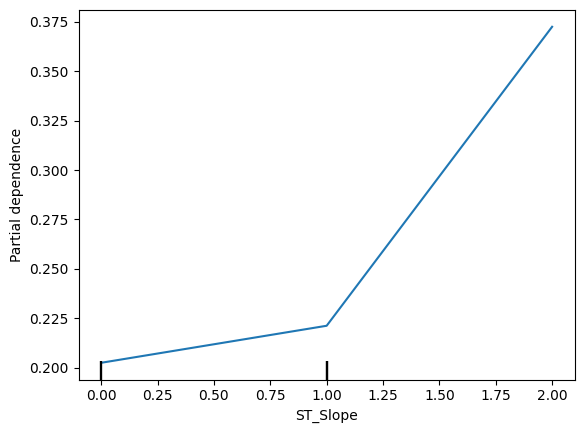

In [254]:
# PDP para o ST_Slope
disp = PartialDependenceDisplay.from_estimator(ass1_xgb, full_X, [(9)], grid_resolution=50)

#### Assessor 2

In [255]:
# Assessor 2: Treinado com dados + entropia | Atributo preditor: Erro do modelo

ass2_xgb = make_pipeline(StandardScaler(), SVR())
pred_ass2_xgb = cross_val_predict(ass2_xgb, X_entr_xgb, y_erro_xgb, cv = 10)

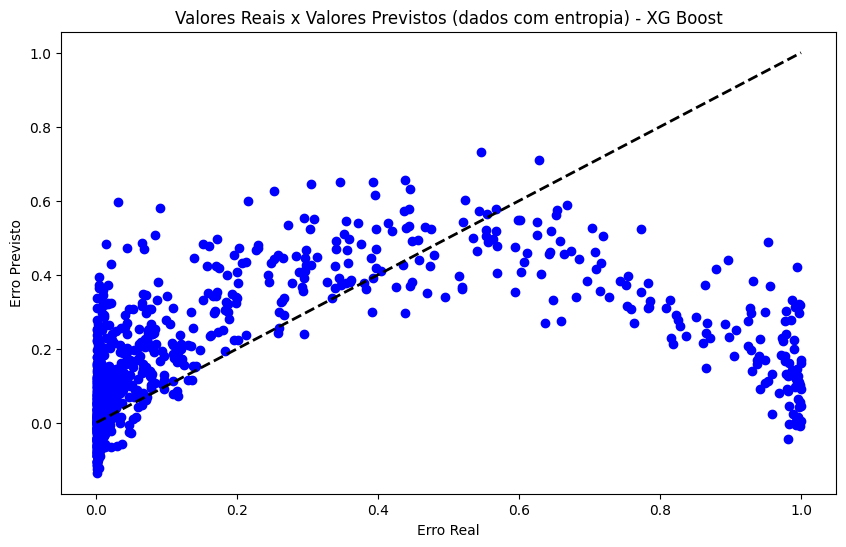

In [256]:
plt.figure(figsize=(10, 6))
plt.scatter(y_erro_xgb, pred_ass2_xgb, color='blue')
plt.plot([y_erro_xgb.min(), y_erro_xgb.max()], [y_erro_xgb.min(), y_erro_xgb.max()], 'k--', lw=2)
plt.xlabel('Erro Real')
plt.ylabel('Erro Previsto')
plt.title('Valores Reais x Valores Previstos (dados com entropia) - XG Boost')
plt.show()

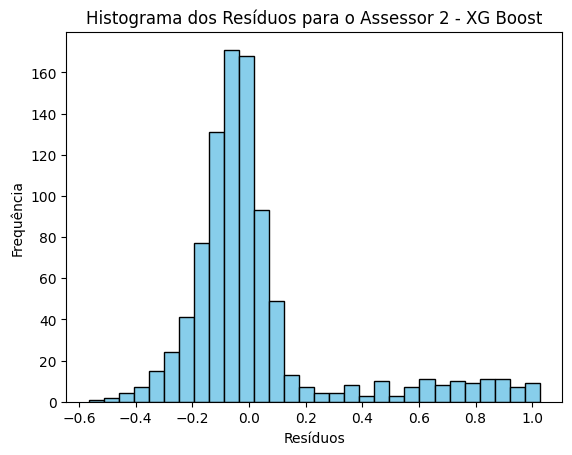

In [257]:
residuals = y_erro_xgb - pred_ass2_xgb
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos para o Assessor 2 - XG Boost')
plt.show()

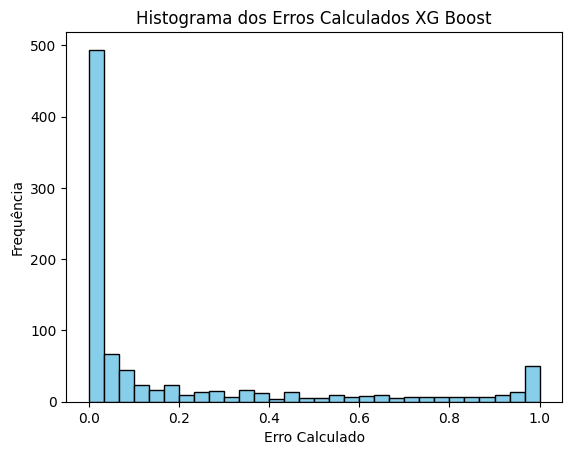

In [258]:
# Histograma dos erros reais do XG Boost
plt.hist(y_erro_xgb, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro Calculado')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Calculados XG Boost')
plt.show()

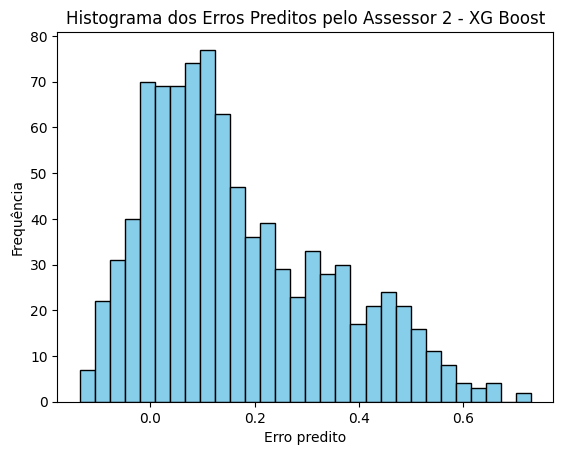

In [259]:
# Histograma dos erros preditos pelo Assessor 2 do XG Boost
plt.hist(pred_ass2_xgb, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro predito')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Preditos pelo Assessor 2 - XG Boost')
plt.show()

In [260]:
# Ajustando os dados (necessário para o StandardScaler, que não funciona sem o fit mesmo que o cross_val_predict já tenha sido utilizado)
ass2_xgb.fit(X_entr_xgb, y_erro_xgb)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

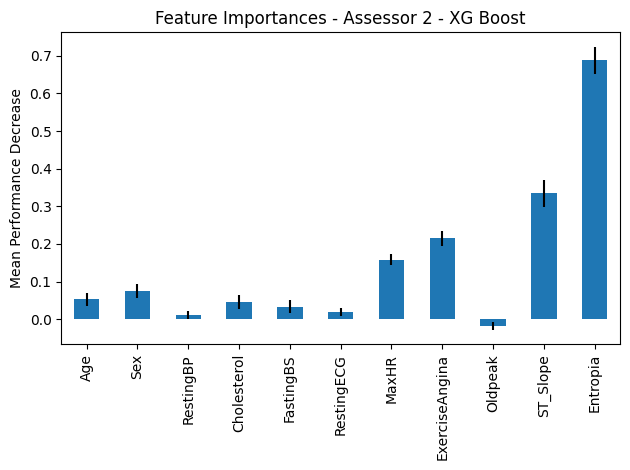

In [261]:
# Feature importances
result = permutation_importance(ass2_xgb, X_entr_xgb, pred_ass2_xgb, n_repeats=30, random_state=0)
forest_importances = pd.Series(result.importances_mean, index=X_entr_xgb.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature Importances - Assessor 2 - XG Boost")
ax.set_ylabel("Mean Performance Decrease")

fig.tight_layout()
plt.show()

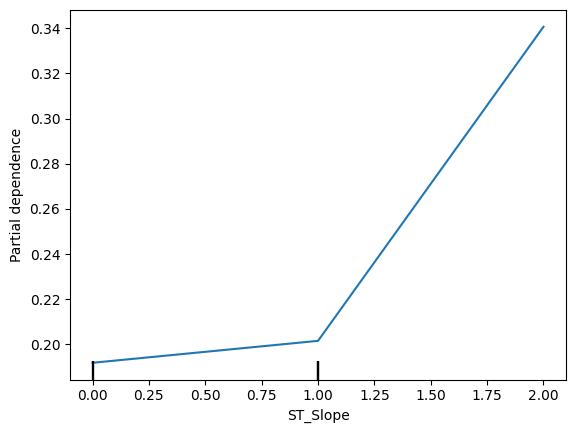

In [262]:
# PDP para o ST_Slope
disp = PartialDependenceDisplay.from_estimator(ass2_xgb, X_entr_xgb, [(9)], grid_resolution=50)

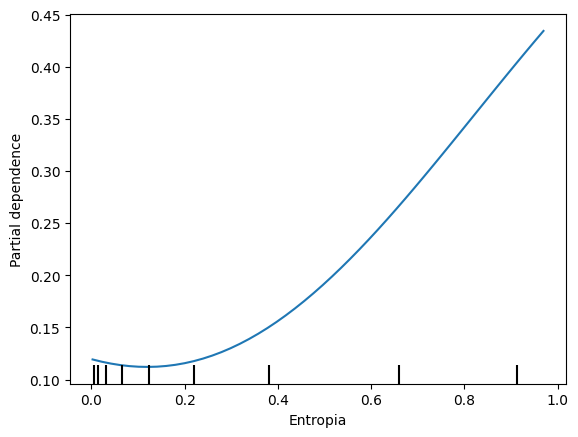

In [263]:
# PDP para a Entropia
disp = PartialDependenceDisplay.from_estimator(ass2_xgb, X_entr_xgb, [(10)], grid_resolution=50)

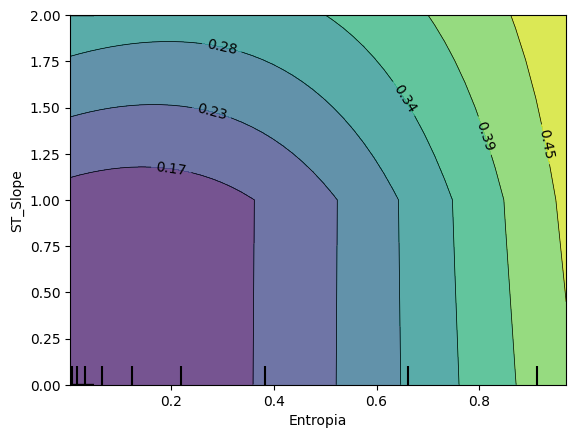

In [264]:
# PDP bi-dimensional para verificar as dependências entre as features Entropia e ST_Slope
disp = PartialDependenceDisplay.from_estimator(ass2_xgb, X_entr_xgb, [(10, 9)], grid_resolution=50)

#### Assessor 3

In [265]:
# Assessor 3: Treinado apenas com a entropia | Atributo preditor: Erro do modelo

ass3_xgb = make_pipeline(StandardScaler(), SVR())
pred_ass3_xgb = cross_val_predict(ass3_xgb, X_apenas_entr_xgb, y_erro_xgb, cv = 10)

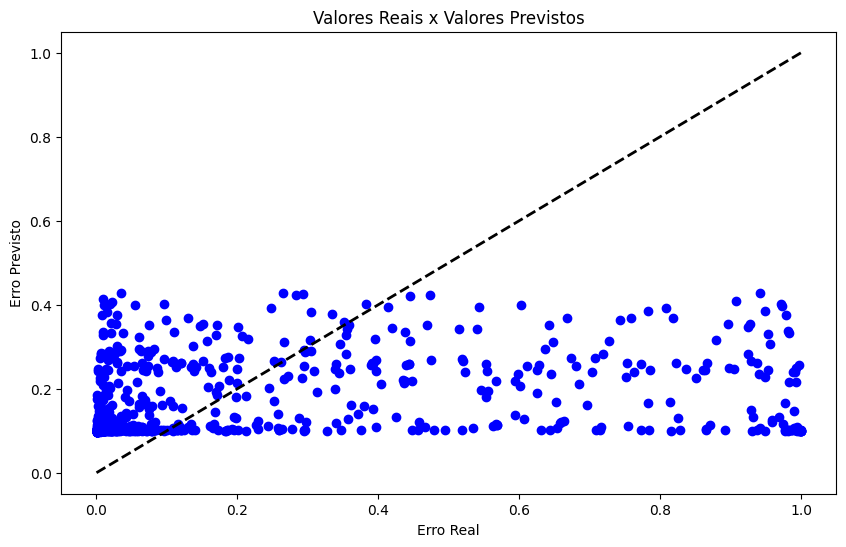

In [266]:
plt.figure(figsize=(10, 6))
plt.scatter(y_erro_xgb, pred_ass3_xgb, color='blue')
plt.plot([y_erro_xgb.min(), y_erro_xgb.max()], [y_erro_xgb.min(), y_erro_xgb.max()], 'k--', lw=2)
plt.xlabel('Erro Real')
plt.ylabel('Erro Previsto')
plt.title('Valores Reais x Valores Previstos')
plt.show()

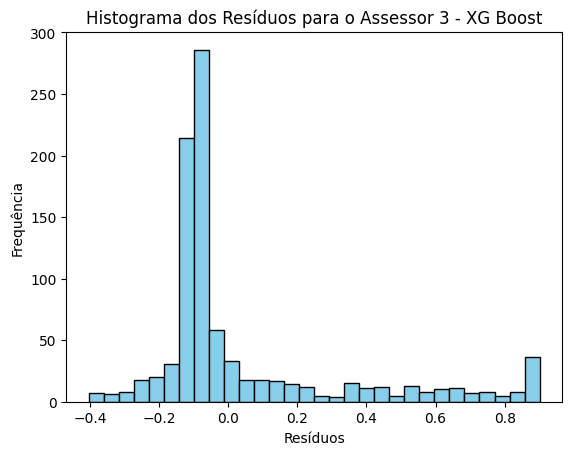

In [267]:
residuals = y_erro_xgb - pred_ass3_xgb
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos para o Assessor 3 - XG Boost')
plt.show()

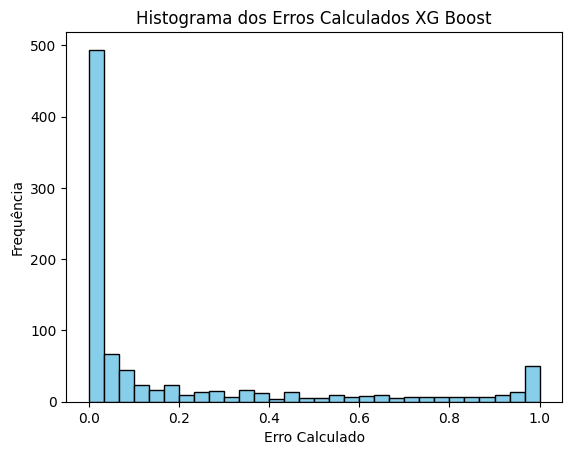

In [268]:
# Histograma dos erros reais do XG Boost
plt.hist(y_erro_xgb, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro Calculado')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Calculados XG Boost')
plt.show()

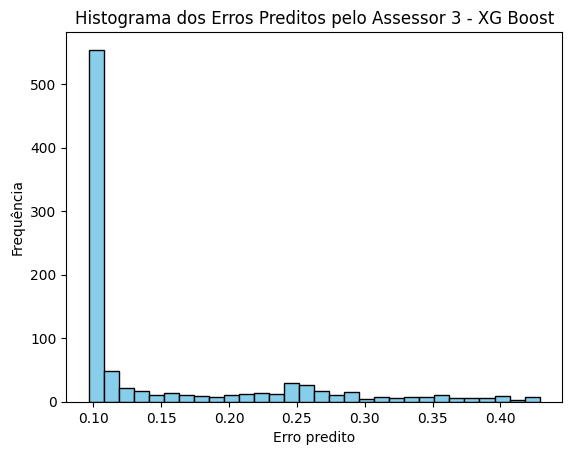

In [269]:
# Histograma dos erros preditos pelo Assessor 3 do XG Boost
plt.hist(pred_ass3_xgb, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro predito')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Preditos pelo Assessor 3 - XG Boost')
plt.show()

In [270]:
# Ajustando os dados (necessário para o StandardScaler, que não funciona sem o fit mesmo que o cross_val_predict já tenha sido utilizado)
ass3_xgb.fit(X_apenas_entr_xgb, y_erro_xgb)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

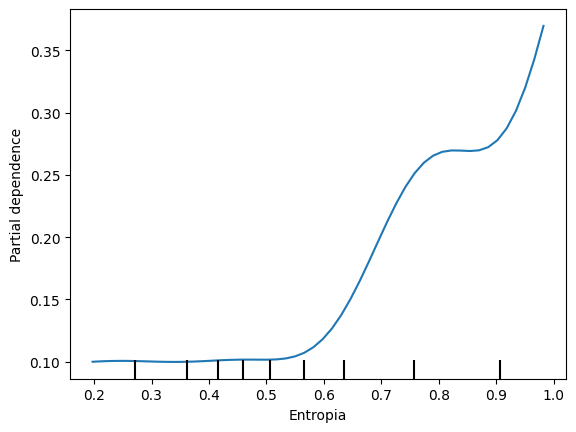

In [271]:
# PDP para a Entropia
disp = PartialDependenceDisplay.from_estimator(ass3_xgb, X_apenas_entr_xgb, [(0)], grid_resolution=50)

### Performances dos modelos

In [272]:
# XGBoost
report_xgb = classification_report(y, pred_xgb)
print(report_xgb)

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       410
           1       0.85      0.85      0.85       508

    accuracy                           0.83       918
   macro avg       0.83      0.83      0.83       918
weighted avg       0.83      0.83      0.83       918



In [273]:
# Assessores
mae_ass1_xgb = mean_absolute_error(y_erro_xgb, pred_ass1_xgb)
print(f'Assessor 1 (dados sem entropia): {mae_ass1_xgb}')

mae_ass2_xgb = mean_absolute_error(y_erro_xgb, pred_ass2_xgb)
print(f'Assessor 2 (dados com entropia): {mae_ass2_xgb}')

mae_ass3_xgb = mean_absolute_error(y_erro_xgb, pred_ass3_xgb)
print(f'Assessor 3 (somente entropia): {mae_ass3_xgb}')

Assessor 1 (dados sem entropia): 0.19075397107610614
Assessor 2 (dados com entropia): 0.17046313256641007
Assessor 3 (somente entropia): 0.19638267578969298


## Cat Boost

In [274]:
# Instanciando e treinando o classificador
cat = CatBoostClassifier()

# Encontrando as probabilidades de certeza sobre as predições do modelo e printando os 5 primeiros exemplos
prob_cat = cross_val_predict(cat, X, y, cv = 10, method = 'predict_proba')
pred_cat = cross_val_predict(cat, X, y, cv = 10)
print(f'Probabilidades (prob_cat):\n{prob_cat[:5]}\n')

prob_cat[prob_cat == 0] = 0.001
prob_cat[prob_cat == 1] = 0.999

# Erro absoluto
erro_cat = filtra_label(prob_cat)
print(f'Erro absoluto (erro_cat):\n{erro_cat[:5]}\n Erro médio: {np.mean(erro_cat)}\n')

# Entropia
entr_cat = -prob_cat * np.log2(prob_cat) - (1 - prob_cat) * np.log2(1 - prob_cat)
print(f'Entropia (entr_cat):\n{entr_cat[:5]}')

Streaming output truncated to the last 5000 lines.
21:	learn: 0.5559484	total: 32.2ms	remaining: 1.43s
22:	learn: 0.5507794	total: 33.5ms	remaining: 1.42s
23:	learn: 0.5474401	total: 34.3ms	remaining: 1.39s
24:	learn: 0.5423382	total: 35.6ms	remaining: 1.39s
25:	learn: 0.5377952	total: 36.8ms	remaining: 1.38s
26:	learn: 0.5337373	total: 38.4ms	remaining: 1.38s
27:	learn: 0.5294666	total: 39.7ms	remaining: 1.38s
28:	learn: 0.5242154	total: 41.2ms	remaining: 1.38s
29:	learn: 0.5197771	total: 42.7ms	remaining: 1.38s
30:	learn: 0.5150153	total: 44.3ms	remaining: 1.38s
31:	learn: 0.5115227	total: 45.8ms	remaining: 1.38s
32:	learn: 0.5073716	total: 47.3ms	remaining: 1.39s
33:	learn: 0.5045111	total: 48.6ms	remaining: 1.38s
34:	learn: 0.5000368	total: 50ms	remaining: 1.38s
35:	learn: 0.4973277	total: 51.5ms	remaining: 1.38s
36:	learn: 0.4931141	total: 53ms	remaining: 1.38s
37:	learn: 0.4902687	total: 54.1ms	remaining: 1.37s
38:	learn: 0.4867637	total: 55.7ms	remaining: 1.37s
39:	learn: 0.4825

### Assessores: Cat Boost

In [275]:
# Formatando o erro e a entropia
erro_cat = np.array(erro_cat)

entr_cat = np.array(np.delete(entr_cat, 1, axis=1))
entr_cat = entr_cat.flatten()

print(f'Erro: {erro_cat[:5]}...\n')
print(f'Entropia: {entr_cat[:5]}...\n')

# Dataset com coluna para a entropia média do pool
X_entr_cat = X.copy()
X_entr_cat['Entropia'] = entr_cat

# Atributo preditor: Coluna para o erro médio do pool
y_erro_cat = erro_cat

Erro: [0.02656666 0.84040795 0.02545394 0.32368894 0.03557813]...

Entropia: [0.17687015 0.63333272 0.1710541  0.90834802 0.22163705]...



In [276]:
# X utilizado para o treinamento do Assessor 2 (dados + entropia)
X_entr_cat.head()

Age  Sex  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  \
0   40    0        140          289          0           0    172   
1   49    1        160          180          0           0    156   
2   37    0        130          283          0           1     98   
3   48    1        138          214          0           0    108   
4   54    0        150          195          0           0    122   

   ExerciseAngina  Oldpeak  ST_Slope  Entropia  
0               0      0.0         0  0.176870  
1               0      1.0         1  0.633333  
2               0      0.0         0  0.171054  
3               1      1.5         1  0.908348  
4               0      0.0         0  0.221637

In [277]:
# Criando um dataset somente com entropia para o terceiro assessor
X_apenas_entr_cat = X_entr_svm.copy()
X_apenas_entr_cat = X_apenas_entr_cat.drop(columns = ["Age", "Sex", "RestingBP", "Cholesterol", "FastingBS", "RestingECG", "MaxHR", "ExerciseAngina", "Oldpeak", "ST_Slope"])

# X utilizado para o treinamento do Assessor 3 (entropia)
X_apenas_entr_cat.head()

Entropia
0  0.366703
1  0.760480
2  0.675547
3  0.720831
4  0.328623

#### Assessor 1

In [278]:
# Assessor 1: Treinado com dados | Atributo preditor: Erro do modelo

ass1_cat = make_pipeline(StandardScaler(), SVR())
pred_ass1_cat = cross_val_predict(ass1_cat, full_X, y_erro_cat, cv = 10)

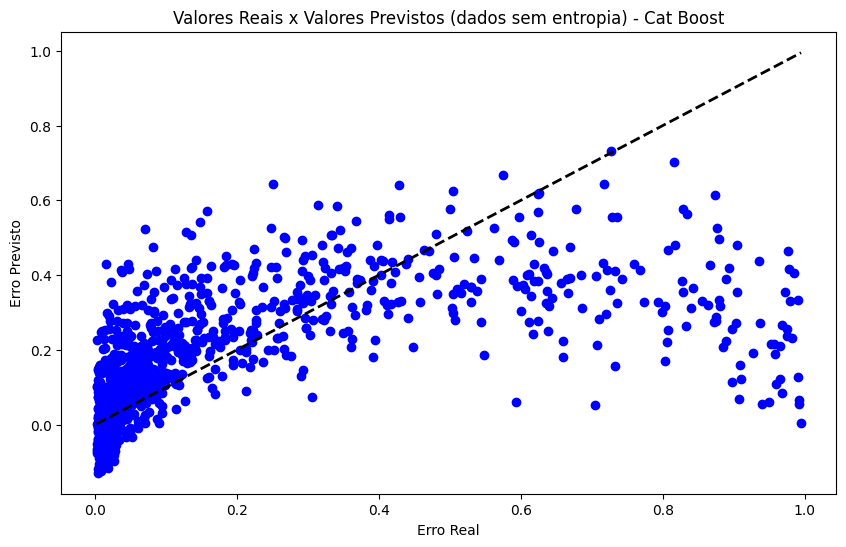

In [279]:
plt.figure(figsize=(10, 6))
plt.scatter(y_erro_cat, pred_ass1_cat, color='blue')
plt.plot([y_erro_cat.min(), y_erro_cat.max()], [y_erro_cat.min(), y_erro_cat.max()], 'k--', lw=2)
plt.xlabel('Erro Real')
plt.ylabel('Erro Previsto')
plt.title('Valores Reais x Valores Previstos (dados sem entropia) - Cat Boost')
plt.show()

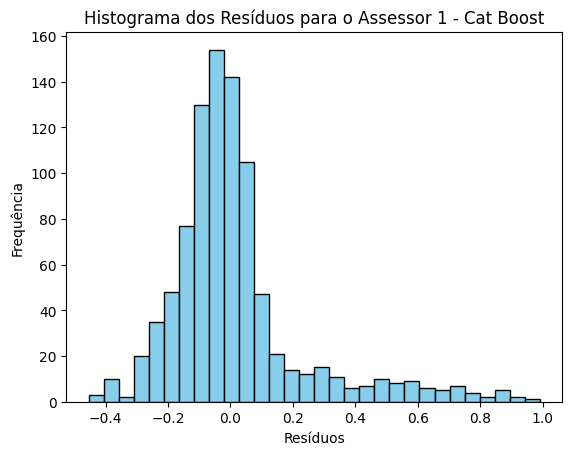

In [280]:
residuals = y_erro_cat - pred_ass1_cat
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos para o Assessor 1 - Cat Boost')
plt.show()

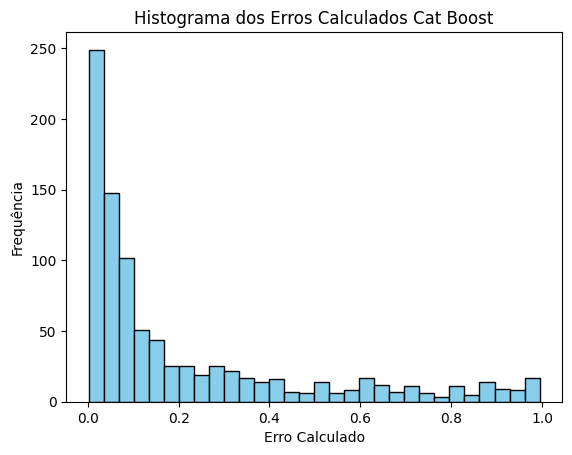

In [281]:
# Histograma dos erros reais do Cat Boost
plt.hist(y_erro_cat, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro Calculado')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Calculados Cat Boost')
plt.show()

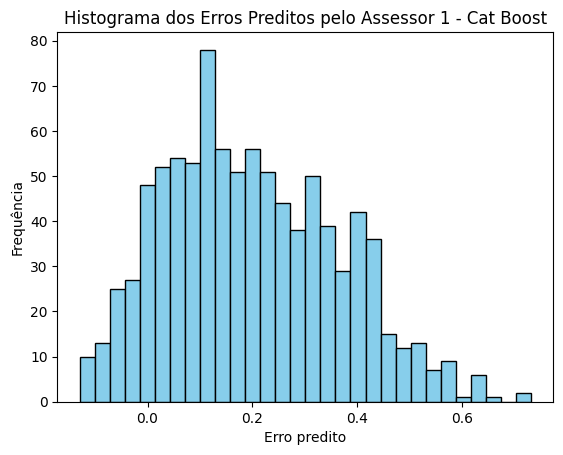

In [282]:
# Histograma dos erros preditos pelo Assessor 1 do Cat Boost
plt.hist(pred_ass1_cat, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro predito')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Preditos pelo Assessor 1 - Cat Boost')
plt.show()

In [283]:
# Ajustando os dados (necessário para o StandardScaler, que não funciona sem o fit mesmo que o cross_val_predict já tenha sido utilizado)
ass1_cat.fit(full_X, y_erro_cat)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

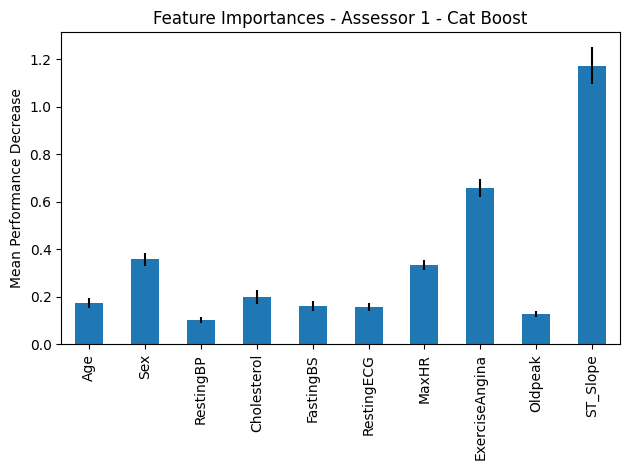

In [284]:
# Feature importances
result = permutation_importance(ass1_cat, full_X, pred_ass1_cat, n_repeats=30, random_state=0)
forest_importances = pd.Series(result.importances_mean, index=full_X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature Importances - Assessor 1 - Cat Boost")
ax.set_ylabel("Mean Performance Decrease")

fig.tight_layout()
plt.show()

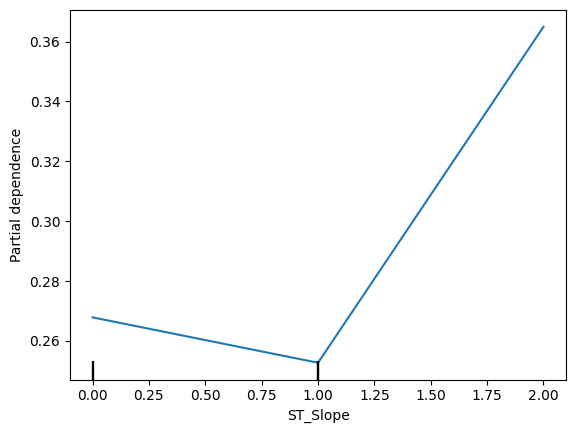

In [285]:
# PDP para o ST_Slope
disp = PartialDependenceDisplay.from_estimator(ass1_cat, full_X, [(9)], grid_resolution=50)

#### Assessor 2

In [286]:
# Assessor 2: Treinado com dados + entropia | Atributo preditor: Erro do modelo

ass2_cat = make_pipeline(StandardScaler(), SVR())
pred_ass2_cat = cross_val_predict(ass2_cat, X_entr_cat, y_erro_cat, cv = 10)

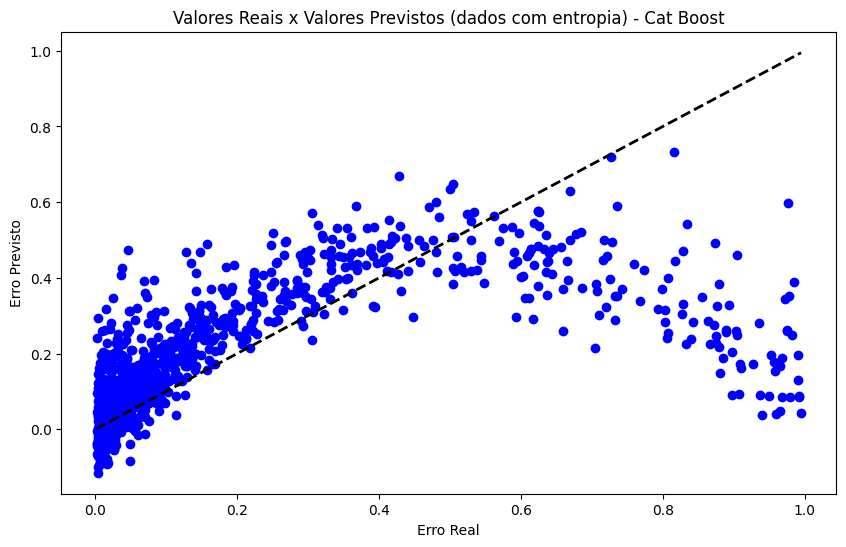

In [287]:
plt.figure(figsize=(10, 6))
plt.scatter(y_erro_cat, pred_ass2_cat, color='blue')
plt.plot([y_erro_cat.min(), y_erro_cat.max()], [y_erro_cat.min(), y_erro_cat.max()], 'k--', lw=2)
plt.xlabel('Erro Real')
plt.ylabel('Erro Previsto')
plt.title('Valores Reais x Valores Previstos (dados com entropia) - Cat Boost')
plt.show()

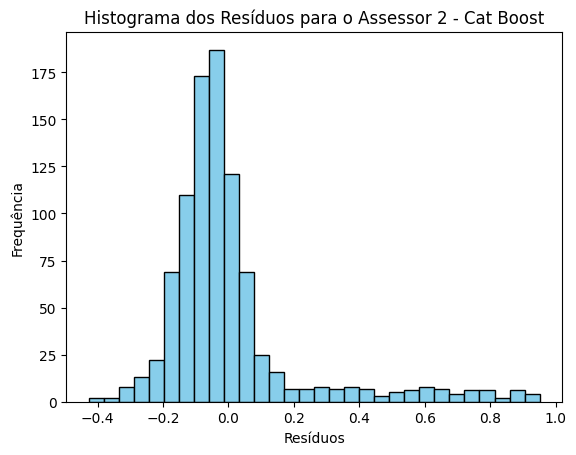

In [288]:
residuals = y_erro_cat - pred_ass2_cat
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos para o Assessor 2 - Cat Boost')
plt.show()

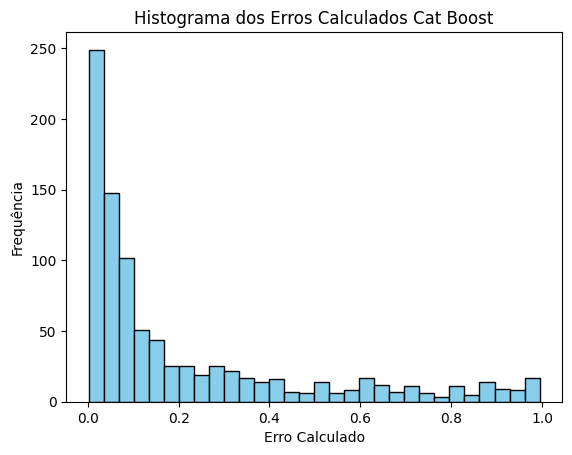

In [289]:
# Histograma dos erros reais do Cat Boost
plt.hist(y_erro_cat, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro Calculado')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Calculados Cat Boost')
plt.show()

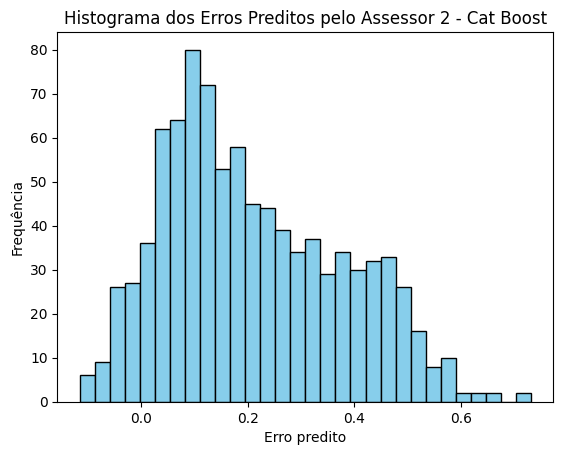

In [290]:
# Histograma dos erros preditos pelo Assessor 2 do Cat Boost
plt.hist(pred_ass2_cat, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro predito')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Preditos pelo Assessor 2 - Cat Boost')
plt.show()

In [291]:
# Ajustando os dados (necessário para o StandardScaler, que não funciona sem o fit mesmo que o cross_val_predict já tenha sido utilizado)
ass2_cat.fit(X_entr_cat, y_erro_cat)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

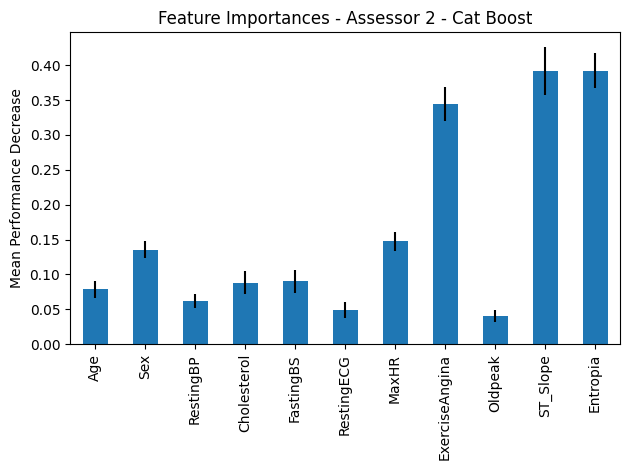

In [292]:
# Feature importances
result = permutation_importance(ass2_cat, X_entr_cat, pred_ass2_cat, n_repeats=30, random_state=0)
forest_importances = pd.Series(result.importances_mean, index=X_entr_cat.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature Importances - Assessor 2 - Cat Boost")
ax.set_ylabel("Mean Performance Decrease")

fig.tight_layout()
plt.show()

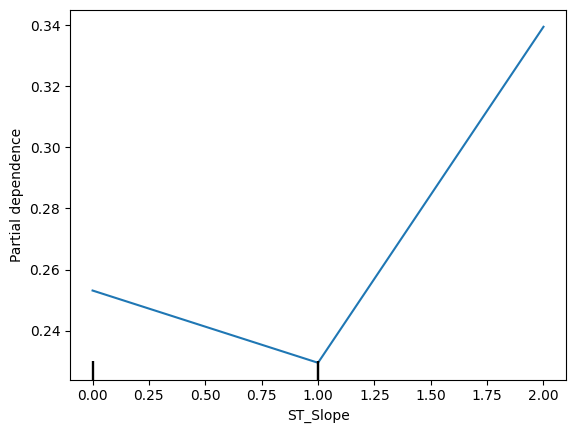

In [293]:
# PDP para o ST_Slope
disp = PartialDependenceDisplay.from_estimator(ass2_cat, X_entr_cat, [(9)], grid_resolution=50)

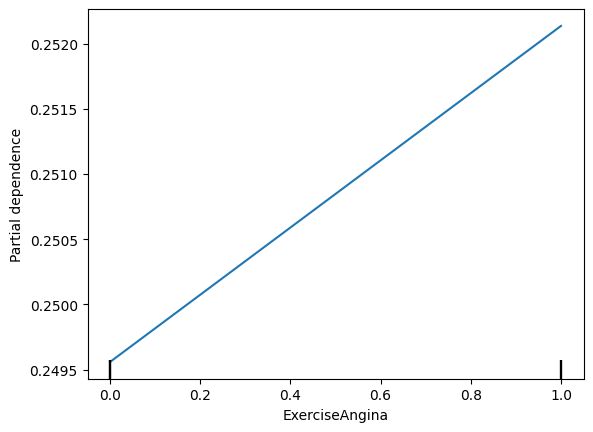

In [294]:
# PDP para a ExerciseAngina
disp = PartialDependenceDisplay.from_estimator(ass2_cat, X_entr_cat, [(7)], grid_resolution=50)

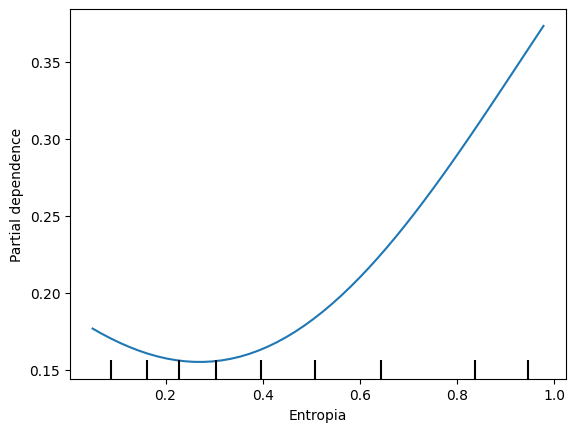

In [295]:
# PDP para a Entropia
disp = PartialDependenceDisplay.from_estimator(ass2_cat, X_entr_cat, [(10)], grid_resolution=50)

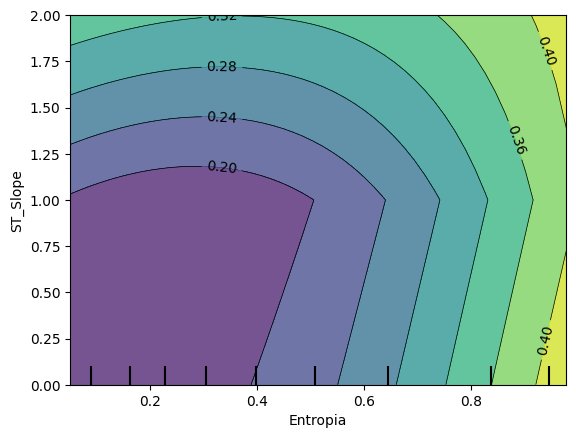

In [296]:
# PDP bi-dimensional para verificar as dependências entre as features Entropia e ST_Slope
disp = PartialDependenceDisplay.from_estimator(ass2_cat, X_entr_cat, [(10, 9)], grid_resolution=50)

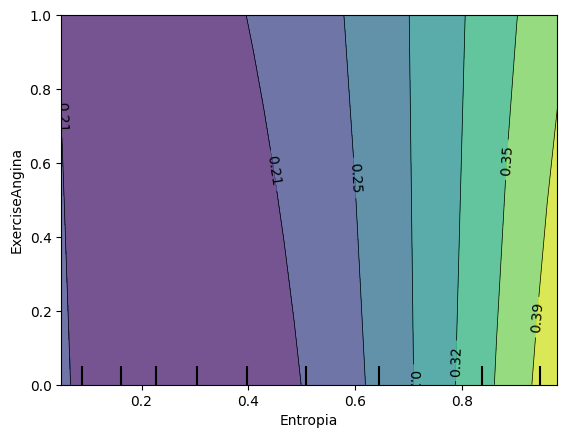

In [297]:
# PDP bi-dimensional para verificar as dependências entre as features Entropia e ExerciseAngina
disp = PartialDependenceDisplay.from_estimator(ass2_cat, X_entr_cat, [(10, 7)], grid_resolution=50)

#### Assessor 3

In [298]:
# Assessor 3: Treinado apenas com a entropia | Atributo preditor: Erro do modelo

ass3_cat = make_pipeline(StandardScaler(), SVR())
pred_ass3_cat = cross_val_predict(ass3_cat, X_apenas_entr_cat, y_erro_cat, cv = 10)

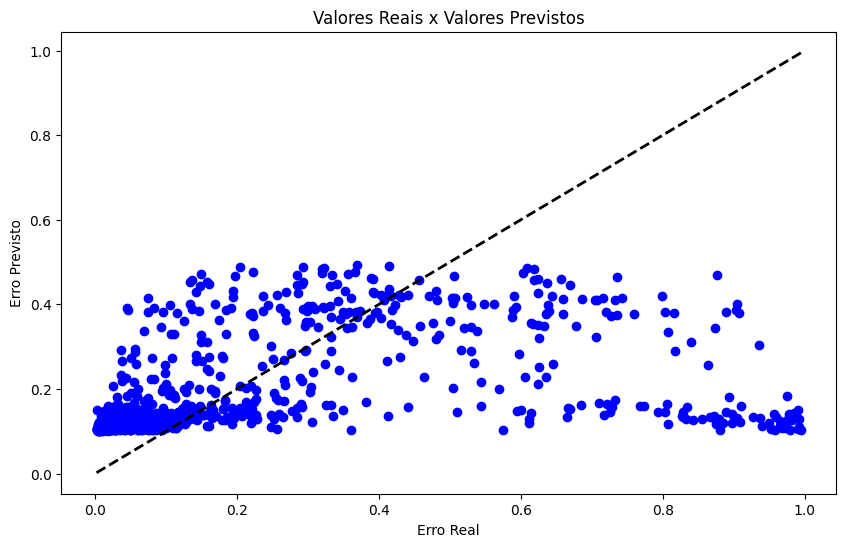

In [299]:
plt.figure(figsize=(10, 6))
plt.scatter(y_erro_cat, pred_ass3_cat, color='blue')
plt.plot([y_erro_cat.min(), y_erro_cat.max()], [y_erro_cat.min(), y_erro_cat.max()], 'k--', lw=2)
plt.xlabel('Erro Real')
plt.ylabel('Erro Previsto')
plt.title('Valores Reais x Valores Previstos')
plt.show()

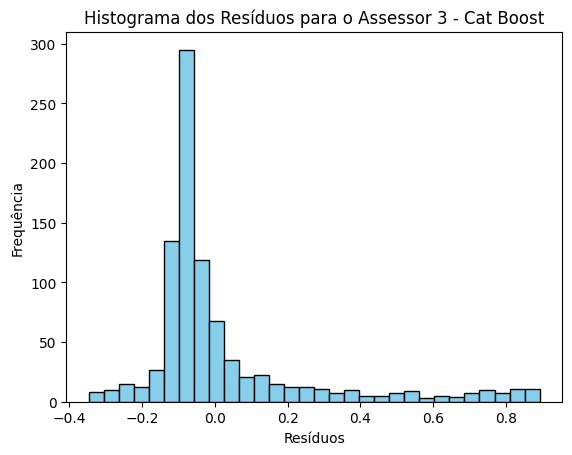

In [300]:
residuals = y_erro_cat - pred_ass3_cat
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos para o Assessor 3 - Cat Boost')
plt.show()

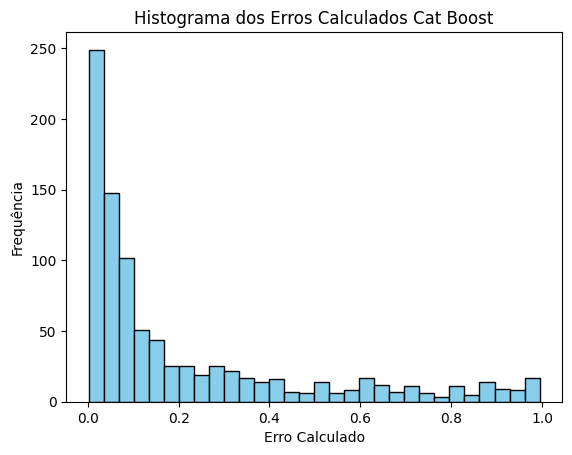

In [301]:
# Histograma dos erros reais do Cat Boost
plt.hist(y_erro_cat, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro Calculado')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Calculados Cat Boost')
plt.show()

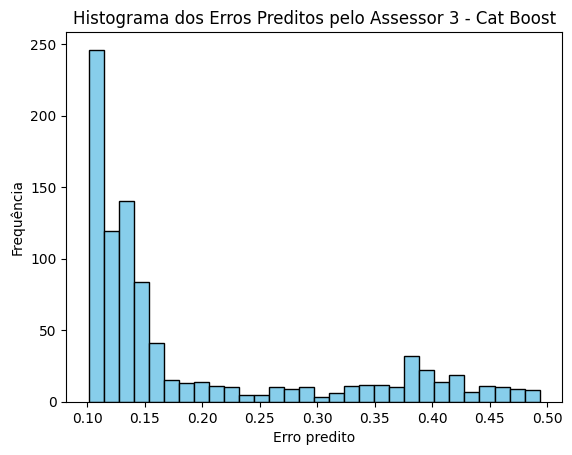

In [302]:
# Histograma dos erros preditos pelo Assessor 3 do Cat Boost
plt.hist(pred_ass3_cat, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro predito')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Preditos pelo Assessor 3 - Cat Boost')
plt.show()

In [303]:
# Ajustando os dados (necessário para o StandardScaler, que não funciona sem o fit mesmo que o cross_val_predict já tenha sido utilizado)
ass3_cat.fit(X_apenas_entr_cat, y_erro_cat)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

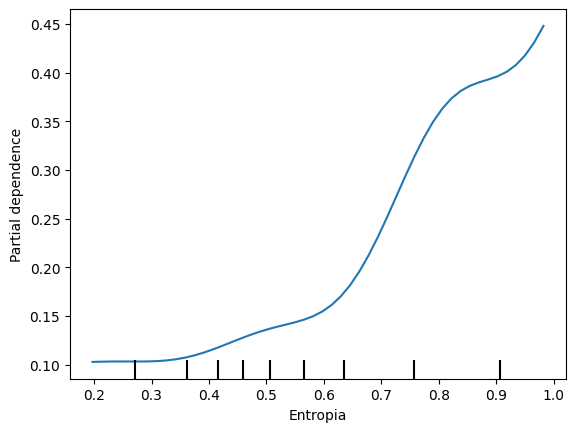

In [304]:
# PDP para a Entropia
disp = PartialDependenceDisplay.from_estimator(ass3_cat, X_apenas_entr_cat, [(0)], grid_resolution=50)

### Performances dos modelos

In [305]:
# CatBoost
report_cat = classification_report(y, pred_cat)
print(report_cat)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       410
           1       0.86      0.85      0.85       508

    accuracy                           0.84       918
   macro avg       0.84      0.84      0.84       918
weighted avg       0.84      0.84      0.84       918



In [306]:
# Assessores
mae_ass1_cat = mean_absolute_error(y_erro_cat, pred_ass1_cat)
print(f'Assessor 1 (dados sem entropia): {mae_ass1_cat}')

mae_ass2_cat = mean_absolute_error(y_erro_cat, pred_ass2_cat)
print(f'Assessor 2 (dados com entropia): {mae_ass2_cat}')

mae_ass3_cat = mean_absolute_error(y_erro_cat, pred_ass3_cat)
print(f'Assessor 3 (somente entropia): {mae_ass3_cat}')

Assessor 1 (dados sem entropia): 0.14189969210598158
Assessor 2 (dados com entropia): 0.13278722341665825
Assessor 3 (somente entropia): 0.15293969163139573


## SVM Classifier - Linear Kernel

In [307]:
# Instanciando e treinando o classificador
lin_svc = SVC(kernel='linear')
lin_svc = make_pipeline(StandardScaler(), SVC(probability=True))

# Encontrando as probabilidades de certeza sobre as predições do modelo e printando os 5 primeiros exemplos
prob_lin_svc = cross_val_predict(lin_svc, X, y, cv = 10, method = 'predict_proba')
pred_lin_svc = cross_val_predict(lin_svc, X, y, cv = 10)
print(f'Probabilidades (prob_lin_svc):\n{prob_lin_svc[:5]}\n')

prob_lin_svc[prob_lin_svc == 0] = 0.001
prob_lin_svc[prob_lin_svc == 1] = 0.999

# Erro absoluto
erro_lin_svc = filtra_label(prob_lin_svc)
print(f'Erro absoluto (erro_lin_svc):\n{erro_lin_svc[:5]}\n Erro médio: {np.mean(erro_lin_svc)}\n')

# Entropia
entr_lin_svc = -prob_lin_svc * np.log2(prob_lin_svc) - (1 - prob_lin_svc) * np.log2(1 - prob_lin_svc)
print(f'Entropia (entr_lin_svc):\n{entr_lin_svc[:5]}')

Probabilidades (prob_lin_svc):
[[0.93461676 0.06538324]
 [0.78688694 0.21311306]
 [0.82905959 0.17094041]
 [0.19494471 0.80505529]
 [0.94431493 0.05568507]]

Erro absoluto (erro_lin_svc):
[0.06538324 0.78688694 0.17094041 0.19494471 0.05568507]
 Erro médio: 0.23330600618274414

Entropia (entr_lin_svc):
[[0.34845368 0.34845368]
 [0.74739126 0.74739126]
 [0.65985152 0.65985152]
 [0.71170157 0.71170157]
 [0.31007258 0.31007258]]


### Assessores: SVM Classifier - Linear Kernel

In [308]:
# Formatando o erro e a entropia
erro_lin_svc = np.array(erro_lin_svc)

entr_lin_svc = np.array(np.delete(entr_lin_svc, 1, axis=1))
entr_lin_svc = entr_lin_svc.flatten()

print(f'Erro: {erro_lin_svc[:5]}...\n')
print(f'Entropia: {entr_lin_svc[:5]}...\n')

# Dataset com coluna para a entropia
X_entr_lin_svc = X.copy()
X_entr_lin_svc['Entropia'] = entr_lin_svc

# Atributo preditor: Coluna para o erro
y_erro_lin_svc = erro_lin_svc

Erro: [0.06538324 0.78688694 0.17094041 0.19494471 0.05568507]...

Entropia: [0.34845368 0.74739126 0.65985152 0.71170157 0.31007258]...



In [309]:
# X utilizado para o treinamento do Assessor 2 (dados + entropia)
X_entr_lin_svc.head()

Age  Sex  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  \
0   40    0        140          289          0           0    172   
1   49    1        160          180          0           0    156   
2   37    0        130          283          0           1     98   
3   48    1        138          214          0           0    108   
4   54    0        150          195          0           0    122   

   ExerciseAngina  Oldpeak  ST_Slope  Entropia  
0               0      0.0         0  0.348454  
1               0      1.0         1  0.747391  
2               0      0.0         0  0.659852  
3               1      1.5         1  0.711702  
4               0      0.0         0  0.310073

In [310]:
# Criando um dataset somente com entropia para o terceiro assessor
X_apenas_entr_lin_svc = X_entr_svm.copy()
X_apenas_entr_lin_svc = X_apenas_entr_lin_svc.drop(columns = ["Age", "Sex", "RestingBP", "Cholesterol", "FastingBS", "RestingECG", "MaxHR", "ExerciseAngina", "Oldpeak", "ST_Slope"])

# X utilizado para o treinamento do Assessor 3 (entropia)
X_apenas_entr_lin_svc.head()

Entropia
0  0.366703
1  0.760480
2  0.675547
3  0.720831
4  0.328623

#### Assessor 1

In [311]:
# Assessor 1: Treinado com dados | Atributo preditor: Erro do modelo

ass1_lin_svc = make_pipeline(StandardScaler(), SVR())
pred_ass1_lin_svc = cross_val_predict(ass1_lin_svc, full_X, y_erro_lin_svc, cv = 10)

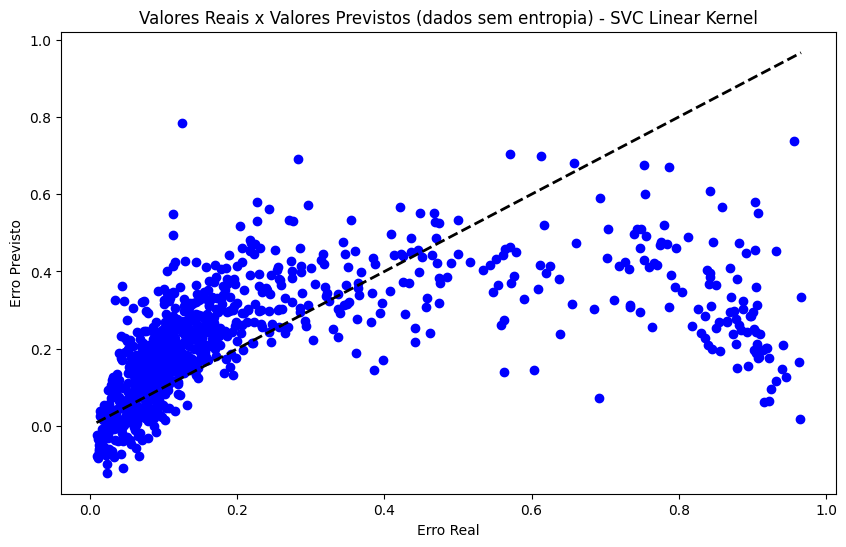

In [312]:
plt.figure(figsize=(10, 6))
plt.scatter(y_erro_lin_svc, pred_ass1_lin_svc, color='blue')
plt.plot([y_erro_lin_svc.min(), y_erro_lin_svc.max()], [y_erro_lin_svc.min(), y_erro_lin_svc.max()], 'k--', lw=2)
plt.xlabel('Erro Real')
plt.ylabel('Erro Previsto')
plt.title('Valores Reais x Valores Previstos (dados sem entropia) - SVC Linear Kernel')
plt.show()

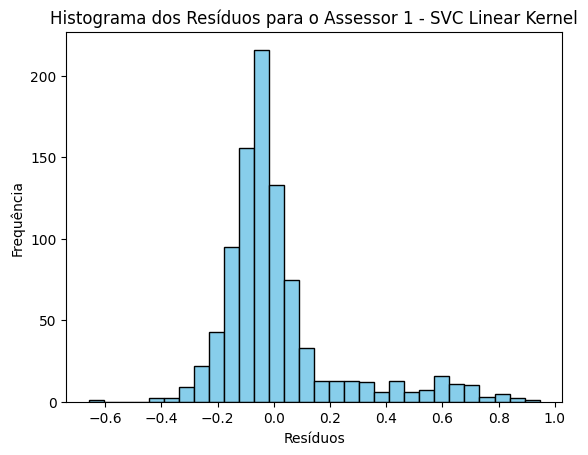

In [313]:
residuals = y_erro_lin_svc - pred_ass1_lin_svc
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos para o Assessor 1 - SVC Linear Kernel')
plt.show()

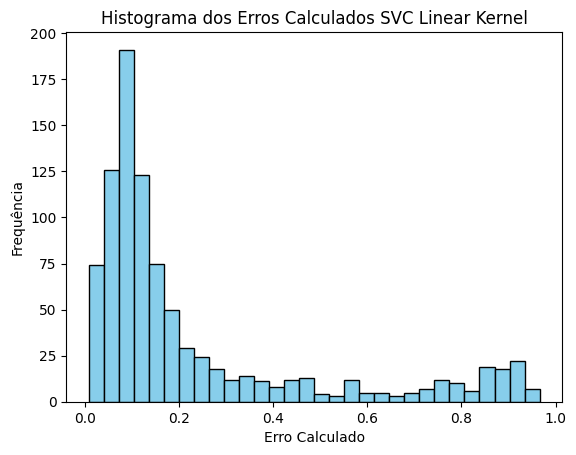

In [314]:
# Histograma dos erros reais do SVC Linear Kernel
plt.hist(y_erro_lin_svc, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro Calculado')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Calculados SVC Linear Kernel')
plt.show()

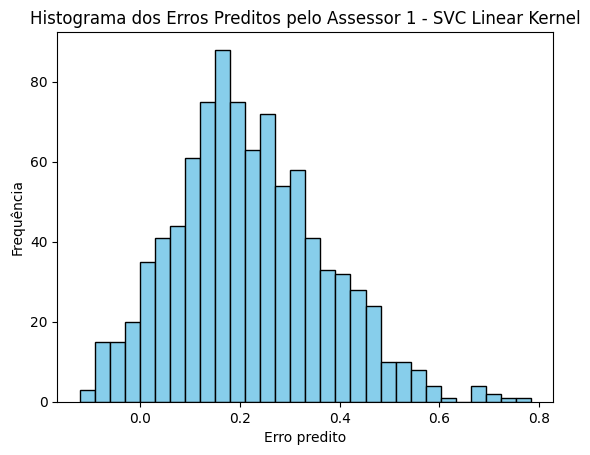

In [315]:
# Histograma dos erros preditos pelo Assessor 1 do SVC Linear Kernel
plt.hist(pred_ass1_lin_svc, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro predito')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Preditos pelo Assessor 1 - SVC Linear Kernel')
plt.show()

In [316]:
# Ajustando os dados (necessário para o StandardScaler, que não funciona sem o fit mesmo que o cross_val_predict já tenha sido utilizado)
ass1_lin_svc.fit(full_X, y_erro_lin_svc)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

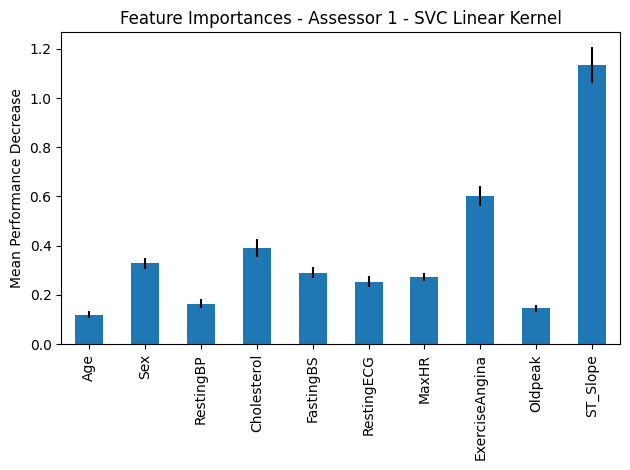

In [317]:
# Feature importances
result = permutation_importance(ass1_lin_svc, full_X, pred_ass1_lin_svc, n_repeats=30, random_state=0)
forest_importances = pd.Series(result.importances_mean, index=full_X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature Importances - Assessor 1 - SVC Linear Kernel")
ax.set_ylabel("Mean Performance Decrease")

fig.tight_layout()
plt.show()

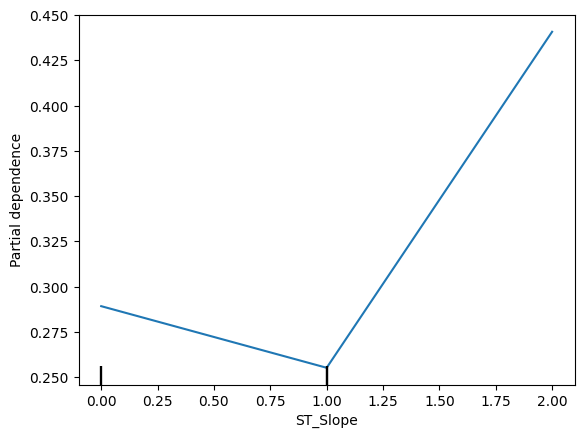

In [318]:
# PDP para o ST_Slope
disp = PartialDependenceDisplay.from_estimator(ass1_lin_svc, full_X, [(9)], grid_resolution=50)

#### Assessor 2

In [319]:
# Assessor 2: Treinado com dados + entropia | Atributo preditor: Erro do modelo

ass2_lin_svc = make_pipeline(StandardScaler(), SVR())
pred_ass2_lin_svc = cross_val_predict(ass2_lin_svc, X_entr_lin_svc, y_erro_lin_svc, cv = 10)

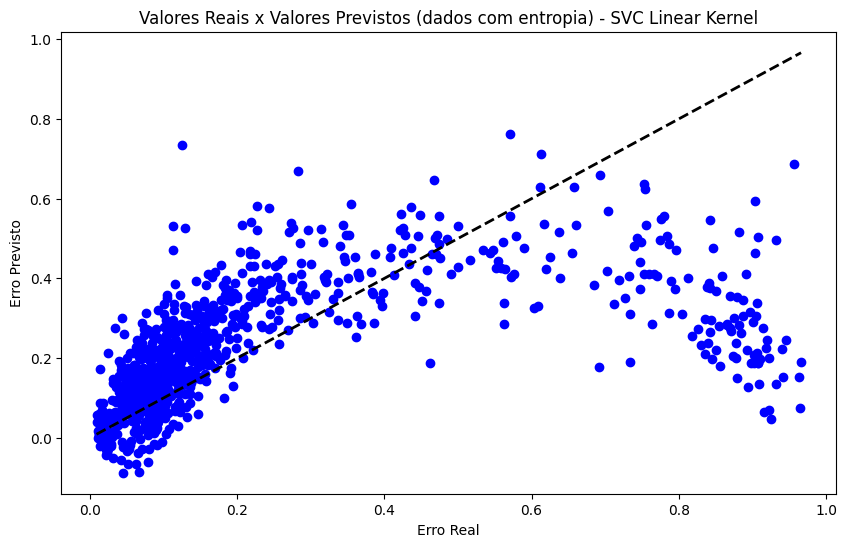

In [320]:
plt.figure(figsize=(10, 6))
plt.scatter(y_erro_lin_svc, pred_ass2_lin_svc, color='blue')
plt.plot([y_erro_lin_svc.min(), y_erro_lin_svc.max()], [y_erro_lin_svc.min(), y_erro_lin_svc.max()], 'k--', lw=2)
plt.xlabel('Erro Real')
plt.ylabel('Erro Previsto')
plt.title('Valores Reais x Valores Previstos (dados com entropia) - SVC Linear Kernel')
plt.show()

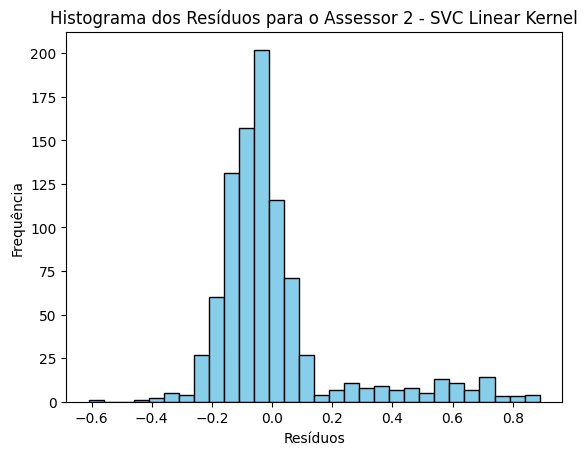

In [321]:
residuals = y_erro_lin_svc - pred_ass2_lin_svc
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos para o Assessor 2 - SVC Linear Kernel')
plt.show()

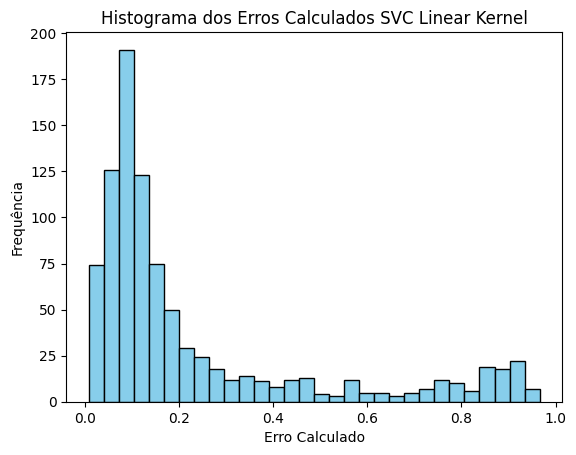

In [322]:
# Histograma dos erros reais do SVC Linear Kernel
plt.hist(y_erro_lin_svc, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro Calculado')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Calculados SVC Linear Kernel')
plt.show()

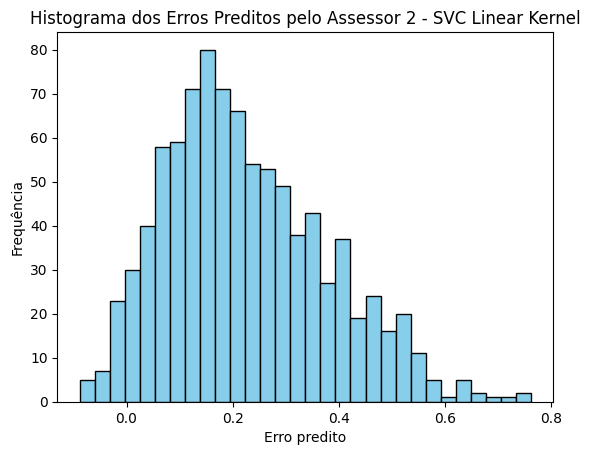

In [323]:
# Histograma dos erros preditos pelo Assessor 2 do SVC Linear Kernel
plt.hist(pred_ass2_lin_svc, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro predito')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Preditos pelo Assessor 2 - SVC Linear Kernel')
plt.show()

In [324]:
# Ajustando os dados (necessário para o StandardScaler, que não funciona sem o fit mesmo que o cross_val_predict já tenha sido utilizado)
ass2_lin_svc.fit(X_entr_lin_svc, y_erro_lin_svc)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

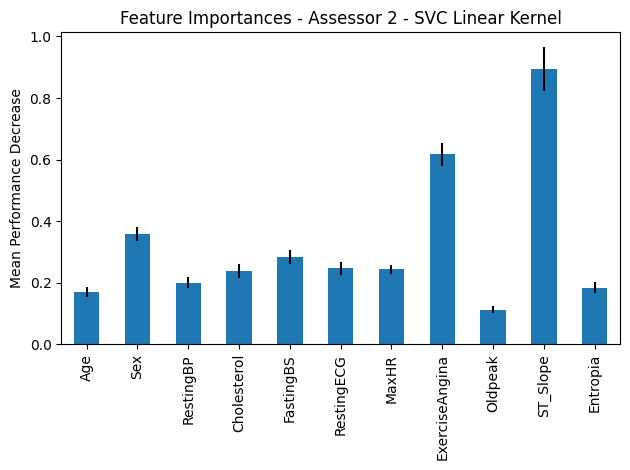

In [325]:
# Feature importances
result = permutation_importance(ass2_lin_svc, X_entr_lin_svc, pred_ass2_lin_svc, n_repeats=30, random_state=0)
forest_importances = pd.Series(result.importances_mean, index=X_entr_lin_svc.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature Importances - Assessor 2 - SVC Linear Kernel")
ax.set_ylabel("Mean Performance Decrease")

fig.tight_layout()
plt.show()

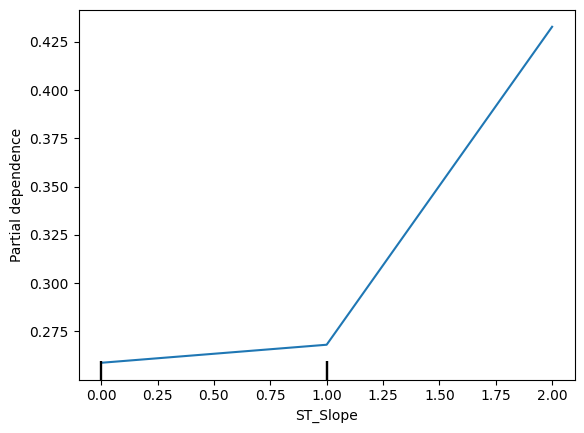

In [326]:
# PDP para o ST_Slope
disp = PartialDependenceDisplay.from_estimator(ass2_lin_svc, X_entr_lin_svc, [(9)], grid_resolution=50)

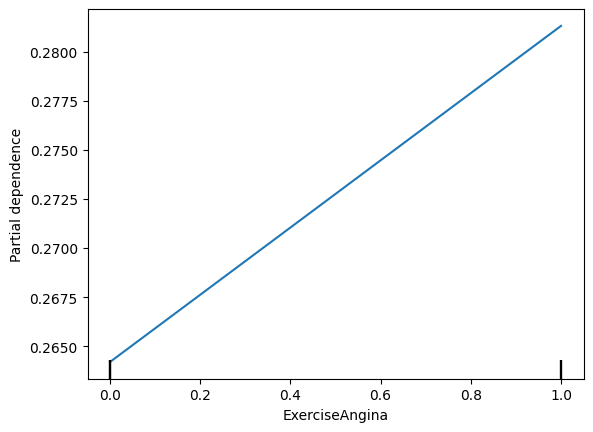

In [327]:
# PDP para a ExerciseAngina
disp = PartialDependenceDisplay.from_estimator(ass2_lin_svc, X_entr_lin_svc, [(7)], grid_resolution=50)

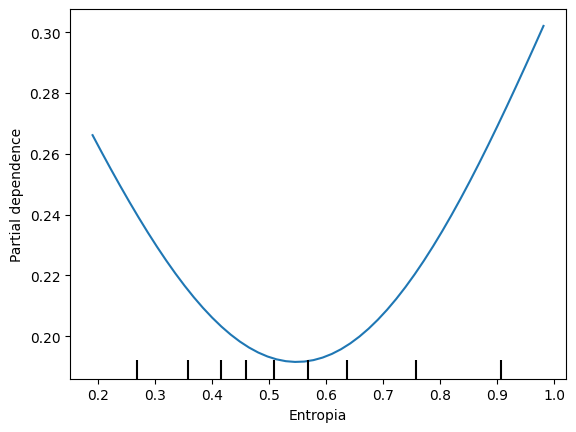

In [328]:
# PDP para a Entropia
disp = PartialDependenceDisplay.from_estimator(ass2_lin_svc, X_entr_lin_svc, [(10)], grid_resolution=50)

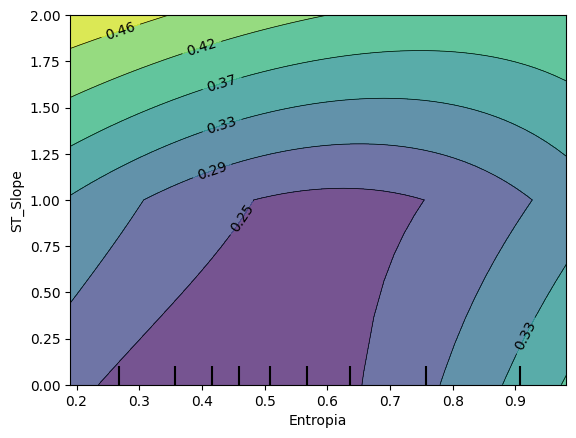

In [329]:
# PDP bi-dimensional para verificar as dependências entre as features Entropia e ST_Slope
disp = PartialDependenceDisplay.from_estimator(ass2_lin_svc, X_entr_lin_svc, [(10, 9)], grid_resolution=50)

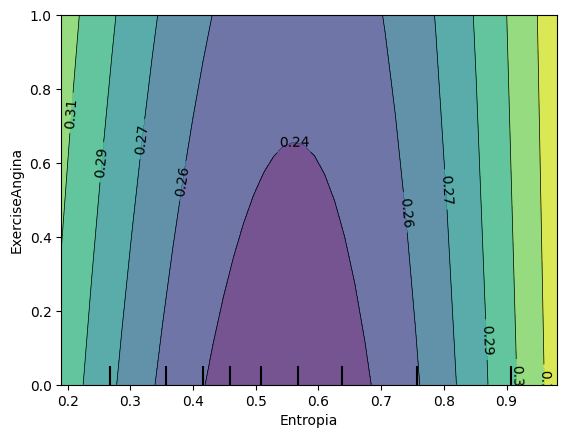

In [330]:
# PDP bi-dimensional para verificar as dependências entre as features Entropia e ExerciseAngina
disp = PartialDependenceDisplay.from_estimator(ass2_lin_svc, X_entr_lin_svc, [(10, 7)], grid_resolution=50)

#### Assessor 3

In [331]:
# Assessor 3: Treinado apenas com a entropia | Atributo preditor: Erro do modelo

ass3_lin_svc = make_pipeline(StandardScaler(), SVR())
pred_ass3_lin_svc = cross_val_predict(ass3_lin_svc, X_apenas_entr_lin_svc, y_erro_lin_svc, cv = 10)

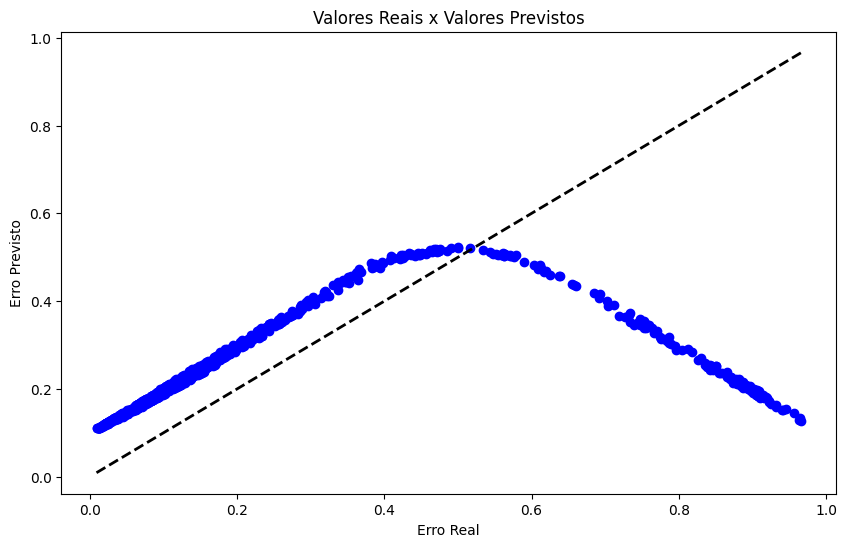

In [332]:
plt.figure(figsize=(10, 6))
plt.scatter(y_erro_lin_svc, pred_ass3_lin_svc, color='blue')
plt.plot([y_erro_lin_svc.min(), y_erro_lin_svc.max()], [y_erro_lin_svc.min(), y_erro_lin_svc.max()], 'k--', lw=2)
plt.xlabel('Erro Real')
plt.ylabel('Erro Previsto')
plt.title('Valores Reais x Valores Previstos')
plt.show()

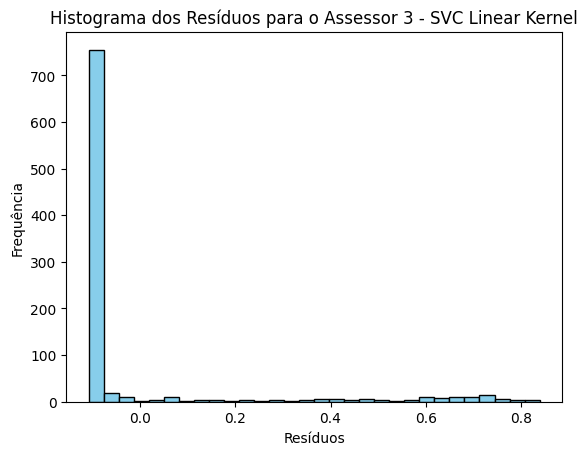

In [333]:
residuals = y_erro_lin_svc - pred_ass3_lin_svc
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos para o Assessor 3 - SVC Linear Kernel')
plt.show()

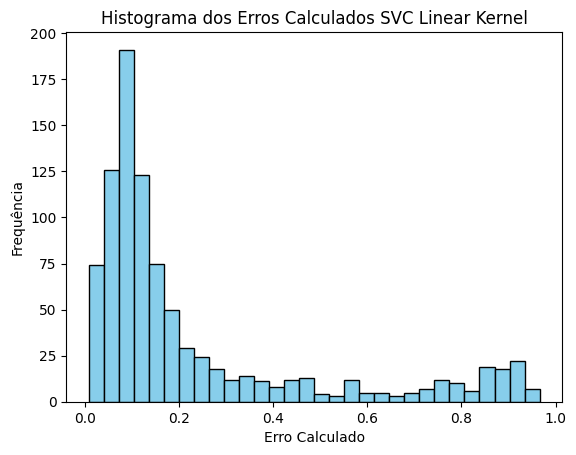

In [334]:
# Histograma dos erros reais do SVC Linear Kernel
plt.hist(y_erro_lin_svc, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro Calculado')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Calculados SVC Linear Kernel')
plt.show()

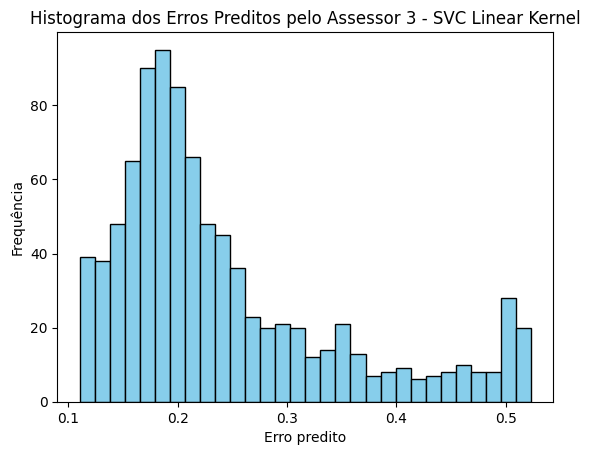

In [335]:
# Histograma dos erros preditos pelo Assessor 3 do SVC Linear Kernel
plt.hist(pred_ass3_lin_svc, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro predito')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Preditos pelo Assessor 3 - SVC Linear Kernel')
plt.show()

In [336]:
# Ajustando os dados (necessário para o StandardScaler, que não funciona sem o fit mesmo que o cross_val_predict já tenha sido utilizado)
ass3_lin_svc.fit(X_apenas_entr_lin_svc, y_erro_lin_svc)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

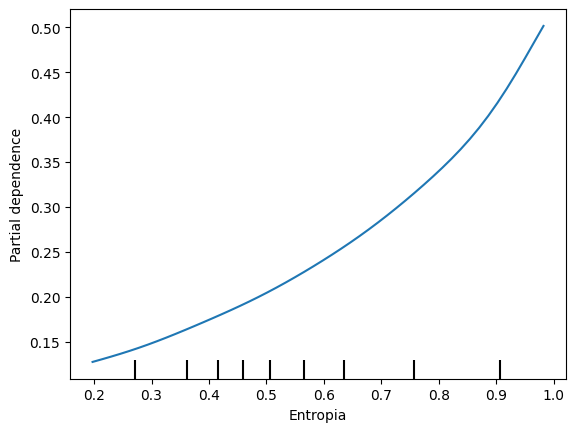

In [337]:
# PDP para a Entropia
disp = PartialDependenceDisplay.from_estimator(ass3_lin_svc, X_apenas_entr_lin_svc, [(0)], grid_resolution=50)

### Performances dos modelos

In [338]:
# Support Vector Classifier - Linear Kernel
report_lin_svc = classification_report(y, pred_lin_svc)
print(report_lin_svc)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       410
           1       0.86      0.87      0.87       508

    accuracy                           0.85       918
   macro avg       0.85      0.85      0.85       918
weighted avg       0.85      0.85      0.85       918



In [339]:
# Assessores
mae_ass1_lin_svc = mean_absolute_error(y_erro_lin_svc, pred_ass1_lin_svc)
print(f'Assessor 1 (dados sem entropia): {mae_ass1_lin_svc}')

mae_ass2_lin_svc = mean_absolute_error(y_erro_lin_svc, pred_ass2_lin_svc)
print(f'Assessor 2 (dados com entropia): {mae_ass2_lin_svc}')

mae_ass3_lin_svc = mean_absolute_error(y_erro_lin_svc, pred_ass3_lin_svc)
print(f'Assessor 3 (somente entropia): {mae_ass3_lin_svc}')

Assessor 1 (dados sem entropia): 0.1397949071490478
Assessor 2 (dados com entropia): 0.1364322476013002
Assessor 3 (somente entropia): 0.1516087487429266


# Erro e entropia médios do pool



In [340]:
# Calculando o erro e a entropia médios para o pool de modelos
erro = (erro_knn + erro_dt + erro_rf + erro_nb + erro_lr + erro_svm + erro_mlp + erro_xgb + erro_cat + erro_lin_svc)/10
entropia = (entr_knn + entr_dt + entr_rf + entr_nb + entr_lr + entr_svm + entr_mlp + entr_xgb + entr_cat + entr_lin_svc)/10

# Calculahndo o erro médio predito pelos assessores 1, 2 e 3 no pool de modelos
pred_erro_ass1 = (pred_ass1_knn + pred_ass1_dt + pred_ass1_rf + pred_ass1_nb + pred_ass1_lr + pred_ass1_svm + pred_ass1_mlp + pred_ass1_xgb + pred_ass1_cat + pred_ass1_lin_svc)/10
pred_erro_ass2 = (pred_ass2_knn + pred_ass2_dt + pred_ass2_rf + pred_ass2_nb + pred_ass2_lr + pred_ass2_svm + pred_ass2_mlp + pred_ass2_xgb + pred_ass2_cat + pred_ass2_lin_svc)/10
pred_erro_ass3 = (pred_ass3_knn + pred_ass3_dt + pred_ass3_rf + pred_ass3_nb + pred_ass3_lr + pred_ass3_svm + pred_ass3_mlp + pred_ass3_xgb + pred_ass3_cat + pred_ass3_lin_svc)/10

# Formatando as variáveis "erro" e "entropia"
erro = np.array(erro)
entropia = entropia.flatten()

print(f'Erro: {erro[:5]}...\n')
print(f'Entropia: {entropia[:5]}...\n')
print(f'Erros preditos pelo assessor 1: {pred_erro_ass1[:5]}...\n')
print(f'Erros preditos pelo assessor 2: {pred_erro_ass2[:5]}...\n')
print(f'Erros preditos pelo assessor 3: {pred_erro_ass3[:5]}...\n')

Erro: [0.07908136 0.829951   0.21733333 0.33740788 0.10587823]...

Entropia: [0.31162285 0.56720448 0.40676123 0.87393919 0.39906616]...

Erros preditos pelo assessor 1: [0.07484572 0.31723035 0.22184486 0.3780113  0.14915405]...

Erros preditos pelo assessor 2: [0.10597121 0.30496716 0.20783114 0.40360364 0.15183254]...

Erros preditos pelo assessor 3: [0.17538394 0.29537664 0.20491764 0.34617878 0.19117708]...



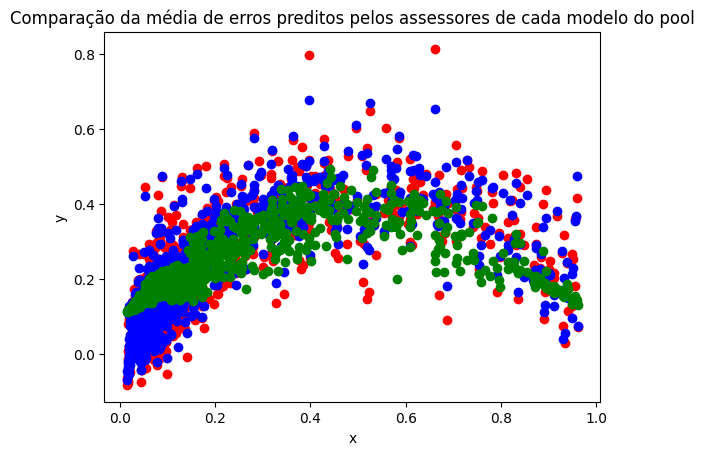

In [341]:
plt.scatter(erro, pred_erro_ass1, color='red', label='Assessor 1')
plt.scatter(erro, pred_erro_ass2, color='blue', label='Assessor 2')
plt.scatter(erro, pred_erro_ass3, color='green', label='Assessor 3')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparação da média de erros preditos pelos assessores de cada modelo do pool')

plt.show()

# Assessores

In [342]:
# Dataset com coluna para a entropia média do pool
X_entropia = X.copy()
X_entropia['Entropia'] = entropia

# Atributo preditor: Coluna para o erro médio do pool
y_erro = erro

# Dataset somente com entropia para o terceiro assessor
X_apenas_entr = X_entropia.copy()
X_apenas_entr = X_apenas_entr.drop(columns = ["Age", "Sex", "RestingBP", "Cholesterol", "FastingBS", "RestingECG", "MaxHR", "ExerciseAngina", "Oldpeak", "ST_Slope"])

In [343]:
full_X.head()

Age  Sex  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  \
0   40    0        140          289          0           0    172   
1   49    1        160          180          0           0    156   
2   37    0        130          283          0           1     98   
3   48    1        138          214          0           0    108   
4   54    0        150          195          0           0    122   

   ExerciseAngina  Oldpeak  ST_Slope  
0               0      0.0         0  
1               0      1.0         1  
2               0      0.0         0  
3               1      1.5         1  
4               0      0.0         0

In [344]:
X_entropia.head()

Age  Sex  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  \
0   40    0        140          289          0           0    172   
1   49    1        160          180          0           0    156   
2   37    0        130          283          0           1     98   
3   48    1        138          214          0           0    108   
4   54    0        150          195          0           0    122   

   ExerciseAngina  Oldpeak  ST_Slope  Entropia  
0               0      0.0         0  0.311623  
1               0      1.0         1  0.567204  
2               0      0.0         0  0.406761  
3               1      1.5         1  0.873939  
4               0      0.0         0  0.399066

In [345]:
X_apenas_entr.head()

Entropia
0  0.311623
1  0.567204
2  0.406761
3  0.873939
4  0.399066

## Assessor 1
Treinado com o dataset e tratando o erro médio do pool como atributo preditor

In [346]:
# Assessor 1: Treinado com dados | Atributo preditor: Erro médio do pool

ass1 = make_pipeline(StandardScaler(), SVR())
pred_ass1 = cross_val_predict(ass1, full_X, y_erro, cv = 10)

### Avaliação de resultados

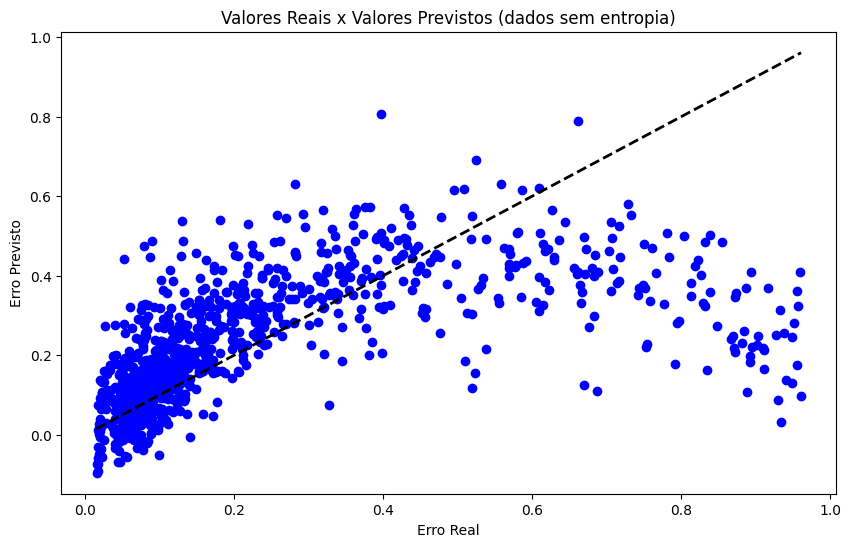

In [347]:
plt.figure(figsize=(10, 6))
plt.scatter(y_erro, pred_ass1, color='blue')
plt.plot([y_erro.min(), y_erro.max()], [y_erro.min(), y_erro.max()], 'k--', lw=2)
plt.xlabel('Erro Real')
plt.ylabel('Erro Previsto')
plt.title('Valores Reais x Valores Previstos (dados sem entropia)')
plt.show()

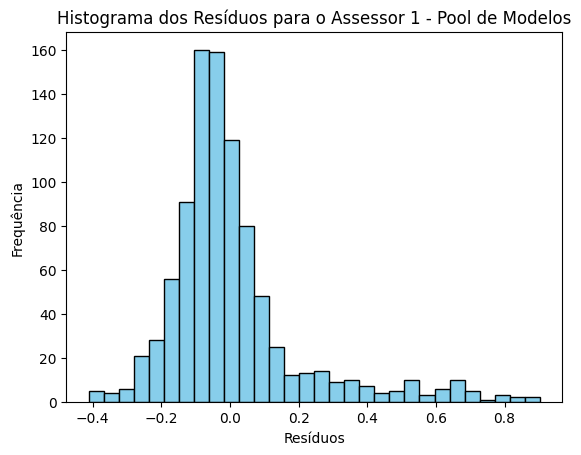

In [348]:
residuals = y_erro - pred_ass1
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos para o Assessor 1 - Pool de Modelos')
plt.show()

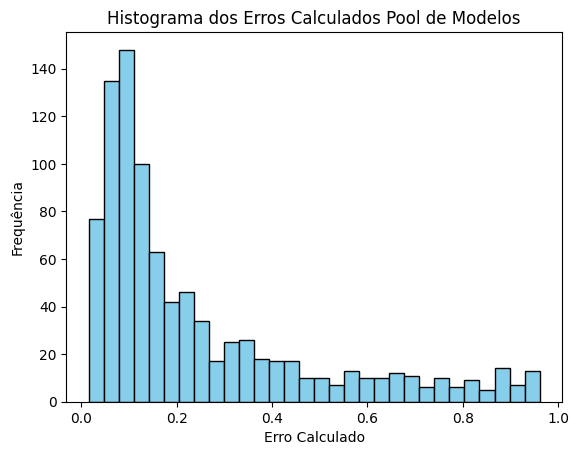

In [349]:
# Histograma dos erros reais do Pool de Modelos
plt.hist(y_erro, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro Calculado')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Calculados Pool de Modelos')
plt.show()

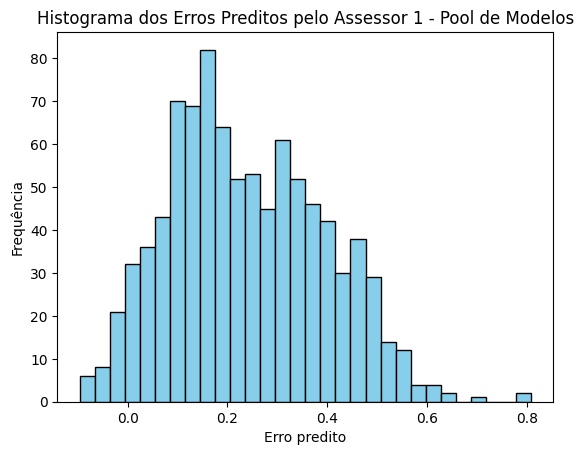

In [350]:
# Histograma dos erros preditos pelo Assessor 1 para o Pool de Modelos
plt.hist(pred_ass1, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro predito')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Preditos pelo Assessor 1 - Pool de Modelos')
plt.show()

In [351]:
ass1.fit(full_X, y_erro)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

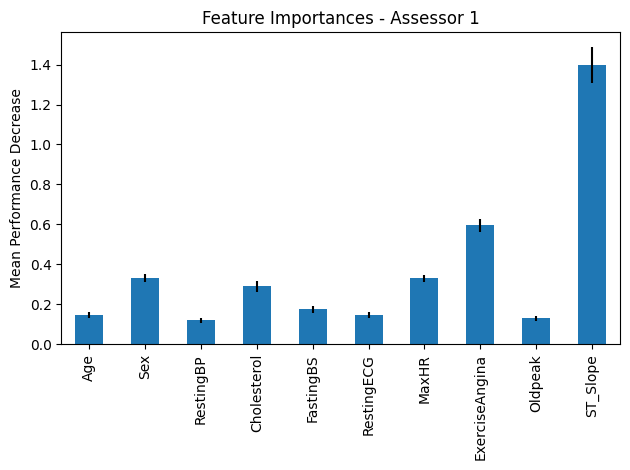

In [352]:
# Feature importances
result = permutation_importance(ass1, full_X, pred_ass1, n_repeats=30, random_state=0)
forest_importances = pd.Series(result.importances_mean, index=full_X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature Importances - Assessor 1")
ax.set_ylabel("Mean Performance Decrease")

fig.tight_layout()
plt.show()

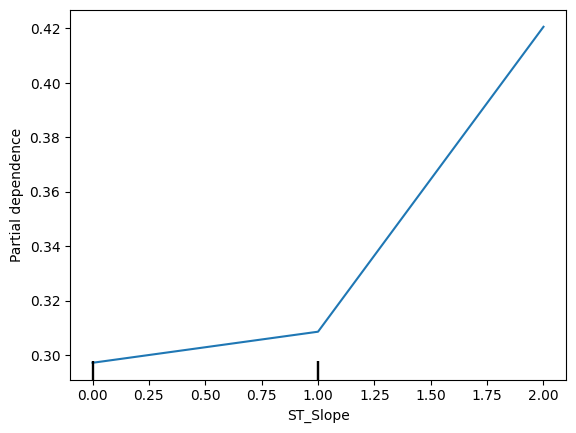

In [353]:
# PDP para o ST_Slope
disp = PartialDependenceDisplay.from_estimator(ass1, full_X, [(9)], grid_resolution=50)

## Assessor 2
Treinado com o dataset + entropia e tratando o erro médio do pool como atributo preditor

In [354]:
# Assessor 2: Treinado com dados + entropia | Atributo preditor: Erro médio do pool

ass2 = make_pipeline(StandardScaler(), SVR())
pred_ass2 = cross_val_predict(ass2, X_entropia, y_erro, cv = 10)

### Avaliação de resultados

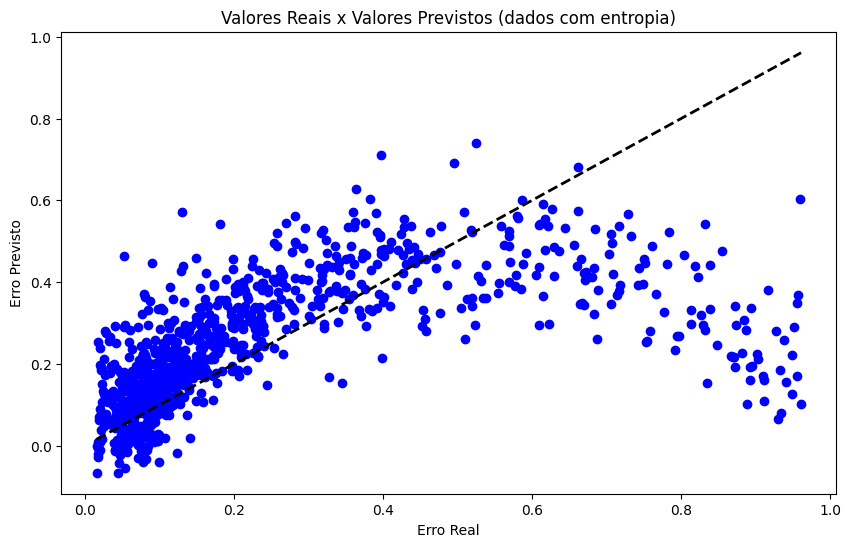

In [355]:
plt.figure(figsize=(10, 6))
plt.scatter(y_erro, pred_ass2, color='blue')
plt.plot([y_erro.min(), y_erro.max()], [y_erro.min(), y_erro.max()], 'k--', lw=2)
plt.xlabel('Erro Real')
plt.ylabel('Erro Previsto')
plt.title('Valores Reais x Valores Previstos (dados com entropia)')
plt.show()

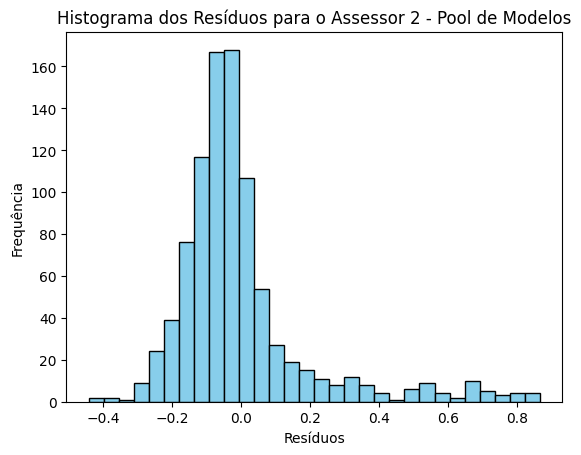

In [356]:
residuals = y_erro - pred_ass2
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos para o Assessor 2 - Pool de Modelos')
plt.show()

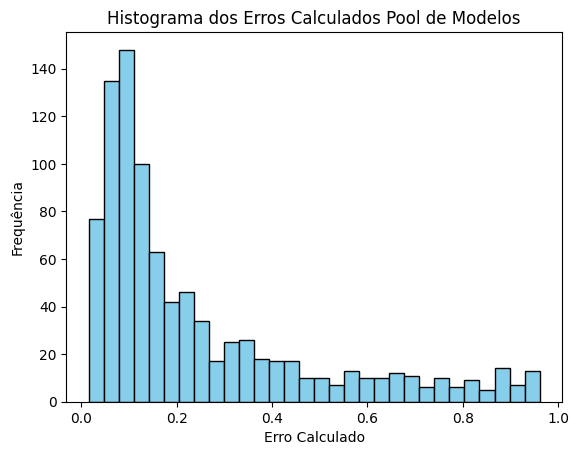

In [357]:
# Histograma dos erros reais do Pool de Modelos
plt.hist(y_erro, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro Calculado')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Calculados Pool de Modelos')
plt.show()

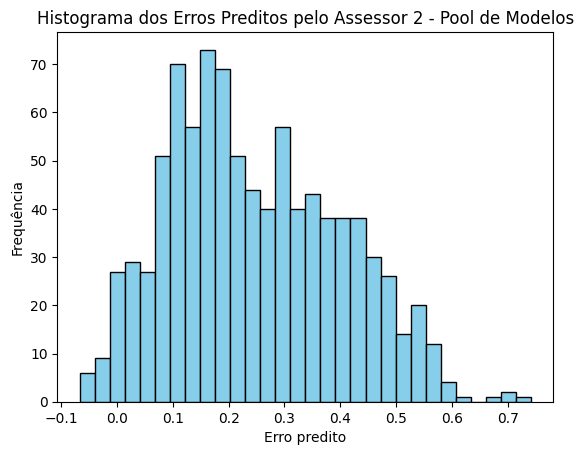

In [358]:
# Histograma dos erros preditos pelo Assessor 2 para o Pool de Modelos
plt.hist(pred_ass2, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro predito')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Preditos pelo Assessor 2 - Pool de Modelos')
plt.show()

In [359]:
ass2.fit(X_entropia, y_erro)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

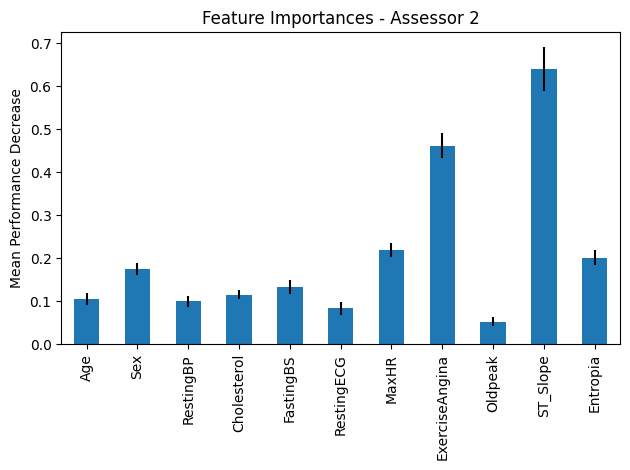

In [360]:
# Feature importances
result = permutation_importance(ass2, X_entropia, pred_ass2, n_repeats=30, random_state=0)
forest_importances = pd.Series(result.importances_mean, index=X_entropia.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature Importances - Assessor 2")
ax.set_ylabel("Mean Performance Decrease")

fig.tight_layout()
plt.show()

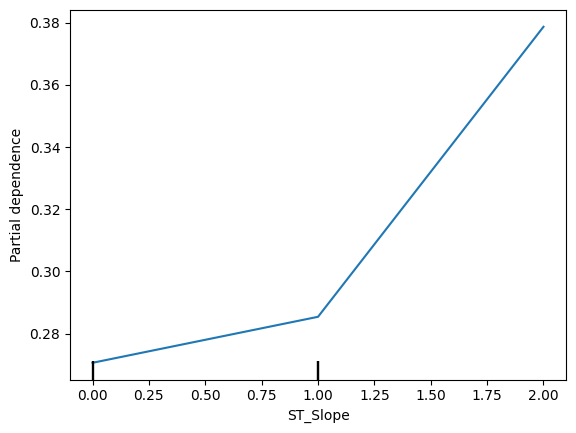

In [361]:
# PDP para o ST_Slope
disp = PartialDependenceDisplay.from_estimator(ass2, X_entropia, [(9)], grid_resolution=50)

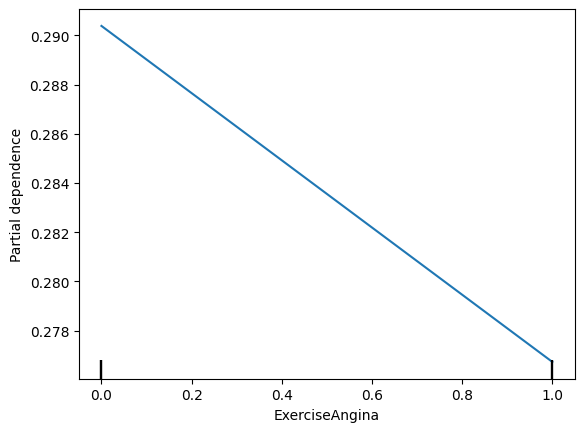

In [362]:
# PDP para a ExerciseAngina
disp = PartialDependenceDisplay.from_estimator(ass2, X_entropia, [(7)], grid_resolution=50)

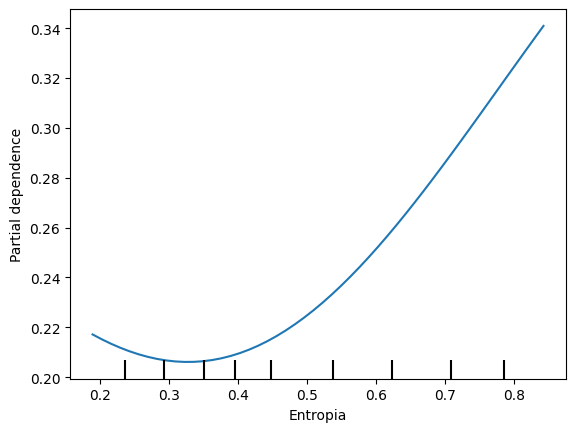

In [363]:
# PDP para a Entropia
disp = PartialDependenceDisplay.from_estimator(ass2, X_entropia, [(10)], grid_resolution=50)

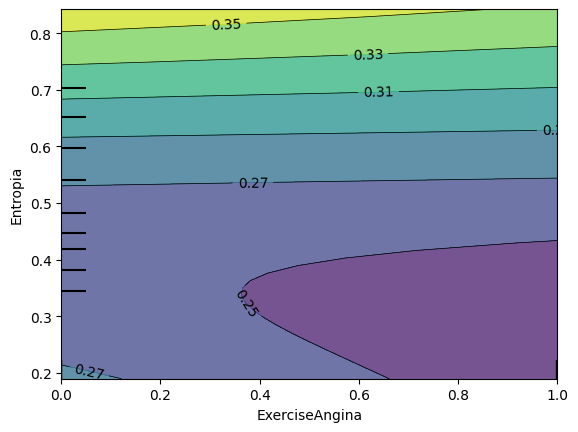

In [364]:
# PDP bi-dimensional para verificar as dependências entre as features Entropia e ExerciseAngina
disp = PartialDependenceDisplay.from_estimator(ass2, X_entropia, [(7, 10)], grid_resolution=50)

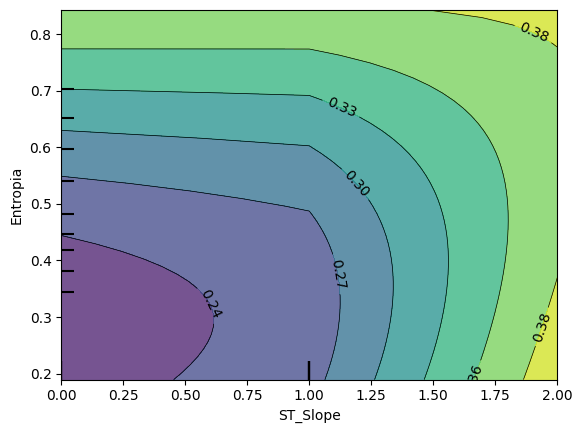

In [365]:
# PDP bi-dimensional para verificar as dependências entre as features Entropia e ST_Slope
disp = PartialDependenceDisplay.from_estimator(ass2, X_entropia, [(9, 10)], grid_resolution=50)

## Assessor 3

In [366]:
# Assessor 3: Treinado apenas com a entropia | Atributo preditor: Erro do modelo

ass3 = make_pipeline(StandardScaler(), SVR())
pred_ass3 = cross_val_predict(ass3, X_apenas_entr, y_erro, cv = 10)

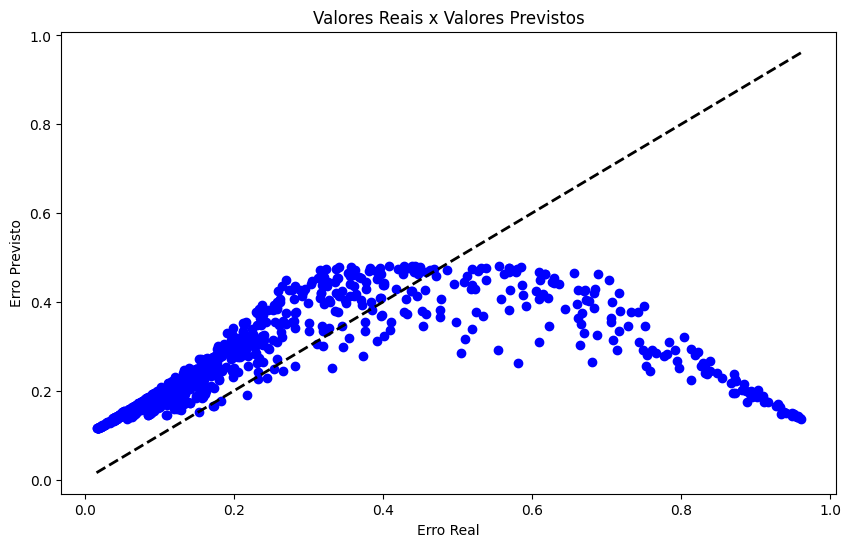

In [367]:
plt.figure(figsize=(10, 6))
plt.scatter(y_erro, pred_ass3, color='blue')
plt.plot([y_erro.min(), y_erro.max()], [y_erro.min(), y_erro.max()], 'k--', lw=2)
plt.xlabel('Erro Real')
plt.ylabel('Erro Previsto')
plt.title('Valores Reais x Valores Previstos')
plt.show()

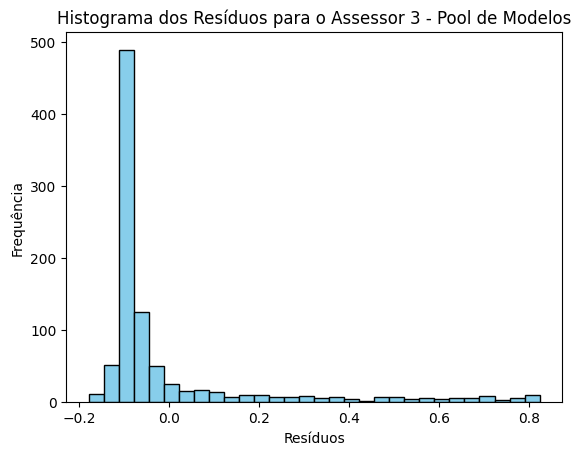

In [368]:
residuals = y_erro - pred_ass3
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos para o Assessor 3 - Pool de Modelos')
plt.show()

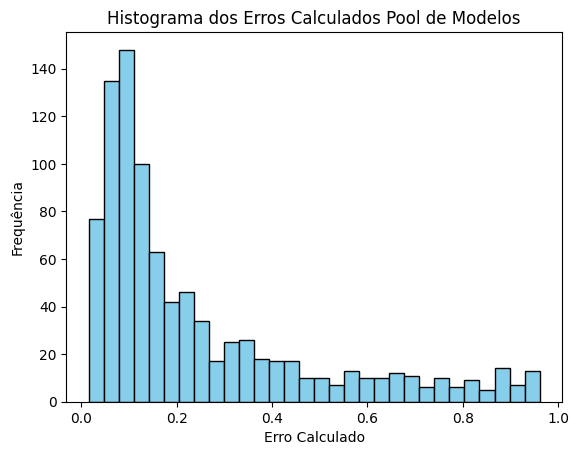

In [369]:
# Histograma dos erros reais do Pool de Modelos
plt.hist(y_erro, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro Calculado')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Calculados Pool de Modelos')
plt.show()

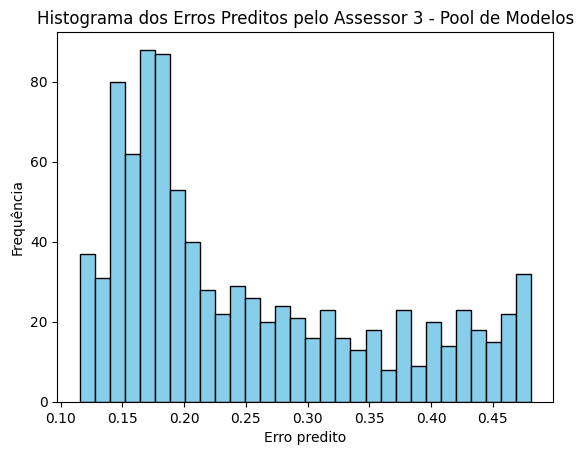

In [370]:
# Histograma dos erros preditos pelo Assessor 3 do Pool de Modelos
plt.hist(pred_ass3, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Erro predito')
plt.ylabel('Frequência')
plt.title('Histograma dos Erros Preditos pelo Assessor 3 - Pool de Modelos')
plt.show()

In [371]:
# Ajustando os dados (necessário para o StandardScaler, que não funciona sem o fit mesmo que o cross_val_predict já tenha sido utilizado)
ass3.fit(X_apenas_entr, y_erro)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

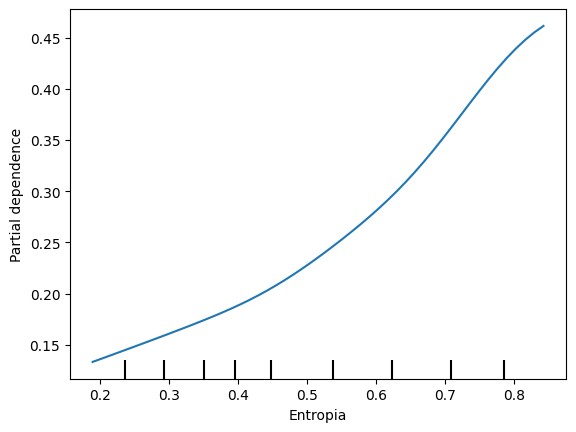

In [372]:
# PDP para a Entropia
disp = PartialDependenceDisplay.from_estimator(ass3, X_apenas_entr, [(0)], grid_resolution=50)

## Performances dos Assessores

In [373]:
# Assessores
mae_ass1 = mean_absolute_error(y_erro, pred_ass1)
print(f'Assessor 1 (dados sem entropia): {mae_ass1}')

mae_ass2 = mean_absolute_error(y_erro, pred_ass2)
print(f'Assessor 2 (dados com entropia): {mae_ass2}')

mae_ass3 = mean_absolute_error(y_erro, pred_ass3)
print(f'Assessor 3 (somente entropia): {mae_ass3}')

Assessor 1 (dados sem entropia): 0.12929713882436428
Assessor 2 (dados com entropia): 0.12703147108653812
Assessor 3 (somente entropia): 0.13343753977037662
